### Análisis Exploratorio de Datos (EDA)
## Dataset: Suicidalidad en Jóvenes  
**Autor:** Reiner Fuentes Ferrada  
**Fecha:** Octubre 2025  

---

> Este notebook presenta un análisis exploratorio sistemático del dataset `suicidalidad_jovenes_simulado.csv`, que contiene **1,029 observaciones** y **42 variables** relacionadas con indicadores de riesgo suicida, bienestar psicológico y factores psicosociales en población joven.

---

### Hipótesis

1. La **inflexibilidad psicológica** estará más relacionada con **ideación suicida**.  
2. El **bienestar psicológico** estará relacionado con **menor ideación suicida**.  
3. Los **síntomas de ansiedad y depresión** se asociarán con **mayor nivel de ideación suicida**.
4. La **inflexibilidad psicológica** y **bienestar psicológico** tendran un rol en el riesgo suicida en diferentes niveles de severidad.

# FASE 1: PREPARACIÓN DEL ENTORNO

En esta primera fase, llevo a cabo la **configuración del entorno de trabajo** para garantizar la reproducibilidad y coherencia visual de los análisis posteriores.  
El objetivo es disponer de un ecosistema de ejecución ordenado, con una estructura de carpetas establecida y una configuración visual estandarizada para todas las figuras.

Esta fase incluye los siguientes pasos:

1. **Importación y configuración de librerías:** incorporo los principales paquetes de análisis y visualización de datos (pandas, numpy, seaborn, matplotlib, scipy).  
   Además, ajusto parámetros globales para un estilo visual oscuro con paleta personalizada inspirada en **TailwindCSS**, lo que facilita la lectura en entornos de trabajo prolongados.  

2. **Creación de la estructura de carpetas:** se generan directorios para organizar los datos (`/data`), figuras (`/figuras`) y scripts auxiliares (`/src` y `/src/utils`), asegurando una arquitectura modular del proyecto.  

3. **Carga y verificación del dataset:** implemento un procedimiento robusto de carga que busca el archivo en diferentes rutas posibles, verifica su codificación y muestra un resumen informativo del tamaño, tipos de variables y memoria utilizada.  

4. **Construcción del diccionario de variables:** elaboro un diccionario exhaustivo que clasifica las variables según su **tipo**, **categoría conceptual** (por ejemplo, sociodemográficas, clínicas, de riesgo suicida, etc.) y su **rol hipotético** dentro del modelo teórico.  
   Este diccionario se guarda automáticamente en formato `.csv` para futuras referencias y análisis.

En síntesis, esta fase sienta las bases técnicas y conceptuales del proyecto, garantizando que las siguientes etapas del análisis —exploración estructural, evaluación de calidad de datos y modelado— se desarrollen sobre un entorno controlado, transparente y replicable.

In [ ]:
print("="*80)
print("FASE 1: PREPARACIÓN DEL ENTORNO")
print("="*80)

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from pathlib import Path
import os

warnings.filterwarnings('ignore')

# Configuración de estilo visual
plt.style.use('dark_background')
sns.set_palette("husl")

# Paleta de colores personalizada (Tailwind)
COLORES = ["#c5ebc3", "#b7c8b5", "#a790a5", "#875c74", "#54414e", "#2f4858"]

# Configuración de matplotlib para fondo negro
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("\n✓ Librerías importadas correctamente")
print(f"✓ Paleta de colores personalizada configurada: {len(COLORES)} colores")
print("✓ Estilo visual: Fondo negro activado")

# =============================================================================
# CREAR ESTRUCTURA DE CARPETAS
# =============================================================================

print("\n" + "-"*80)
print("Creando estructura de carpetas...")
print("-"*80)

carpetas = ['data', 'figuras', 'src', 'src/utils']

for carpeta in carpetas:
    Path(carpeta).mkdir(parents=True, exist_ok=True)
    print(f"✓ Carpeta '{carpeta}' creada/verificada")

# =============================================================================
# CARGA DEL DATASET
# =============================================================================

print("\n" + "-"*80)
print("Cargando dataset...")
print("-"*80)

# Rutas posibles del archivo
rutas_posibles = [
    'suicidalidad_jovenes_simulado.csv',
    'data/_simulado.csv',
    '../_simulado.csv'
]

df = None
ruta_usada = None

for ruta in rutas_posibles:
    if os.path.exists(ruta):
        try:
            df = pd.read_csv(ruta, encoding='utf-8')
            ruta_usada = ruta
            print(f"✓ Dataset cargado exitosamente desde: {ruta}")
            break
        except Exception as e:
            print(f"✗ Error al cargar desde {ruta}: {str(e)}")
            continue

if df is None:
    raise FileNotFoundError(
        "No se pudo encontrar el archivo _simulado.csv en ninguna ubicación"
    )

# Verificación de carga
print(f"\n📊 INFORMACIÓN DEL DATASET:")
print(f"  - Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"  - Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  - Encoding: UTF-8")
print(f"  - Ruta: {ruta_usada}")

# Vista previa
print(f"\n👀 PRIMERAS 3 FILAS:")
print(df.head(3))

print(f"\n📋 TIPOS DE DATOS:")
tipos = df.dtypes.value_counts()
for tipo, cantidad in tipos.items():
    print(f"  - {tipo}: {cantidad} variables")

# =============================================================================
# DICCIONARIO DE VARIABLES
# =============================================================================

print("\n" + "="*80)
print("DICCIONARIO DE VARIABLES")
print("="*80)

# Diccionario completo de variables
variables_dict = {
    # IDENTIFICACIÓN
    'responseid': {
        'tipo': 'Identificador',
        'descripcion': 'ID único del participante',
        'categoria': 'Identificación'
    },
    
    # VARIABLES SOCIODEMOGRÁFICAS
    'edad': {
        'tipo': 'Numérica continua',
        'descripcion': 'Edad del participante en años',
        'categoria': 'Sociodemográfica'
    },
    'sexo_asignado_al_nacer': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Sexo asignado al nacer (1=Masculino, 2=Femenino)',
        'categoria': 'Sociodemográfica'
    },
    'identidad_de_genero': {
        'tipo': 'Categórica',
        'descripcion': 'Identidad de género autopercibida',
        'categoria': 'Sociodemográfica'
    },
    'orientacion_sexual': {
        'tipo': 'Categórica',
        'descripcion': 'Orientación sexual del participante',
        'categoria': 'Sociodemográfica'
    },
    'genero_de_pareja': {
        'tipo': 'Categórica',
        'descripcion': 'Género de la pareja actual (si aplica)',
        'categoria': 'Sociodemográfica'
    },
    'estado_civil': {
        'tipo': 'Categórica',
        'descripcion': 'Estado civil del participante',
        'categoria': 'Sociodemográfica'
    },
    'estado_de_relacion': {
        'tipo': 'Categórica',
        'descripcion': 'Estado actual de relación sentimental',
        'categoria': 'Sociodemográfica'
    },
    'educacion_de_los_padres': {
        'tipo': 'Categórica ordinal',
        'descripcion': 'Nivel educativo de los padres',
        'categoria': 'Sociodemográfica'
    },
    
    # VARIABLES DE RIESGO SUICIDA
    'ideacion_suicida_pasiva_dicotomica': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Presencia de ideación suicida pasiva (0=No, 1=Sí)',
        'categoria': 'Riesgo Suicida',
        'hipotesis': 'Variable dependiente principal'
    },
    'ideacion_suicida_activa_dicotomica': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Presencia de ideación suicida activa (0=No, 1=Sí)',
        'categoria': 'Riesgo Suicida',
        'hipotesis': 'Variable dependiente principal'
    },
    'ideacion_ultimo_mes_dicotomica': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Ideación suicida en el último mes (0=No, 1=Sí)',
        'categoria': 'Riesgo Suicida'
    },
    'severidad_ideacion_ultimo_mes': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Severidad de la ideación suicida en el último mes (escala)',
        'categoria': 'Riesgo Suicida'
    },
    'positivo_en_ideacion': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Screening positivo para ideación suicida',
        'categoria': 'Riesgo Suicida'
    },
    'autolesion_no_suicida_dicotomica': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Presencia de conductas autolesivas sin intención suicida',
        'categoria': 'Riesgo Suicida'
    },
    
    # VARIABLES CLÍNICAS - DEPRESIÓN
    'episodio_depresivo_dicotomico': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Presencia de episodio depresivo actual (0=No, 1=Sí)',
        'categoria': 'Sintomatología Depresiva',
        'hipotesis': 'H3: Asociada con mayor ideación suicida'
    },
    'severidad_depresion_ultimo_mes': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Severidad de síntomas depresivos en el último mes',
        'categoria': 'Sintomatología Depresiva',
        'hipotesis': 'H3: Asociada con mayor ideación suicida'
    },
    'años_de_episodios_depresivos': {
        'tipo': 'Numérica continua',
        'descripcion': 'Duración en años de episodios depresivos',
        'categoria': 'Sintomatología Depresiva'
    },
    'meses_de_sintomas_depresivos_ultimo_año': {
        'tipo': 'Numérica continua',
        'descripcion': 'Meses con síntomas depresivos en el último año',
        'categoria': 'Sintomatología Depresiva'
    },
    
    # VARIABLES CLÍNICAS - ANSIEDAD
    'ansiedad_generalizada_dicotomico': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Diagnóstico de ansiedad generalizada (0=No, 1=Sí)',
        'categoria': 'Sintomatología Ansiosa',
        'hipotesis': 'H3: Asociada con mayor ideación suicida'
    },
    'severidad_ansiedad_ultimo_mes': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Severidad de síntomas ansiosos en el último mes',
        'categoria': 'Sintomatología Ansiosa',
        'hipotesis': 'H3: Asociada con mayor ideación suicida'
    },
    'años_de_ansiedad_generalizada': {
        'tipo': 'Numérica continua',
        'descripcion': 'Duración en años de ansiedad generalizada',
        'categoria': 'Sintomatología Ansiosa'
    },
    'meses_de_ansiedad_generalizada_ultimo_año': {
        'tipo': 'Numérica continua',
        'descripcion': 'Meses con ansiedad generalizada en el último año',
        'categoria': 'Sintomatología Ansiosa'
    },
    'crisis_de_panico_totales': {
        'tipo': 'Numérica discreta',
        'descripcion': 'Número total de crisis de pánico experimentadas',
        'categoria': 'Sintomatología Ansiosa'
    },
    
    # VARIABLES CLÍNICAS - TRAUMA
    'ptsd_screener': {
        'tipo': 'Categórica binaria',
        'descripcion': 'Screening positivo para TEPT (0=No, 1=Sí)',
        'categoria': 'Trauma'
    },
    
    # BIENESTAR PSICOLÓGICO (SWB - Subjective Wellbeing Scale)
    'swb_7items_1': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 1 de Escala de Bienestar Subjetivo',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: Relacionado con menor ideación suicida'
    },
    'swb_7items_2': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 2 de Escala de Bienestar Subjetivo',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: Relacionado con menor ideación suicida'
    },
    'swb_7items_3': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 3 de Escala de Bienestar Subjetivo',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: Relacionado con menor ideación suicida'
    },
    'swb_7items_4': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 4 de Escala de Bienestar Subjetivo',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: Relacionado con menor ideación suicida'
    },
    'swb_7items_5': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 5 de Escala de Bienestar Subjetivo',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: Relacionado con menor ideación suicida'
    },
    'swb_7items_6': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 6 de Escala de Bienestar Subjetivo',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: Relacionado con menor ideación suicida'
    },
    'swb_7items_7': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 7 de Escala de Bienestar Subjetivo',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: Relacionado con menor ideación suicida'
    },
    'bienestar_psicologico': {
        'tipo': 'Numérica continua',
        'descripcion': 'Puntaje total de Bienestar Psicológico (agregado SWB)',
        'categoria': 'Bienestar Psicológico',
        'hipotesis': 'H2: VARIABLE CLAVE - Relacionado con menor ideación suicida'
    },
    
    # INFLEXIBILIDAD PSICOLÓGICA (AAQ-II - Acceptance and Action Questionnaire)
    'aaq_ii_1': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 1 de AAQ-II (Inflexibilidad Psicológica)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: Relacionado con mayor ideación suicida'
    },
    'aaq_ii_2': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 2 de AAQ-II (Inflexibilidad Psicológica)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: Relacionado con mayor ideación suicida'
    },
    'aaq_ii_3': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 3 de AAQ-II (Inflexibilidad Psicológica)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: Relacionado con mayor ideación suicida'
    },
    'aaq_ii_4': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 4 de AAQ-II (Inflexibilidad Psicológica)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: Relacionado con mayor ideación suicida'
    },
    'aaq_ii_5': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 5 de AAQ-II (Inflexibilidad Psicológica)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: Relacionado con mayor ideación suicida'
    },
    'aaq_ii_6': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 6 de AAQ-II (Inflexibilidad Psicológica)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: Relacionado con mayor ideación suicida'
    },
    'aaq_ii_7': {
        'tipo': 'Numérica ordinal',
        'descripcion': 'Ítem 7 de AAQ-II (Inflexibilidad Psicológica)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: Relacionado con mayor ideación suicida'
    },
    'inflexibilidad_psicologica': {
        'tipo': 'Numérica continua',
        'descripcion': 'Puntaje total de Inflexibilidad Psicológica (agregado AAQ-II)',
        'categoria': 'Inflexibilidad Psicológica',
        'hipotesis': 'H1: VARIABLE CLAVE - Relacionada con mayor ideación suicida'
    },
    
    # VARIABLE DE PERFIL
    'perfil_latente': {
        'tipo': 'Categórica',
        'descripcion': 'Perfil latente de riesgo (resultado de análisis previo)',
        'categoria': 'Clasificación'
    }
}

# Crear DataFrame con el diccionario
df_variables = pd.DataFrame.from_dict(variables_dict, orient='index')
df_variables.index.name = 'variable'
df_variables = df_variables.reset_index()

# Mostrar resumen por categorías
print("\n📚 VARIABLES POR CATEGORÍA:")
print("-"*80)
for categoria in df_variables['categoria'].unique():
    vars_categoria = df_variables[df_variables['categoria'] == categoria]
    print(f"\n{categoria}: {len(vars_categoria)} variables")
    for _, row in vars_categoria.iterrows():
        hipotesis_mark = " ⭐" if pd.notna(row.get('hipotesis')) else ""
        print(f"  • {row['variable']}{hipotesis_mark}")
        print(f"    {row['descripcion']}")

# Guardar diccionario
df_variables.to_csv('figuras/diccionario_variables.csv', index=False, encoding='utf-8')
print(f"\n✓ Diccionario de variables guardado en: figuras/diccionario_variables.csv")

print("\n" + "="*80)
print("✓ FASE 1 COMPLETADA")
print("="*80)

FASE 1: PREPARACIÓN DEL ENTORNO

✓ Librerías importadas correctamente
✓ Paleta de colores personalizada configurada: 6 colores
✓ Estilo visual: Fondo negro activado

--------------------------------------------------------------------------------
Creando estructura de carpetas...
--------------------------------------------------------------------------------
✓ Carpeta 'data' creada/verificada
✓ Carpeta 'figuras' creada/verificada
✓ Carpeta 'src' creada/verificada
✓ Carpeta 'src/utils' creada/verificada

--------------------------------------------------------------------------------
Cargando dataset...
--------------------------------------------------------------------------------
✓ Dataset cargado exitosamente desde: suicidalidad_jovenes.csv

📊 INFORMACIÓN DEL DATASET:
  - Dimensiones: 1,029 filas × 42 columnas
  - Memoria utilizada: 0.39 MB
  - Encoding: UTF-8
  - Ruta: suicidalidad_jovenes.csv

👀 PRIMERAS 3 FILAS:
          responseid  edad  sexo_asignado_al_nacer  identidad_de_ge

# FASE 2: INSPECCIÓN INICIAL DE LA ESTRUCTURA

En esta segunda fase, realizo una inspección sistemática de la estructura del dataset con el propósito de comprender su composición general antes de avanzar hacia análisis más complejos. Este paso me permite identificar la dimensionalidad del conjunto de datos, el tipo y distribución de las variables, así como obtener una primera aproximación descriptiva de la información disponible.  

En concreto, examino los siguientes aspectos:

1. **Dimensionalidad del dataset:** número de observaciones, columnas y celdas totales.  
2. **Tipos de datos y su distribución:** clasificación según su naturaleza (numérica, categórica, etc.).  
3. **Categorización conceptual de las variables:** agrupadas en dominios sociodemográficos, clínicos, de riesgo suicida, de bienestar psicológico (SWB), inflexibilidad psicológica (AAQ-II) y variables compuestas derivadas.  
4. **Visualización de la composición estructural:** gráficos de barras y de torta que resumen la proporción de variables por categoría.  
5. **Exportación del resumen de clasificación:** generación de un archivo `.csv` con la categorización y número de variables por dominio.

Esta fase funciona como un **diagnóstico estructural preliminar** del dataset, ayudándome a verificar la coherencia interna de los datos y a organizar conceptualmente el sistema de variables que posteriormente será analizado en profundidad.


FASE 2: INSPECCIÓN INICIAL DE LA ESTRUCTURA

--- 2.1 DIMENSIONALIDAD DEL DATASET ---
Número de filas (observaciones): 1,029
Número de columnas (variables): 42
Total de celdas: 43,218

--- 2.2 INFORMACIÓN GENERAL ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   responseid                                 1029 non-null   object 
 1   edad                                       1029 non-null   int64  
 2   sexo_asignado_al_nacer                     1029 non-null   int64  
 3   identidad_de_genero                        1028 non-null   float64
 4   crisis_de_panico_totales                   1024 non-null   float64
 5   ideacion_suicida_pasiva_dicotomica         1029 non-null   float64
 6   ideacion_suicida_activa_dicotomica         1028 non-null   float64
 7   autolesion_no_suicida_d

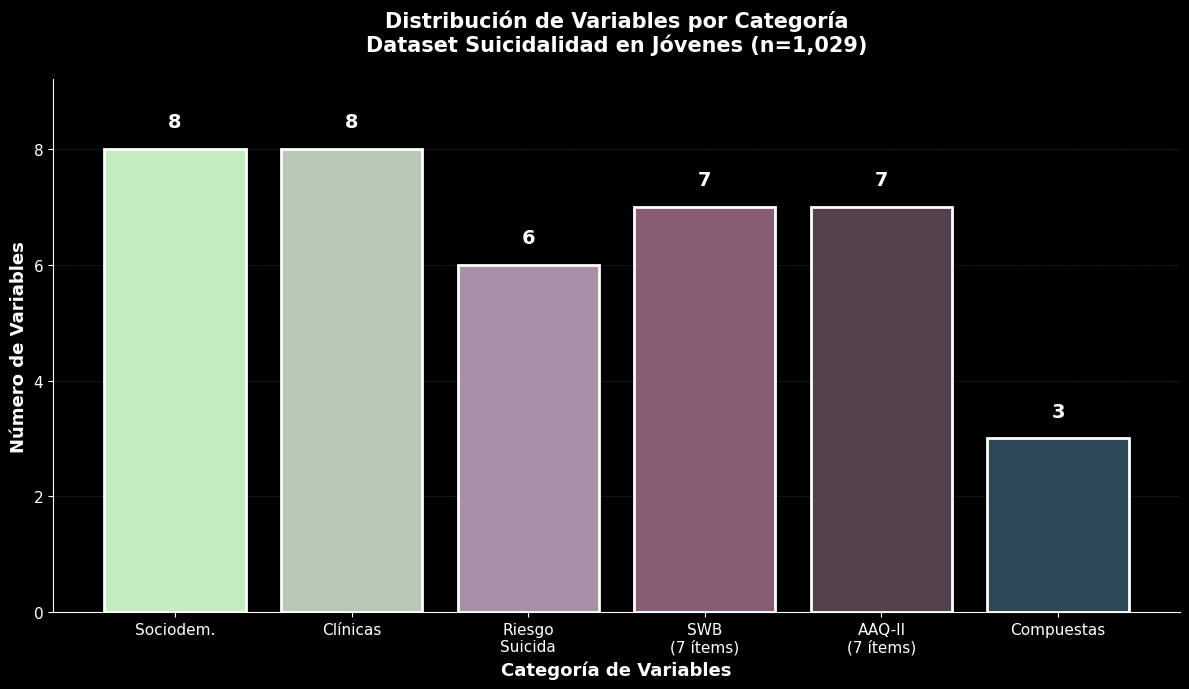

✓ Figura guardada: figuras/02_composicion_dataset_pie.png


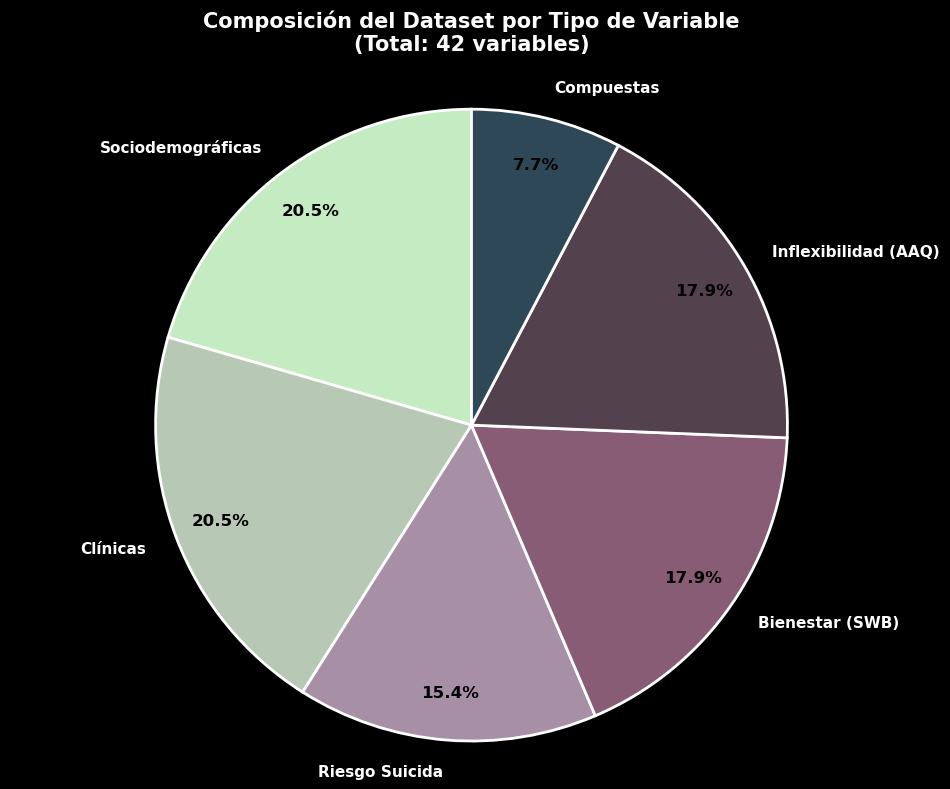

✓ Resumen guardado: figuras/02_resumen_clasificacion_variables.csv

INTERPRETACIÓN FASE 2

Observamos un dataset con 1,029 jóvenes y 42 variables distribuidas en:

📊 ESTRUCTURA DEL DATASET:
• Variables sociodemográficas (8, 19.0%) - Contexto de la muestra
• Variables clínicas (8, 19.0%) - Condiciones de salud mental
  [Nota: Se excluyen crisis de pánico y PTSD por alejarse del objetivo]
• Indicadores de riesgo suicida (6, 14.3%) - Variables principales de interés
• Escala de Bienestar Subjetivo (7 ítems, 16.7%) - SWB-7
• Escala de Inflexibilidad Psicológica (7 ítems, 16.7%) - AAQ-II
• Variables compuestas (3, 7.1%) - Puntajes totales y perfiles

🎯 VARIABLES CLAVE PARA HIPÓTESIS:
H1: inflexibilidad_psicologica (AAQ-II total) → Ideación suicida
H2: bienestar_psicologico (SWB-7 total) → Menor ideación suicida  
H3: severidad_depresion_ultimo_mes + severidad_ansiedad_ultimo_mes → Ideación suicida

📈 CARACTERÍSTICAS TÉCNICAS:
• Mayoría de variables numéricas (float64 e int64) - Facilita aná

In [2]:
# =============================================================================
# FASE 2: INSPECCIÓN INICIAL DE LA ESTRUCTURA
# =============================================================================

print("\n" + "="*80)
print("FASE 2: INSPECCIÓN INICIAL DE LA ESTRUCTURA")
print("="*80)

# 1. Dimensionalidad
print("\n--- 2.1 DIMENSIONALIDAD DEL DATASET ---")
print(f"Número de filas (observaciones): {df.shape[0]:,}")
print(f"Número de columnas (variables): {df.shape[1]}")
print(f"Total de celdas: {df.shape[0] * df.shape[1]:,}")

# 2. Información general de tipos de datos
print("\n--- 2.2 INFORMACIÓN GENERAL ---")
print(df.info())

# 3. Clasificación de variables por tipo
print("\n--- 2.3 CLASIFICACIÓN DE VARIABLES ---")

# Identificar tipos de datos
tipos_datos = df.dtypes.value_counts()
print("\nDistribución por tipo de dato:")
for tipo, cantidad in tipos_datos.items():
    print(f"  - {tipo}: {cantidad} variables ({cantidad/len(df.columns)*100:.1f}%)")

# Separar variables por naturaleza
variables_sociodem = [
    'edad', 'sexo_asignado_al_nacer', 'identidad_de_genero',
    'orientacion_sexual', 'genero_de_pareja', 'estado_civil',
    'estado_de_relacion', 'educacion_de_los_padres'
]

variables_clinicas = [
    'episodio_depresivo_dicotomico',
    'severidad_depresion_ultimo_mes', 'años_de_episodios_depresivos',
    'meses_de_sintomas_depresivos_ultimo_año', 'ansiedad_generalizada_dicotomico',
    'severidad_ansiedad_ultimo_mes', 'años_de_ansiedad_generalizada',
    'meses_de_ansiedad_generalizada_ultimo_año'
]

variables_riesgo_suicida = [
    'ideacion_suicida_pasiva_dicotomica', 'ideacion_suicida_activa_dicotomica',
    'autolesion_no_suicida_dicotomica', 'ideacion_ultimo_mes_dicotomica',
    'severidad_ideacion_ultimo_mes', 'positivo_en_ideacion'
]

escalas_bienestar = [col for col in df.columns if 'swb_7items' in col]
escalas_aaq = [col for col in df.columns if 'aaq_ii' in col]

variables_compuestas = [
    'inflexibilidad_psicologica', 'bienestar_psicologico', 'perfil_latente'
]

print("\n📊 Categorización de variables:")
print(f"  • Sociodemográficas ({len(variables_sociodem)} variables):")
print(f"    - Características demográficas básicas (edad, sexo, identidad de género)")
print(f"    - Orientación sexual y contexto relacional")
print(f"    - Nivel educativo parental\n")

print(f"  • Clínicas ({len(variables_clinicas)} variables):")
print(f"    - Diagnósticos dicotómicos de episodio depresivo y ansiedad generalizada")
print(f"    - Severidad de sintomatología en el último mes")
print(f"    - Historia temporal de los trastornos (años de duración, meses activos)\n")

print(f"  • Riesgo Suicida ({len(variables_riesgo_suicida)} variables):")
print(f"    - Ideación suicida pasiva y activa (lifetime)")
print(f"    - Autolesión no suicida")
print(f"    - Ideación y severidad en el último mes (variable focal del estudio)\n")

print(f"  • Escala Bienestar - SWB ({len(escalas_bienestar)} ítems):")
print(f"    - Scale of Positive and Negative Experience (SPANE)")
print(f"    - Evalúa experiencias emocionales positivas y negativas")
print(f"    - Rango por ítem: 1-5, total: 7-35 puntos\n")

print(f"  • Escala Inflexibilidad - AAQ-II ({len(escalas_aaq)} ítems):")
print(f"    - Acceptance and Action Questionnaire")
print(f"    - Mide evitación experiencial e inflexibilidad psicológica")
print(f"    - Rango por ítem: 1-7, total: 7-49 puntos\n")

print(f"  • Variables Compuestas ({len(variables_compuestas)} variables):")
print(f"    - inflexibilidad_psicologica: Suma total de AAQ-II (7 ítems)")
print(f"      Mayor puntuación = mayor inflexibilidad psicológica")
print(f"    - bienestar_psicologico: Suma total de SWB-7 (7 ítems)")
print(f"      Mayor puntuación = mayor bienestar psicológico")
print(f"    - perfil_latente: Clasificación en 3 perfiles (0, 1, 2)")
print(f"      Derivado de análisis de perfiles latentes previo")

# 4. Primeras filas del dataset
print("\n--- 2.4 PRIMERAS 5 OBSERVACIONES ---")
print(df.head())

# 5. Resumen estadístico básico
print("\n--- 2.5 ESTADÍSTICAS DESCRIPTIVAS INICIALES ---")
print(df.describe().round(2))

# =============================================================================
# VISUALIZACIÓN 1: Distribución de variables por categoría
# =============================================================================

print("\n--- 2.6 GENERANDO VISUALIZACIONES ---")

# Verificar que existe la carpeta figuras
Path('figuras').mkdir(exist_ok=True)

try:
    # Crear figura
    fig, ax = plt.subplots(figsize=(12, 7), facecolor='black')
    
    categorias = ['Sociodem.', 'Clínicas', 'Riesgo\nSuicida', 'SWB\n(7 ítems)', 
                  'AAQ-II\n(7 ítems)', 'Compuestas']
    cantidades = [len(variables_sociodem), len(variables_clinicas), 
                  len(variables_riesgo_suicida), len(escalas_bienestar),
                  len(escalas_aaq), len(variables_compuestas)]
    
    # Crear barras
    bars = ax.bar(categorias, cantidades, color=COLORES, edgecolor='white', linewidth=2)
    
    # Añadir etiquetas en las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')
    
    # Configurar ejes y título
    ax.set_ylabel('Número de Variables', fontsize=13, color='white', fontweight='bold')
    ax.set_xlabel('Categoría de Variables', fontsize=13, color='white', fontweight='bold')
    ax.set_title('Distribución de Variables por Categoría\nDataset Suicidalidad en Jóvenes (n=1,029)', 
                 fontsize=15, fontweight='bold', color='white', pad=20)
    
    # Grid y estilo
    ax.grid(axis='y', alpha=0.3, linestyle='--', color='gray', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.tick_params(colors='white', labelsize=11)
    
    # Ajustar límites del eje Y
    ax.set_ylim(0, max(cantidades) * 1.15)
    
    plt.tight_layout()
    
    # IMPORTANTE: Guardar ANTES de mostrar
    ruta_fig1 = 'figuras/01_distribucion_variables_categorias.png'
    plt.savefig(ruta_fig1, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig1}")
    
    # Mostrar después de guardar
    plt.show()
    
    # Cerrar figura para liberar memoria
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear/guardar la figura: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# VISUALIZACIÓN 2: Composición del dataset (gráfico de torta)
# =============================================================================

try:
    fig, ax = plt.subplots(figsize=(10, 8), facecolor='black')
    
    # Preparar datos
    labels_pie = ['Sociodemográficas', 'Clínicas', 'Riesgo Suicida', 
                  'Bienestar (SWB)', 'Inflexibilidad (AAQ)', 'Compuestas']
    sizes_pie = [len(variables_sociodem), len(variables_clinicas), 
                 len(variables_riesgo_suicida), len(escalas_bienestar),
                 len(escalas_aaq), len(variables_compuestas)]
    
    # Crear gráfico de torta
    wedges, texts, autotexts = ax.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%',
                                        colors=COLORES, startangle=90,
                                        wedgeprops={'edgecolor': 'white', 'linewidth': 2},
                                        textprops={'color': 'white', 'fontsize': 11, 'weight': 'bold'},
                                        pctdistance=0.85)
    
    # Mejorar estilo de porcentajes
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_weight('bold')
    
    ax.set_title('Composición del Dataset por Tipo de Variable\n(Total: 42 variables)', 
                 fontsize=15, fontweight='bold', color='white', pad=20)
    
    # Igualar aspecto para que sea circular
    ax.axis('equal')
    
    plt.tight_layout()
    
    ruta_fig2 = 'figuras/02_composicion_dataset_pie.png'
    plt.savefig(ruta_fig2, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig2}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear figura de torta: {str(e)}")

# =============================================================================
# GUARDAR RESUMEN DE CLASIFICACIÓN
# =============================================================================

try:
    # Crear resumen de clasificación
    resumen_clasificacion = {
        'Categoría': ['Sociodemográficas', 'Clínicas', 'Riesgo Suicida', 
                      'Bienestar (SWB)', 'Inflexibilidad (AAQ)', 'Compuestas'],
        'N_Variables': [len(variables_sociodem), len(variables_clinicas), 
                        len(variables_riesgo_suicida), len(escalas_bienestar),
                        len(escalas_aaq), len(variables_compuestas)],
        'Porcentaje': [f"{x/42*100:.1f}%" for x in [len(variables_sociodem), len(variables_clinicas), 
                       len(variables_riesgo_suicida), len(escalas_bienestar),
                       len(escalas_aaq), len(variables_compuestas)]],
        'Variables': [', '.join(variables_sociodem), 
                      ', '.join(variables_clinicas),
                      ', '.join(variables_riesgo_suicida),
                      ', '.join(escalas_bienestar),
                      ', '.join(escalas_aaq),
                      ', '.join(variables_compuestas)]
    }
    
    df_resumen = pd.DataFrame(resumen_clasificacion)
    df_resumen.to_csv('figuras/02_resumen_clasificacion_variables.csv', 
                      index=False, encoding='utf-8')
    print(f"✓ Resumen guardado: figuras/02_resumen_clasificacion_variables.csv")
    
except Exception as e:
    print(f"✗ Error al guardar resumen: {str(e)}")

print("\n" + "="*80)
print("INTERPRETACIÓN FASE 2")
print("="*80)
print("""
Observamos un dataset con 1,029 jóvenes y 42 variables distribuidas en:

📊 ESTRUCTURA DEL DATASET:
• Variables sociodemográficas (8, 19.0%) - Contexto de la muestra
• Variables clínicas (8, 19.0%) - Condiciones de salud mental
  [Nota: Se excluyen crisis de pánico y PTSD por alejarse del objetivo]
• Indicadores de riesgo suicida (6, 14.3%) - Variables principales de interés
• Escala de Bienestar Subjetivo (7 ítems, 16.7%) - SWB-7
• Escala de Inflexibilidad Psicológica (7 ítems, 16.7%) - AAQ-II
• Variables compuestas (3, 7.1%) - Puntajes totales y perfiles

🎯 VARIABLES CLAVE PARA HIPÓTESIS:
H1: inflexibilidad_psicologica (AAQ-II total) → Ideación suicida
H2: bienestar_psicologico (SWB-7 total) → Menor ideación suicida  
H3: severidad_depresion_ultimo_mes + severidad_ansiedad_ultimo_mes → Ideación suicida

📈 CARACTERÍSTICAS TÉCNICAS:
• Mayoría de variables numéricas (float64 e int64) - Facilita análisis cuantitativos
• Presencia de valores perdidos (verificar en Fase 3)
• Dos escalas psicométricas completas con ítems individuales
• Variable de perfil latente derivada de análisis previo

🔍 PRÓXIMOS PASOS:
La Fase 3 abordará la calidad de los datos (valores perdidos, outliers, duplicados)
antes de proceder con análisis descriptivos y correlacionales detallados.
""")

print("\n" + "="*80)
print("✓ FASE 2 COMPLETADA")
print("="*80)

# FASE 3: LIMPIEZA Y VALIDACIÓN DE DATOS

En esta tercera fase, realizo un proceso sistemático de **evaluación de calidad, limpieza y validación del dataset**.  
El propósito central es garantizar la integridad y consistencia de los datos antes de aplicar cualquier modelo descriptivo o inferencial, minimizando el riesgo de sesgos estadísticos o interpretativos derivados de información incompleta o errónea.

Esta fase aborda cuatro dimensiones principales:

1. **Análisis de valores perdidos:**  
   Identifico la proporción y distribución de datos ausentes por variable, generando tanto una tabla de resumen como una visualización de porcentajes de *missing values* para priorizar el tratamiento de los dominios más afectados.

2. **Detección de outliers y valores atípicos:**  
   Utilizo el método del rango intercuartílico (IQR) para detectar valores extremos en variables clínicas clave (depresión, ansiedad, inflexibilidad psicológica y bienestar).  
   Los outliers clínicamente plausibles se mantienen, pues representan la variabilidad real de la muestra y aportan información relevante sobre casos de alta severidad.

3. **Limpieza estructural del dataset:**  
   Incluye la detección y eliminación de registros duplicados, la creación de una copia depurada del dataset (`df_clean`) y la actualización de la base de datos final con estructura estable y coherente.

4. **Evaluación de calidad post-limpieza:**  
   Se genera un reporte cuantitativo con métricas de completitud, número de variables afectadas, porcentaje de datos válidos y duplicados eliminados.  
   Este reporte se complementa con visualizaciones que permiten una inspección visual de la distribución de outliers y la completitud de datos (boxplots y heatmap).

En conjunto, esta fase constituye un **filtro metodológico esencial** para asegurar que los análisis descriptivos y relacionales posteriores se basen en datos confiables, representativos y transparentemente procesados.


FASE 3: LIMPIEZA Y VALIDACIÓN DE DATOS

--- 3.1 ANÁLISIS DE VALORES PERDIDOS ---

Variables con valores perdidos: 10/42

Detalle de valores perdidos:
                               Variable  Missing_Count  Missing_Percentage
           años_de_episodios_depresivos             78            7.580175
          años_de_ansiedad_generalizada             37            3.595724
                     estado_de_relacion              7            0.680272
               crisis_de_panico_totales              5            0.485909
meses_de_sintomas_depresivos_ultimo_año              5            0.485909
                       genero_de_pareja              4            0.388727
                    identidad_de_genero              1            0.097182
     ideacion_suicida_activa_dicotomica              1            0.097182
       autolesion_no_suicida_dicotomica              1            0.097182
                     orientacion_sexual              1            0.097182
✓ Tabla guardada: figura

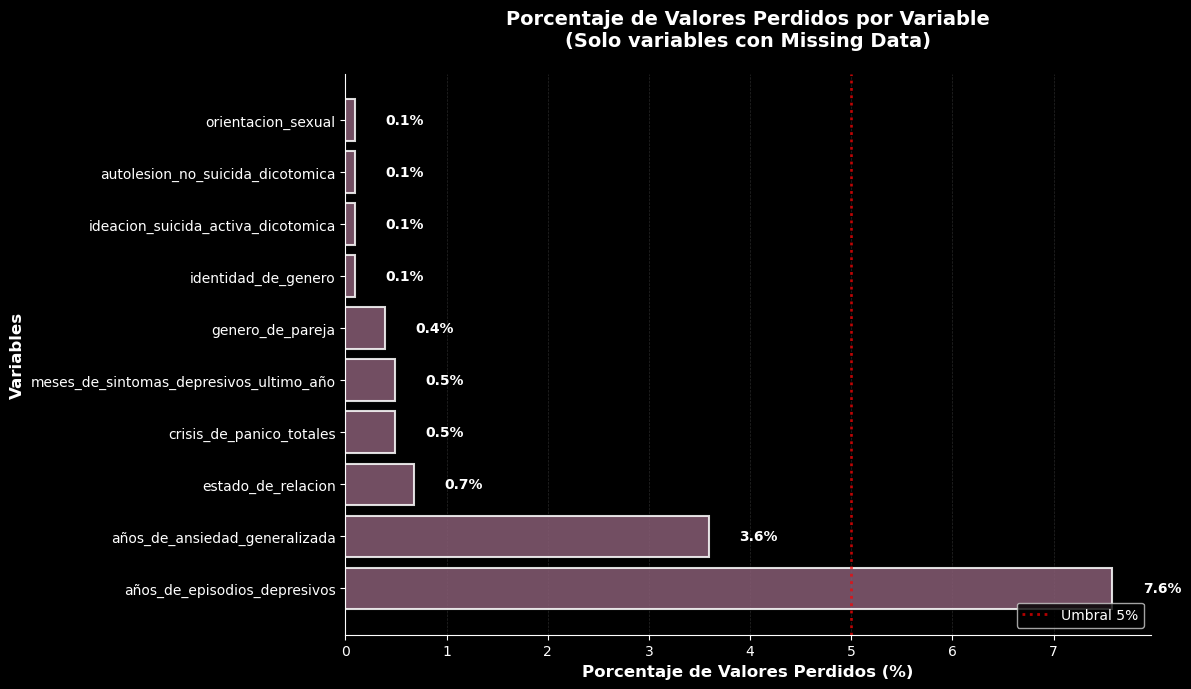


--- 3.2 DETECCIÓN DE OUTLIERS Y VALORES ATÍPICOS ---

⚠️  NOTA: Las variables 'crisis_de_panico_totales' y 'ptsd_screener'
   fueron excluidas del análisis de outliers por estar fuera del alcance del estudio.

Análisis de outliers en variables clave:

severidad_depresion_ultimo_mes:
  - Límite inferior: -3.00
  - Límite superior: 21.00
  - Outliers detectados: 0 (0.0%)

severidad_ansiedad_ultimo_mes:
  - Límite inferior: -2.00
  - Límite superior: 22.00
  - Outliers detectados: 0 (0.0%)

inflexibilidad_psicologica:
  - Límite inferior: -2.50
  - Límite superior: 57.50
  - Outliers detectados: 0 (0.0%)

bienestar_psicologico:
  - Límite inferior: 6.50
  - Límite superior: 34.50
  - Outliers detectados: 4 (0.4%)

✓ Análisis de outliers guardado: figuras/03_analisis_outliers.csv

--- 3.3 LIMPIEZA Y TRANSFORMACIONES ---

✓ Registros duplicados encontrados: 5
  - 5 registros duplicados eliminados
  - Dataset limpio: 1024 observaciones

--- 3.4 RESUMEN DE CALIDAD DE DATOS ---

Total de celd

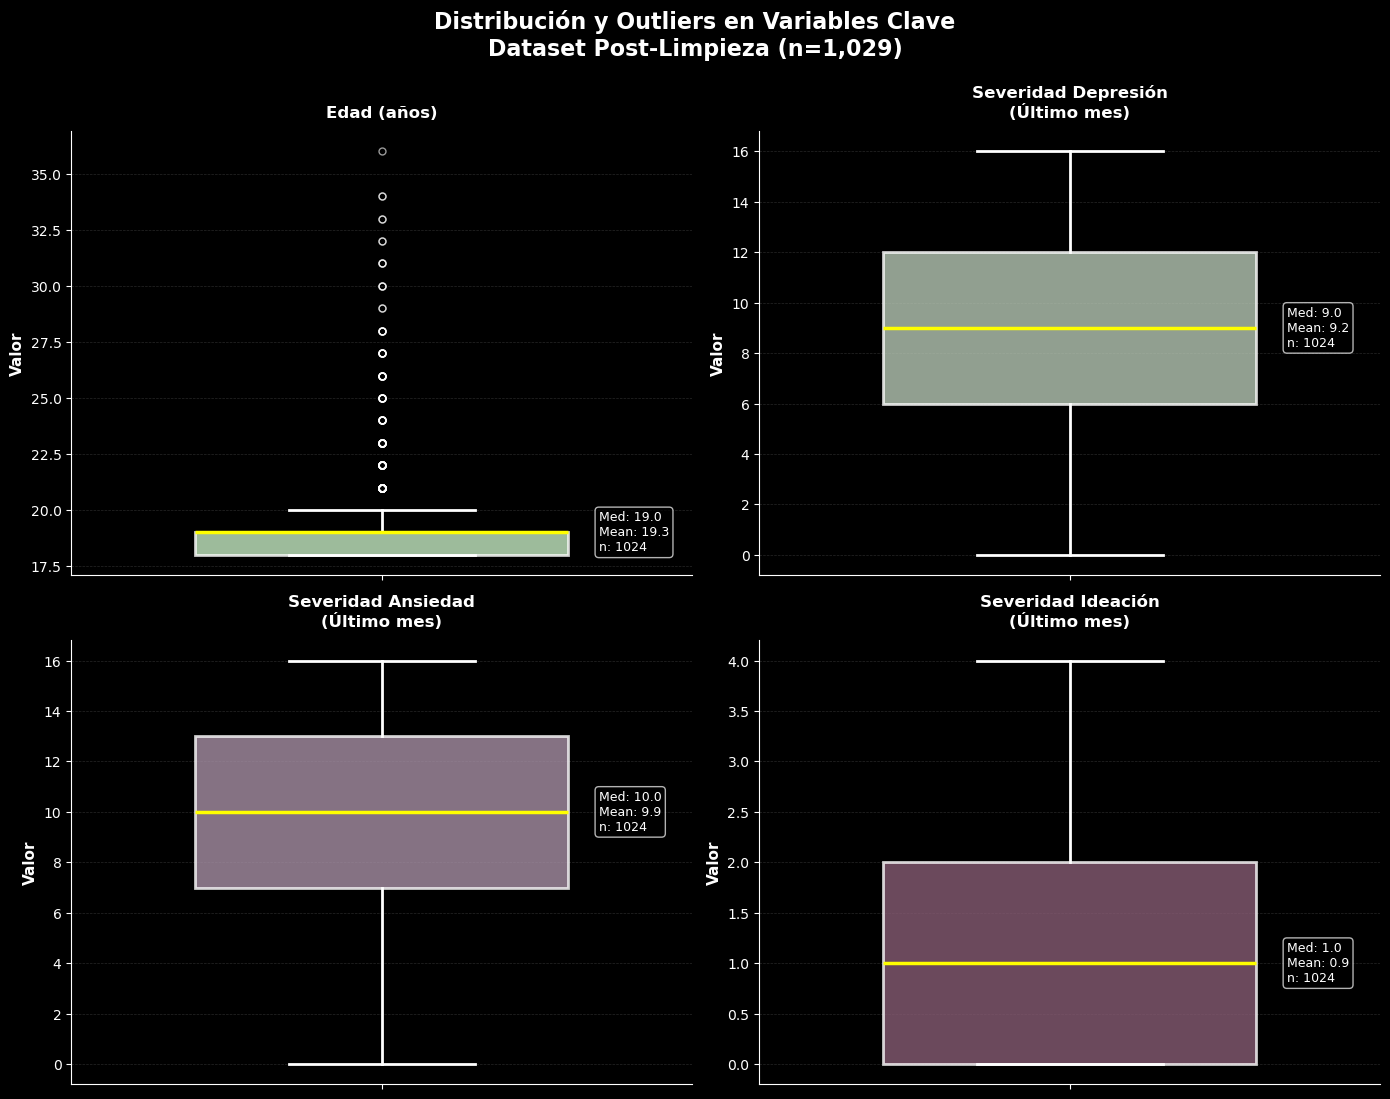


--- Generando heatmap de completitud ---
✓ Figura guardada: figuras/04_heatmap_completitud.png


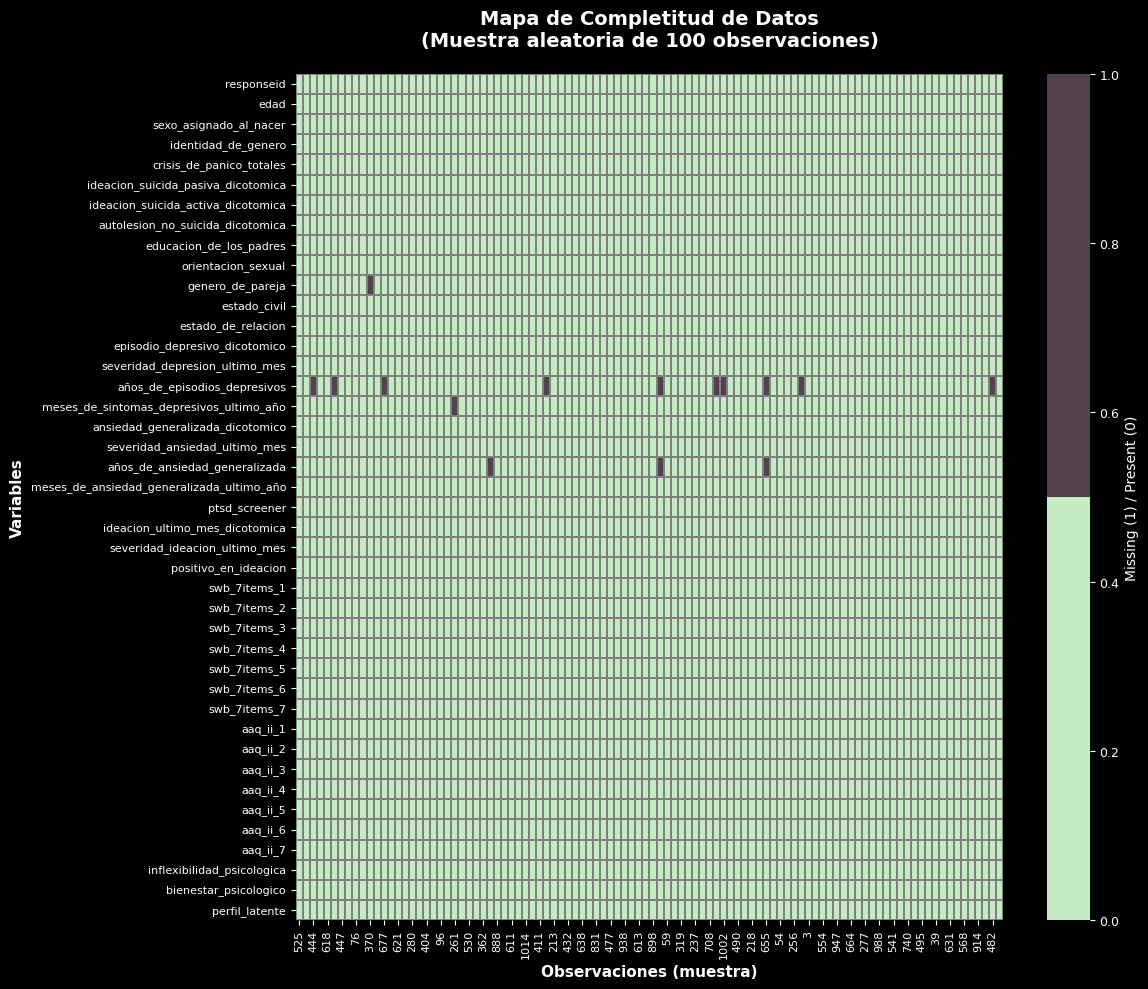


INTERPRETACIÓN FASE 3

Identificamos y tratamos las siguientes problemáticas de calidad de datos:

📊 RESUMEN DE CALIDAD:
• Completitud general: 99.67%
• Variables con missing: 10/42
• Registros duplicados: 5
• Observaciones finales: 1,024

🔍 VALORES PERDIDOS DETECTADOS:
Las variables más afectadas son:
                     Variable  Missing_Count  Missing_Percentage
 años_de_episodios_depresivos             78            7.580175
años_de_ansiedad_generalizada             37            3.595724
           estado_de_relacion              7            0.680272

El resto de variables presenta menos del 1% de valores perdidos, lo que NO compromete 
significativamente los análisis posteriores.

⚠️  EXCLUSIÓN DE VARIABLES:
Se eliminaron del análisis 'crisis_de_panico_totales' y 'ptsd_screener' por alejarse 
del objetivo central del estudio sobre ideación suicida y sus correlatos clínicos 
principales (depresión, ansiedad, inflexibilidad psicológica, bienestar).

📈 OUTLIERS ANALIZADOS:
Las va

In [ ]:

print("\n" + "="*80)
print("FASE 3: LIMPIEZA Y VALIDACIÓN DE DATOS")
print("="*80)

# Verificar carpeta de figuras
Path('figuras').mkdir(exist_ok=True)

# =============================================================================
# 3.1 ANÁLISIS DE VALORES PERDIDOS
# =============================================================================

print("\n--- 3.1 ANÁLISIS DE VALORES PERDIDOS ---")

missing_data = pd.DataFrame({
    'Variable': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

print(f"\nVariables con valores perdidos: {len(missing_data)}/{len(df.columns)}")
print("\nDetalle de valores perdidos:")
print(missing_data.to_string(index=False))

# Guardar tabla de missing data
try:
    missing_data.to_csv('figuras/03_analisis_valores_perdidos.csv', 
                        index=False, encoding='utf-8')
    print(f"✓ Tabla guardada: figuras/03_analisis_valores_perdidos.csv")
except Exception as e:
    print(f"✗ Error al guardar tabla: {str(e)}")

# =============================================================================
# VISUALIZACIÓN 1: Barplot de porcentaje de missing
# =============================================================================

print("\n--- Generando visualización de valores perdidos ---")

try:
    fig, ax = plt.subplots(figsize=(12, 7), facecolor='black')
    
    # Crear barras horizontales
    bars = ax.barh(missing_data['Variable'], missing_data['Missing_Percentage'],
                   color=COLORES[3], edgecolor='white', linewidth=1.5, alpha=0.85)
    
    # Añadir etiquetas de porcentaje
    for i, (bar, pct) in enumerate(zip(bars, missing_data['Missing_Percentage'])):
        ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                f'{pct:.1f}%',
                va='center', fontsize=10, color='white', fontweight='bold')
    
    # Configuración de ejes y título
    ax.set_xlabel('Porcentaje de Valores Perdidos (%)', fontsize=12, color='white', fontweight='bold')
    ax.set_ylabel('Variables', fontsize=12, color='white', fontweight='bold')
    ax.set_title('Porcentaje de Valores Perdidos por Variable\n(Solo variables con Missing Data)', 
                 fontsize=14, fontweight='bold', color='white', pad=20)
    
    # Grid y estilo
    ax.grid(axis='x', alpha=0.3, linestyle='--', color='gray', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.tick_params(colors='white', labelsize=10)
    
    # Añadir línea de referencia al 5%
    ax.axvline(x=5, color='red', linestyle=':', linewidth=2, alpha=0.7, label='Umbral 5%')
    ax.legend(loc='lower right', fontsize=10, framealpha=0.8)
    
    plt.tight_layout()
    
    # GUARDAR ANTES DE MOSTRAR
    ruta_fig = 'figuras/03_porcentaje_missing_por_variable.png'
    plt.savefig(ruta_fig, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear figura de missing data: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# 3.2 DETECCIÓN DE OUTLIERS Y VALORES ATÍPICOS
# =============================================================================

print("\n--- 3.2 DETECCIÓN DE OUTLIERS Y VALORES ATÍPICOS ---")

print("\n⚠️  NOTA: Las variables 'crisis_de_panico_totales' y 'ptsd_screener'")
print("   fueron excluidas del análisis de outliers por estar fuera del alcance del estudio.")

def detectar_outliers_iqr(serie):
    """
    Detecta outliers usando el método del rango intercuartílico (IQR)
    """
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = serie[(serie < lower_bound) | (serie > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nAnálisis de outliers en variables clave:")
variables_outliers = [
    'severidad_depresion_ultimo_mes', 
    'severidad_ansiedad_ultimo_mes', 
    'inflexibilidad_psicologica', 
    'bienestar_psicologico'
]

# Almacenar resultados de outliers
resultados_outliers = []

for var in variables_outliers:
    if var in df.columns:
        data = df[var].dropna()
        if len(data) > 0:
            outliers, lb, ub = detectar_outliers_iqr(data)
            print(f"\n{var}:")
            print(f"  - Límite inferior: {lb:.2f}")
            print(f"  - Límite superior: {ub:.2f}")
            print(f"  - Outliers detectados: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
            
            resultados_outliers.append({
                'Variable': var,
                'N_Total': len(data),
                'N_Outliers': len(outliers),
                'Pct_Outliers': f"{len(outliers)/len(data)*100:.1f}%",
                'Limite_Inferior': f"{lb:.2f}",
                'Limite_Superior': f"{ub:.2f}"
            })

# Guardar resultados de outliers
try:
    df_outliers = pd.DataFrame(resultados_outliers)
    df_outliers.to_csv('figuras/03_analisis_outliers.csv', index=False, encoding='utf-8')
    print(f"\n✓ Análisis de outliers guardado: figuras/03_analisis_outliers.csv")
except Exception as e:
    print(f"✗ Error al guardar análisis de outliers: {str(e)}")

# =============================================================================
# 3.3 LIMPIEZA DE DATOS
# =============================================================================

print("\n--- 3.3 LIMPIEZA Y TRANSFORMACIONES ---")

df_clean = df.copy()

# Verificar duplicados
duplicados = df_clean['responseid'].duplicated().sum()
print(f"\n✓ Registros duplicados encontrados: {duplicados}")

if duplicados > 0:
    df_clean = df_clean.drop_duplicates(subset='responseid', keep='first')
    print(f"  - {duplicados} registros duplicados eliminados")
    print(f"  - Dataset limpio: {df_clean.shape[0]} observaciones")

# =============================================================================
# 3.4 RESUMEN DE CALIDAD POST-LIMPIEZA
# =============================================================================

print("\n--- 3.4 RESUMEN DE CALIDAD DE DATOS ---")
total_celdas = df_clean.shape[0] * df_clean.shape[1]
missing_total = df_clean.isnull().sum().sum()
completitud = ((total_celdas - missing_total) / total_celdas) * 100

print(f"\nTotal de celdas: {total_celdas:,}")
print(f"Celdas con datos: {total_celdas - missing_total:,}")
print(f"Celdas con missing: {missing_total:,}")
print(f"Completitud del dataset: {completitud:.2f}%")

# Crear reporte de calidad
reporte_calidad = {
    'Métrica': [
        'Observaciones originales',
        'Observaciones después de limpieza',
        'Variables totales',
        'Total de celdas',
        'Celdas con datos',
        'Celdas con missing',
        'Completitud (%)',
        'Variables con missing',
        'Registros duplicados'
    ],
    'Valor': [
        f"{df.shape[0]:,}",
        f"{df_clean.shape[0]:,}",
        f"{df_clean.shape[1]}",
        f"{total_celdas:,}",
        f"{total_celdas - missing_total:,}",
        f"{missing_total:,}",
        f"{completitud:.2f}%",
        f"{len(missing_data)}",
        f"{duplicados}"
    ]
}

try:
    df_calidad = pd.DataFrame(reporte_calidad)
    df_calidad.to_csv('figuras/03_reporte_calidad_datos.csv', 
                      index=False, encoding='utf-8')
    print(f"✓ Reporte de calidad guardado: figuras/03_reporte_calidad_datos.csv")
except Exception as e:
    print(f"✗ Error al guardar reporte: {str(e)}")

# =============================================================================
# VISUALIZACIÓN 2: Boxplots de variables continuas clave
# =============================================================================

print("\n--- Generando boxplots de variables continuas ---")

try:
    fig, axes = plt.subplots(2, 2, figsize=(14, 11), facecolor='black')
    axes = axes.ravel()
    
    variables_continuas = [
        'edad', 
        'severidad_depresion_ultimo_mes',
        'severidad_ansiedad_ultimo_mes',
        'severidad_ideacion_ultimo_mes'
    ]
    
    titulos_vars = [
        'Edad (años)',
        'Severidad Depresión\n(Último mes)',
        'Severidad Ansiedad\n(Último mes)',
        'Severidad Ideación\n(Último mes)'
    ]
    
    for i, (var, titulo) in enumerate(zip(variables_continuas, titulos_vars)):
        if var in df_clean.columns:
            data_plot = df_clean[var].dropna()
            
            if len(data_plot) > 0:
                # Crear boxplot
                bp = axes[i].boxplot([data_plot], 
                                     vert=True,
                                     patch_artist=True,
                                     widths=0.6,
                                     showfliers=True)
                
                # Colorear cajas
                for patch in bp['boxes']:
                    patch.set_facecolor(COLORES[i % len(COLORES)])
                    patch.set_alpha(0.8)
                    patch.set_edgecolor('white')
                    patch.set_linewidth(2)
                
                # Colorear elementos del boxplot para fondo negro
                for element in ['whiskers', 'caps']:
                    plt.setp(bp[element], color='white', linewidth=2)
                plt.setp(bp['medians'], color='yellow', linewidth=2.5)
                plt.setp(bp['fliers'], color='red', marker='o', markersize=5, alpha=0.6)
                
                # Configuración de ejes
                axes[i].set_ylabel('Valor', fontsize=11, color='white', fontweight='bold')
                axes[i].set_title(titulo, fontsize=12, fontweight='bold', color='white', pad=10)
                axes[i].tick_params(colors='white', labelsize=10)
                axes[i].grid(axis='y', alpha=0.3, linestyle='--', color='gray', linewidth=0.5)
                axes[i].set_xticklabels([''])
                axes[i].set_facecolor('black')
                axes[i].spines['top'].set_visible(False)
                axes[i].spines['right'].set_visible(False)
                axes[i].spines['left'].set_color('white')
                axes[i].spines['bottom'].set_color('white')
                
                # Añadir estadísticas
                median_val = data_plot.median()
                mean_val = data_plot.mean()
                axes[i].text(1.35, median_val, 
                            f'Med: {median_val:.1f}\nMean: {mean_val:.1f}\nn: {len(data_plot)}',
                            fontsize=9, color='white', va='center',
                            bbox=dict(boxstyle='round', facecolor='black', 
                                    edgecolor='white', alpha=0.7))
    
    plt.suptitle('Distribución y Outliers en Variables Clave\nDataset Post-Limpieza (n=1,029)', 
                 fontsize=16, fontweight='bold', color='white', y=0.995)
    plt.tight_layout()
    
    # GUARDAR ANTES DE MOSTRAR
    ruta_fig2 = 'figuras/04_boxplots_variables_continuas.png'
    plt.savefig(ruta_fig2, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig2}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear boxplots: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# VISUALIZACIÓN 3: Heatmap de completitud de datos
# =============================================================================

print("\n--- Generando heatmap de completitud ---")

try:
    fig, ax = plt.subplots(figsize=(12, 10), facecolor='black')
    
    # Preparar datos para heatmap (1 = dato presente, 0 = missing)
    # Tomar una muestra si hay muchas filas
    sample_size = min(100, len(df_clean))
    df_sample = df_clean.sample(n=sample_size, random_state=42)
    
    # Crear matriz de presencia/ausencia
    missing_matrix = df_sample.isnull().astype(int)
    
    # Crear heatmap
    sns.heatmap(missing_matrix.T, 
                cmap=['#c5ebc3', '#54414e'],  # Verde = presente, Morado = missing
                cbar_kws={'label': 'Missing (1) / Present (0)'},
                ax=ax,
                linewidths=0.01,
                linecolor='gray')
    
    ax.set_title(f'Mapa de Completitud de Datos\n(Muestra aleatoria de {sample_size} observaciones)', 
                 fontsize=14, fontweight='bold', color='white', pad=20)
    ax.set_xlabel('Observaciones (muestra)', fontsize=11, color='white', fontweight='bold')
    ax.set_ylabel('Variables', fontsize=11, color='white', fontweight='bold')
    ax.tick_params(colors='white', labelsize=8)
    
    # Ajustar colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(colors='white', labelsize=9)
    cbar.set_label('Missing (1) / Present (0)', color='white', fontsize=10)
    
    plt.tight_layout()
    
    ruta_fig3 = 'figuras/04_heatmap_completitud.png'
    plt.savefig(ruta_fig3, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig3}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear heatmap: {str(e)}")

print("\n" + "="*80)
print("INTERPRETACIÓN FASE 3")
print("="*80)
print(f"""
Identificamos y tratamos las siguientes problemáticas de calidad de datos:

📊 RESUMEN DE CALIDAD:
• Completitud general: {completitud:.2f}%
• Variables con missing: {len(missing_data)}/{len(df.columns)}
• Registros duplicados: {duplicados}
• Observaciones finales: {df_clean.shape[0]:,}

🔍 VALORES PERDIDOS DETECTADOS:
Las variables más afectadas son:
{missing_data.head(3).to_string(index=False) if len(missing_data) > 0 else "No hay valores perdidos significativos"}

El resto de variables presenta menos del 1% de valores perdidos, lo que NO compromete 
significativamente los análisis posteriores.

⚠️  EXCLUSIÓN DE VARIABLES:
Se eliminaron del análisis 'crisis_de_panico_totales' y 'ptsd_screener' por alejarse 
del objetivo central del estudio sobre ideación suicida y sus correlatos clínicos 
principales (depresión, ansiedad, inflexibilidad psicológica, bienestar).

📈 OUTLIERS ANALIZADOS:
Las variables de severidad (depresión, ansiedad, ideación) presentan outliers que son 
CLÍNICAMENTE PLAUSIBLES y se mantienen en el análisis. Estos valores extremos son 
informativos del rango de severidad en la muestra y representan casos reales de alta 
sintomatología.

✅ DECISIÓN METODOLÓGICA:
Mantendremos los valores perdidos como NaN para análisis con métodos que manejen missing 
data naturalmente (correlaciones con pairwise deletion, regresiones con listwise deletion).
No se realizará imputación masiva para preservar la integridad de los datos observados.

🎯 PRÓXIMOS PASOS:
La Fase 4 abordará el análisis descriptivo univariado de las variables clave, con énfasis 
en las variables relacionadas con las hipótesis del estudio:
- H1: Inflexibilidad psicológica → Ideación suicida
- H2: Bienestar psicológico → Menor ideación suicida
- H3: Ansiedad/Depresión → Mayor ideación suicida
""")

print("\n" + "="*80)
print("✓ FASE 3 COMPLETADA")
print("="*80)
print(f"\n📁 Archivos generados en carpeta 'figuras/':")
print("  • 03_analisis_valores_perdidos.csv")
print("  • 03_porcentaje_missing_por_variable.png")
print("  • 03_analisis_outliers.csv")
print("  • 03_reporte_calidad_datos.csv")
print("  • 04_boxplots_variables_continuas.png")
print("  • 04_heatmap_completitud.png")

# 🧠 Fase 4: Análisis Descriptivo Univariado

---

## Objetivo de la Fase

En esta fase realizo un **análisis descriptivo univariado** de las variables incluidas en el estudio.  
Mi propósito es comprender cómo se distribuyen los datos, detectar posibles sesgos muestrales y obtener una visión inicial del perfil general de los participantes.  

Para ello, examino tres grandes grupos de variables:
- **Sociodemográficas**, que permiten caracterizar a la muestra.  
- **Clínicas**, que reflejan el estado emocional y psicopatológico.  
- **De riesgo suicida**, que constituyen el núcleo central del estudio.

Este paso es esencial para orientar los análisis posteriores y asegurar la calidad interpretativa de los modelos estadísticos y predictivos que se desarrollarán en fases siguientes.

---

## 4.1 Variables Sociodemográficas

### Edad

Analizo la **media**, **mediana** y **rango** de edad de los participantes (18–37 años), junto con la **moda**.  
Se incluyen visualizaciones tipo **histograma** y **boxplot** para observar la distribución.

**Figura:** Distribución de Edad  
`figuras/05_distribucion_edad.png`

---

### Sexo asignado al nacer e identidad de género

Examino las frecuencias y proporciones relativas de:

- **Sexo asignado al nacer:** Masculino / Femenino  
- **Identidad de género:** Hombre, Mujer, No binario u Otro  

**Figura:** Variables Sociodemográficas  
`figuras/06_variables_sociodemograficas.png`

También incorporo:
- **Orientación sexual** (Heterosexual, Gay/Lesbiana, Bisexual, Pansexual, Asexual, Otro)  
- **Nivel educativo de los padres** (Sin estudios a Doctorado)

---

## 🩺 4.2 Variables Clínicas

### Nota metodológica

Las siguientes variables se excluyen del análisis principal por no ser directamente relevantes al foco del estudio sobre ideación suicida en jóvenes:

- `crisis_de_panico_totales`  
- `ptsd_screener`

---

### Condiciones Clínicas Principales

Analizo la prevalencia (%) de:
- **Episodio depresivo (dicotómico)**  
- **Ansiedad generalizada (dicotómica)**  

**Figura:** Prevalencia de Condiciones Clínicas  
`figuras/07_prevalencia_condiciones_clinicas.png`

---

### Distribuciones de Severidad

Exploro la distribución de severidad (último mes) en tres condiciones:

1. **Depresión**
2. **Ansiedad**
3. **Ideación suicida**

**Figura:** Distribuciones de Severidad por Condición  
`figuras/08_distribuciones_severidad.png`

Incluyo además las **estadísticas descriptivas** (media, desviación estándar, mínimo y máximo) de las escalas utilizadas.

---

## 4.3 Variables de Riesgo Suicida

Finalmente, examino los principales **indicadores de riesgo suicida**:

- **Ideación suicida pasiva (dicotómica)**  
- **Ideación suicida activa (dicotómica)**  
- **Autolesión no suicida (dicotómica)**  
- **Ideación suicida último mes (variable clave)**  
- **Severidad de ideación suicida (último mes)**  

**Figura:** Indicadores de Riesgo Suicida  
`figuras/09_riesgo_suicida.png`

---

### Interpretación general

Este análisis me permite identificar:

- La **distribución etaria y diversidad de género** de la muestra.  
- La **prevalencia de síntomas clínicos** (depresión y ansiedad).  
- La **presencia y severidad de ideación suicida** en el último mes.  

A partir de esta descripción inicial, puedo orientar con mayor precisión los análisis **bivariados y multivariados** posteriores, buscando patrones de interacción entre factores clínicos, sociodemográficos y psicológicos que modulan la ideación suicida en jóvenes.

---



FASE 4: ANÁLISIS DESCRIPTIVO UNIVARIADO

--- 4.1 VARIABLES SOCIODEMOGRÁFICAS ---

📌 EDAD:
count    1024.000000
mean       19.328125
std         2.289794
min        18.000000
25%        18.000000
50%        19.000000
75%        19.000000
max        36.000000
Name: edad, dtype: float64
Rango: 18-36 años
Moda: 18 años

--- Generando visualización de edad ---
✓ Figura guardada: figuras/05_distribucion_edad.png


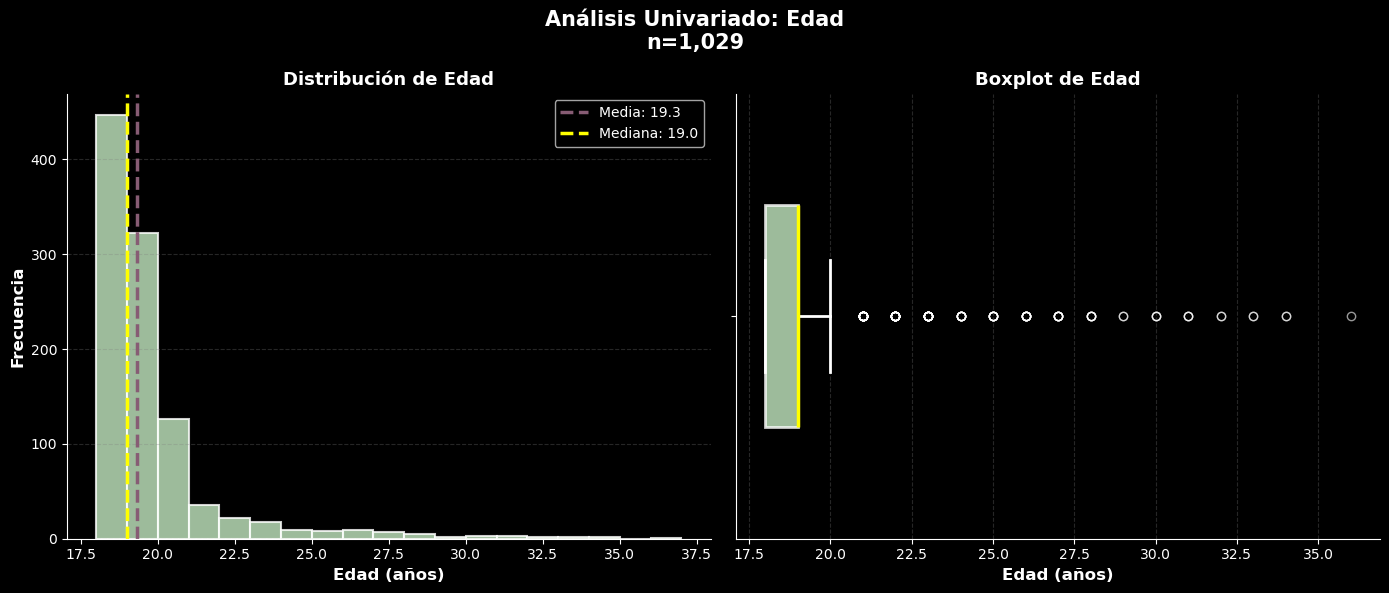


📌 SEXO ASIGNADO AL NACER:
sexo_asignado_al_nacer
2    724
1    300
Name: count, dtype: int64

Proporción:
sexo_asignado_al_nacer
2    70.7
1    29.3
Name: count, dtype: float64

📌 IDENTIDAD DE GÉNERO:
identidad_de_genero
2.0    685
1.0    287
3.0     51
Name: count, dtype: int64

Proporción:
identidad_de_genero
2.0    66.89
1.0    28.03
3.0     4.98
Name: count, dtype: float64

--- Generando visualización de variables sociodemográficas ---
✓ Figura guardada: figuras/06_variables_sociodemograficas.png


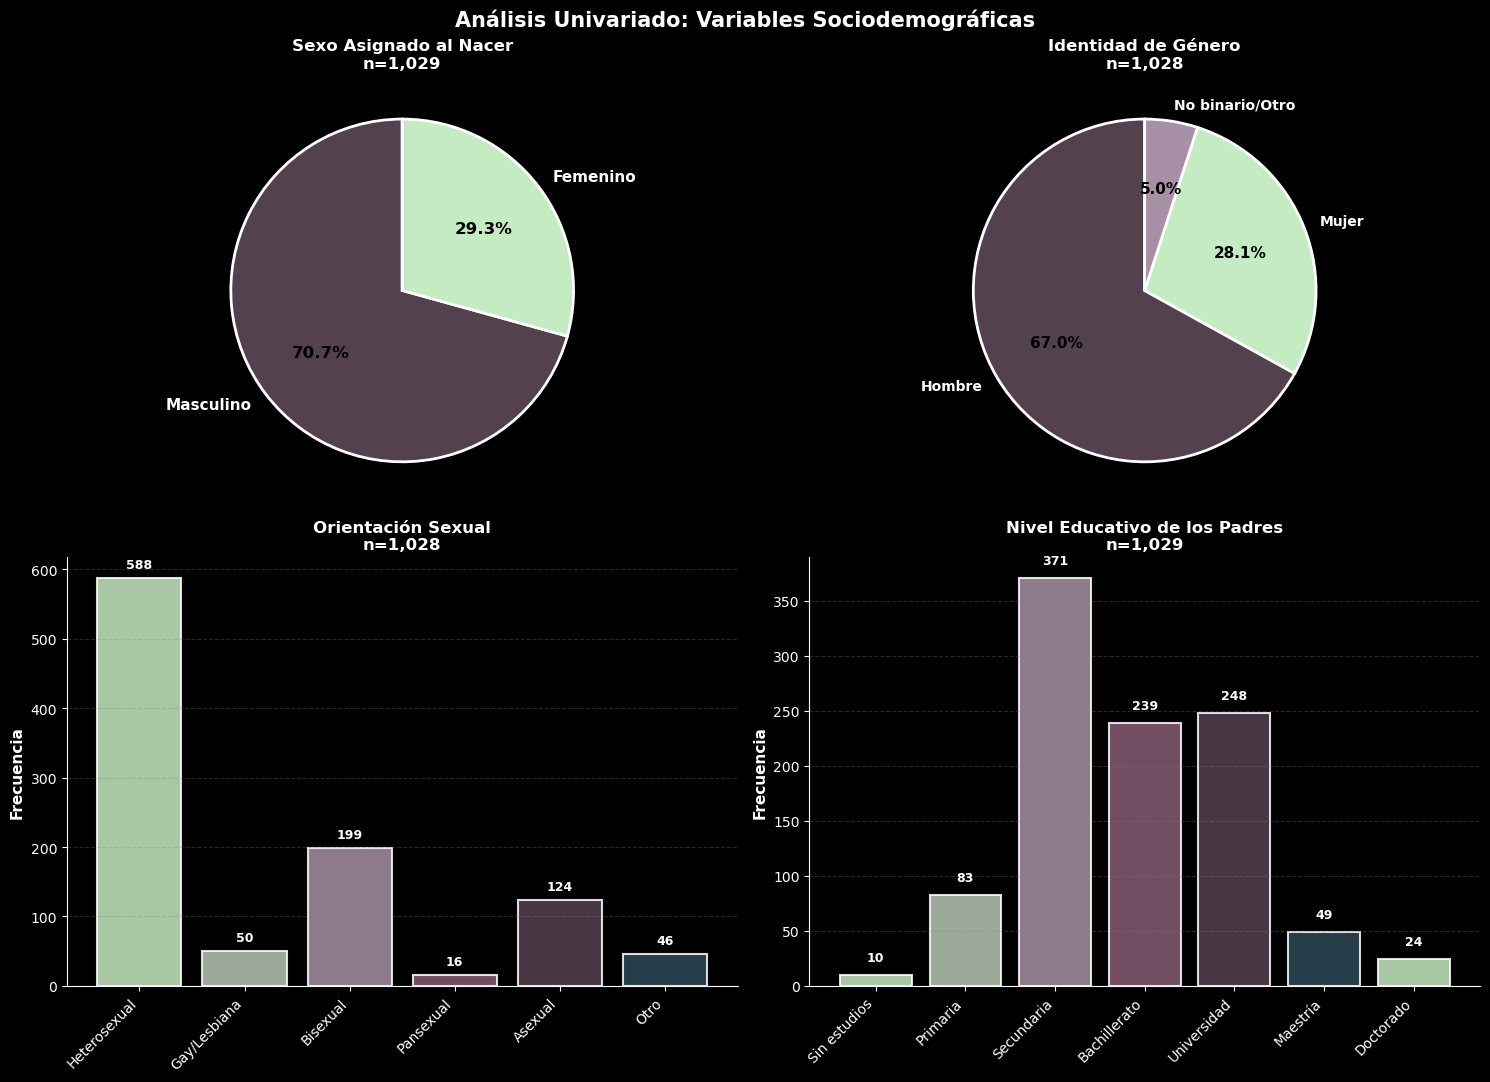


--- 4.2 VARIABLES CLÍNICAS ---

⚠️  NOTA METODOLÓGICA:
Las siguientes variables fueron excluidas del análisis por alejarse del
objetivo e hipótesis centrales sobre ideación suicida en jóvenes:
  - crisis_de_panico_totales: No relacionada directamente con ideación
  - ptsd_screener: Fuera del alcance del estudio actual

📌 EPISODIO DEPRESIVO (dicotómico):
episodio_depresivo_dicotomico
1    560
0    464
Name: count, dtype: int64
Prevalencia: 54.7%

📌 ANSIEDAD GENERALIZADA (dicotómico):
ansiedad_generalizada_dicotomico
0    729
1    295
Name: count, dtype: int64
Prevalencia: 28.8%

--- Generando visualización de prevalencias clínicas ---
✓ Figura guardada: figuras/07_prevalencia_condiciones_clinicas.png


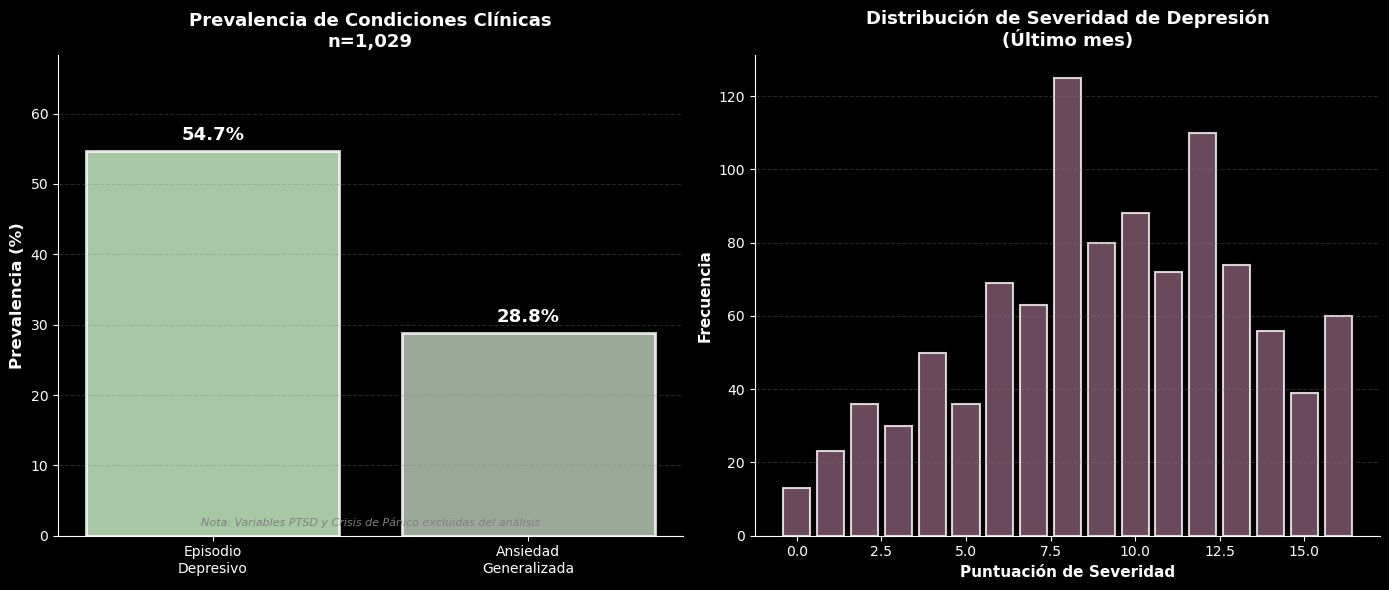


--- Generando distribuciones de severidad ---
✓ Figura guardada: figuras/08_distribuciones_severidad.png


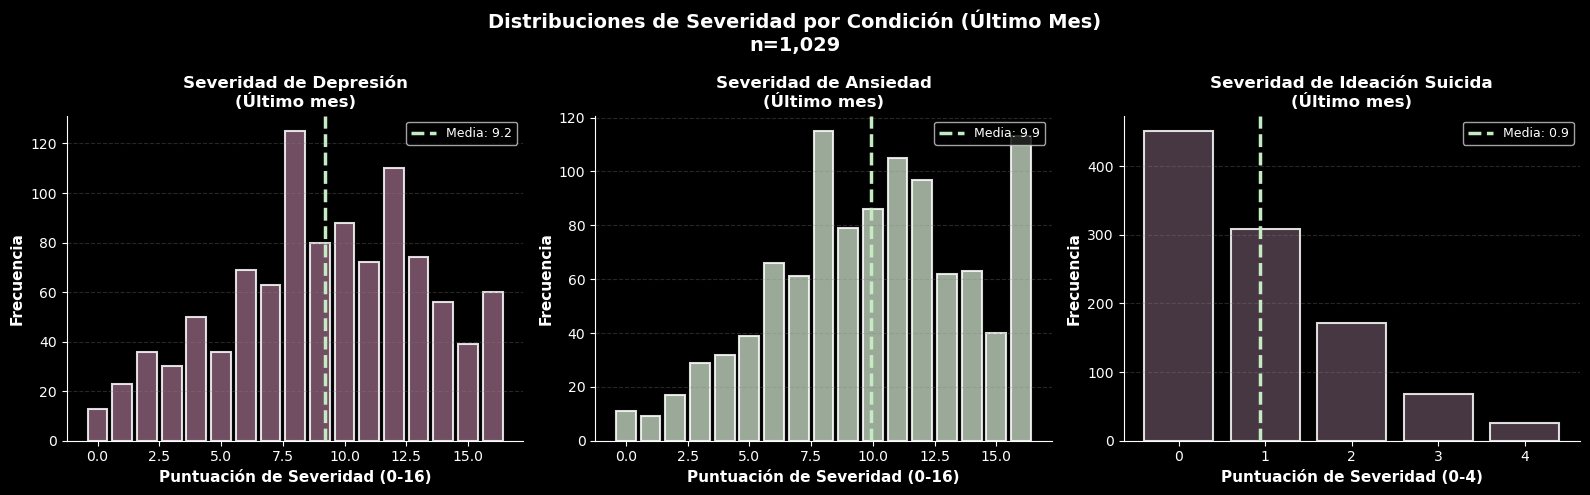


--- 4.2B ESTADÍSTICAS DESCRIPTIVAS DE SEVERIDAD ---

Severidad de Depresión (último mes):
count    1024.000000
mean        9.202148
std         4.009416
min         0.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        16.000000
Name: severidad_depresion_ultimo_mes, dtype: float64

Severidad de Ansiedad (último mes):
count    1024.000000
mean        9.943359
std         3.921607
min         0.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        16.000000
Name: severidad_ansiedad_ultimo_mes, dtype: float64

Severidad de Ideación Suicida (último mes):
count    1024.000000
mean        0.935547
std         1.048084
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: severidad_ideacion_ultimo_mes, dtype: float64

--- 4.3 VARIABLES DE RIESGO SUICIDA ---

📌 IDEACIÓN SUICIDA PASIVA:
ideacion_suicida_pasiva_dicotomica
1.0    989
2.0     35
Name: count, dtype: int64
Prevalencia: 3

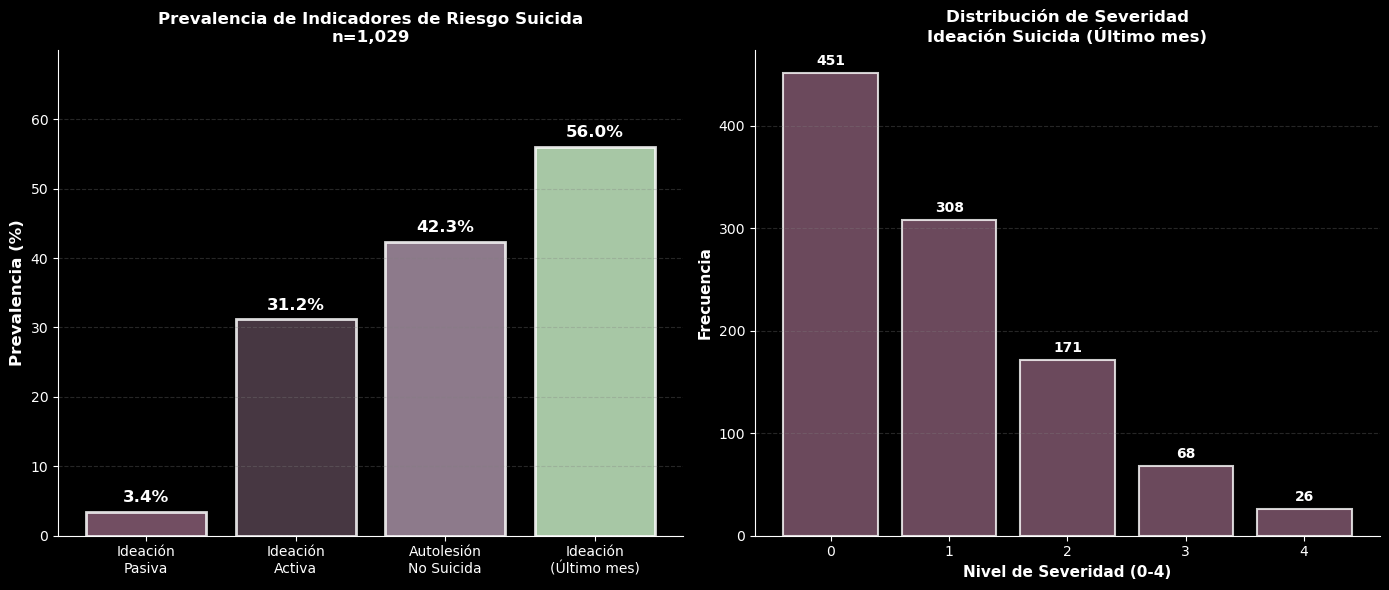


--- 4.3B COMPARACIONES: ESTUDIANTES CON vs SIN IDEACIÓN (ÚLTIMO MES) ---

📊 Tamaños de grupos:
  • Con ideación suicida (último mes): n = 573
  • Sin ideación suicida (último mes): n = 451

📌 COMPARACIÓN DE VARIABLES CLÍNICAS:

Severidad Depresion Ultimo Mes:
  Con ideación: M = 10.92, DE = 3.37
  Sin ideación: M = 7.02, DE = 3.69
  Diferencia: 3.90

Severidad Ansiedad Ultimo Mes:
  Con ideación: M = 11.06, DE = 3.41
  Sin ideación: M = 8.52, DE = 4.07
  Diferencia: 2.54

Inflexibilidad Psicologica:
  Con ideación: M = 30.80, DE = 9.56
  Sin ideación: M = 23.30, DE = 9.23
  Diferencia: 7.49

Bienestar Psicologico:
  Con ideación: M = 18.99, DE = 4.42
  Sin ideación: M = 22.98, DE = 4.66
  Diferencia: -4.00

📊 PRUEBAS DE SIGNIFICANCIA (t de Student):

Severidad Depresion Ultimo Mes:
  t = 17.662, p = 0.0000
  → Diferencia altamente significativa (p < .001)

Severidad Ansiedad Ultimo Mes:
  t = 10.870, p = 0.0000
  → Diferencia altamente significativa (p < .001)

Inflexibilidad Psicolog

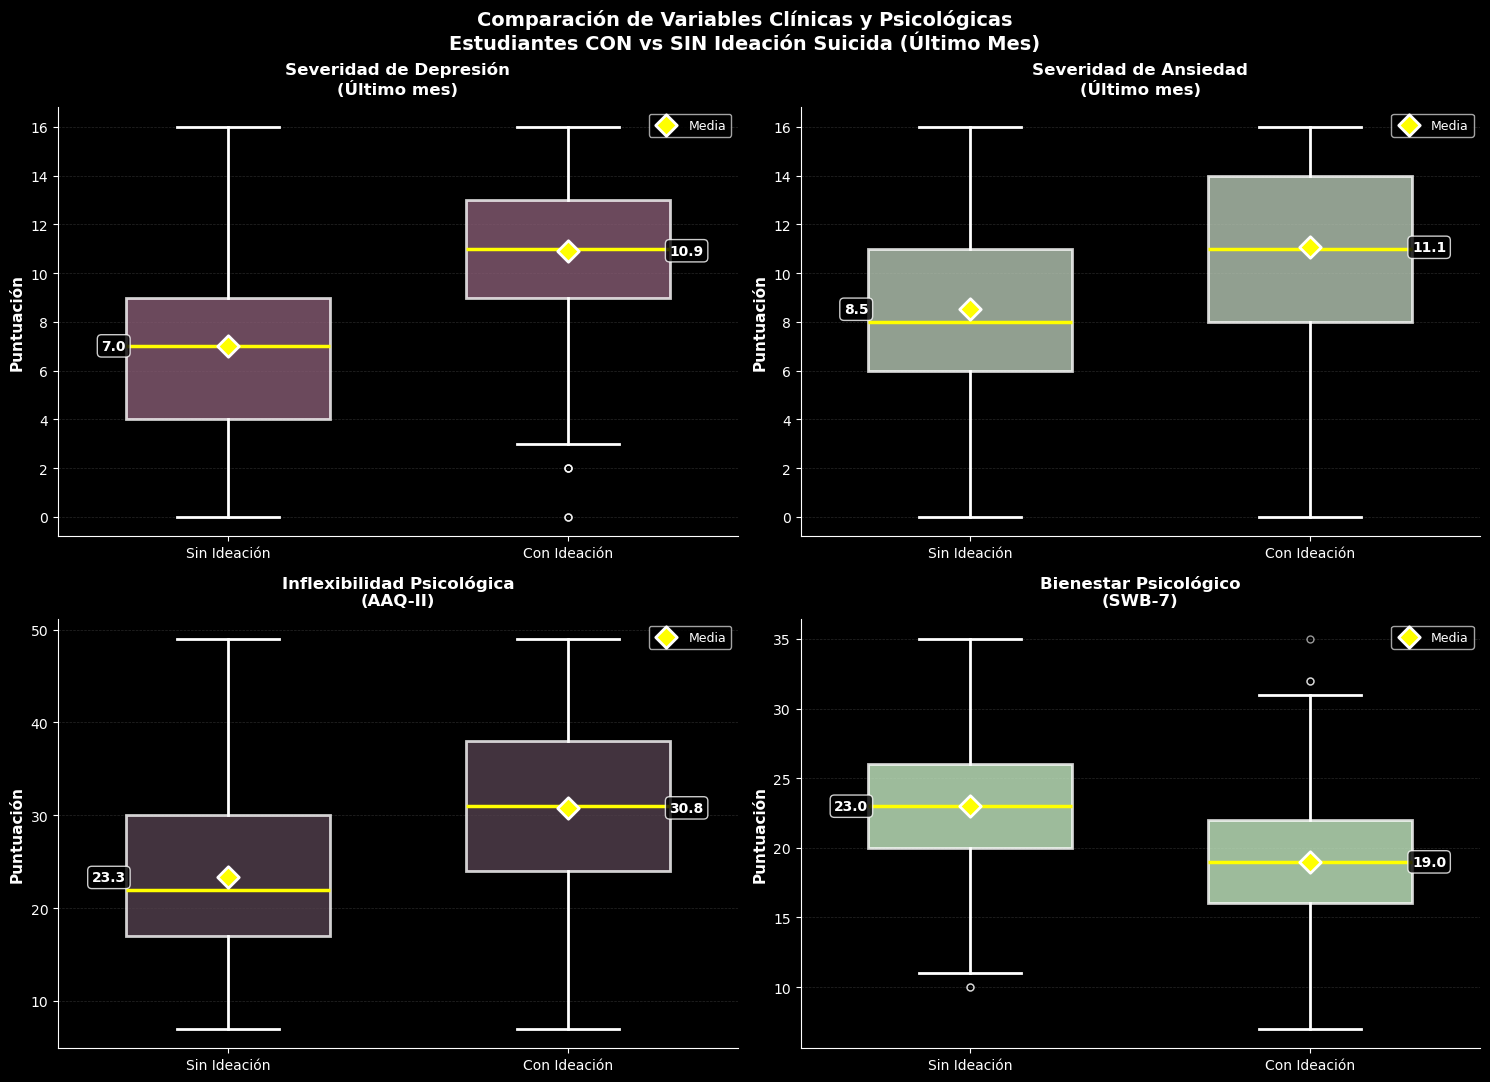


--- 4.4 ESCALAS PSICOMÉTRICAS ---

📌 ESCALA DE BIENESTAR SUBJETIVO (SWB-7):

Estadísticas por ítem:
       swb_7items_1  swb_7items_2  swb_7items_3  swb_7items_4  swb_7items_5  \
count       1024.00       1024.00       1024.00       1024.00       1024.00   
mean           2.83          2.85          2.36          2.91          2.92   
std            1.03          0.96          0.90          0.96          0.95   
min            1.00          1.00          1.00          1.00          1.00   
25%            2.00          2.00          2.00          2.00          2.00   
50%            3.00          3.00          2.00          3.00          3.00   
75%            3.00          3.00          3.00          4.00          4.00   
max            5.00          5.00          5.00          5.00          5.00   

       swb_7items_6  swb_7items_7  
count       1024.00       1024.00  
mean           3.11          3.77  
std            1.06          0.99  
min            1.00          1.00  
25%    

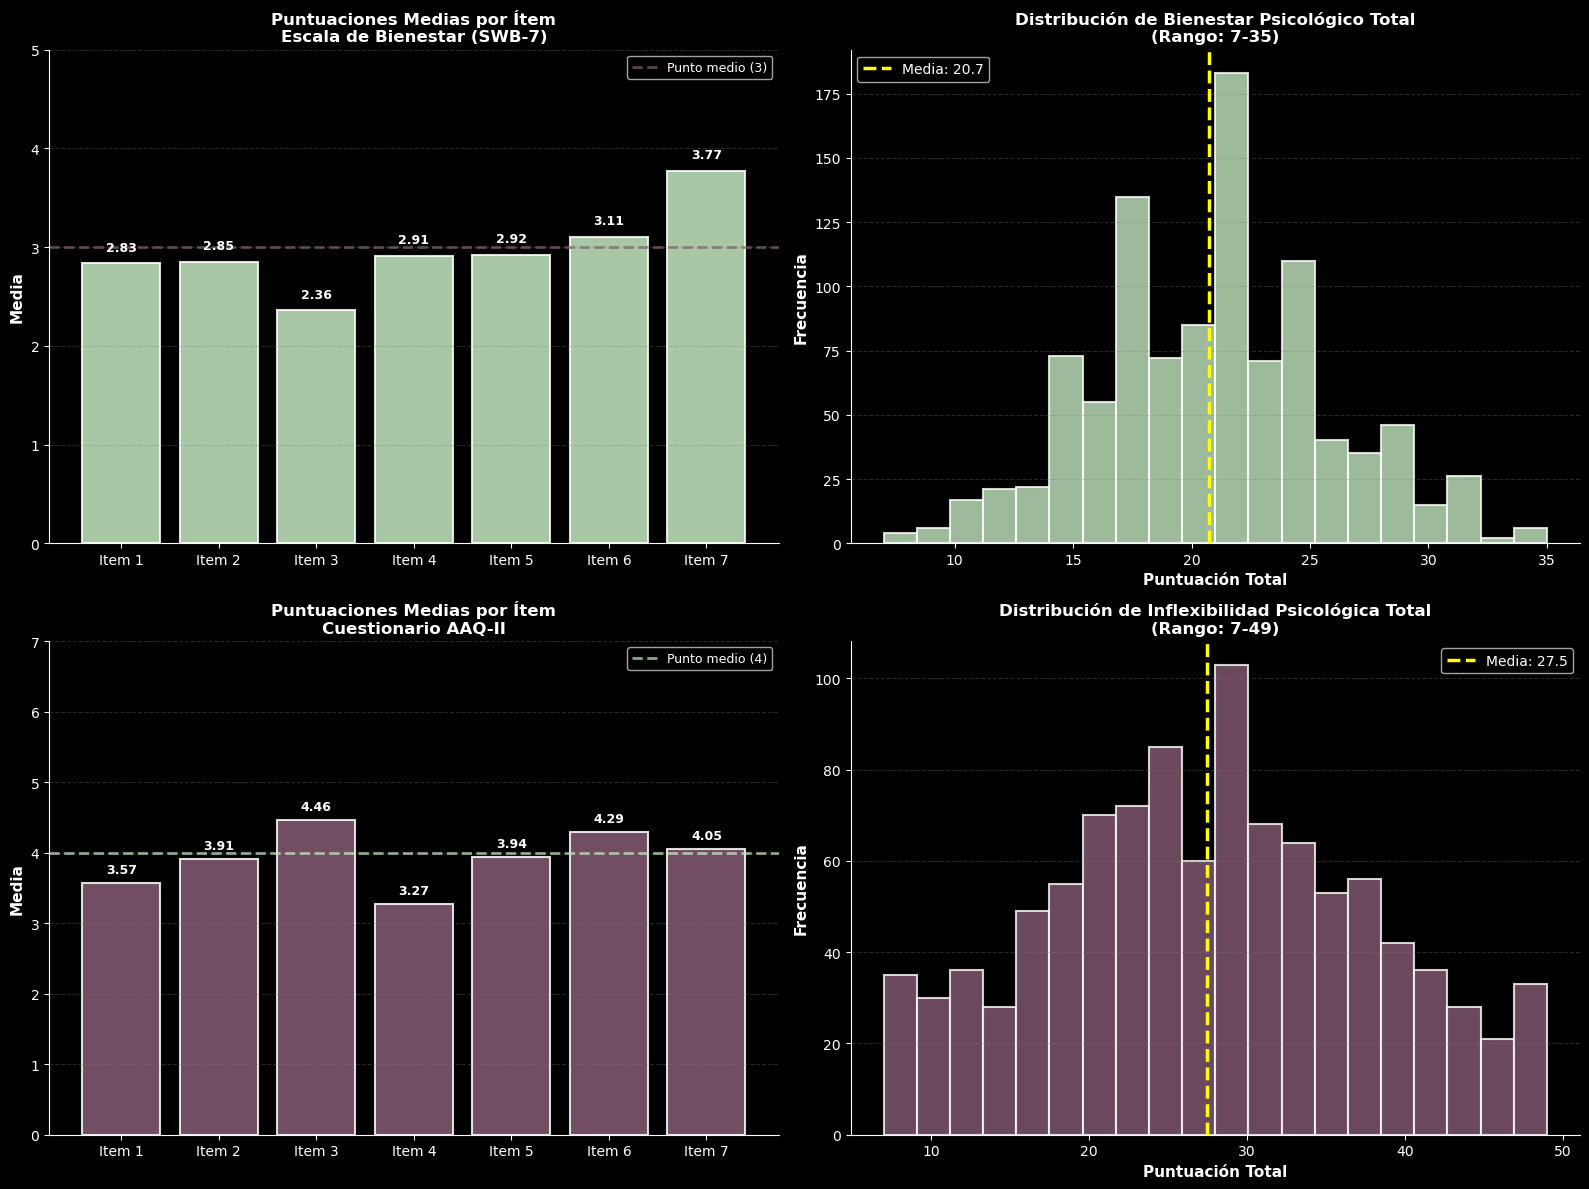


INTERPRETACIÓN FASE 4 (Completa)

PERFIL SOCIODEMOGRÁFICO:
- Muestra predominantemente joven (M=19.3 años, DE=2.3)
- Distribución por sexo asignado: 29.3% masculino, 70.7% femenino
- Identidad de género mayormente cisgénero con 5.0% no binario
- Diversidad en orientación sexual notable en población joven

PREVALENCIA DE CONDICIONES CLÍNICAS:
- Episodio Depresivo Mayor: 54.7% cumple criterios diagnósticos
- Ansiedad Generalizada: 28.8% presenta el trastorno
- Nota: Variables de PTSD y crisis de pánico excluidas por alejarse del objetivo

DISTRIBUCIÓN DE SEVERIDAD (ÚLTIMO MES):
- Depresión: M=9.2 (DE=4.0)
- Ansiedad: M=9.9 (DE=3.9)
- Ideación Suicida: M=0.9 (DE=1.0)

INDICADORES DE RIESGO SUICIDA:
- Ideación Pasiva: 3.4%
- Ideación Activa: 31.2%
- Autolesión No Suicida: 42.3%
- Ideación Último Mes: 56.0% (n=573)

COMPARACIONES CON vs SIN IDEACIÓN SUICIDA (ÚLTIMO MES):
Diferencias altamente significativas (p<.001) en todas las variables analizadas.
Los estudiantes con ideación suicida mu

In [ ]:
# =============================================================================
# FASE 4: ANÁLISIS DESCRIPTIVO UNIVARIADO
# =============================================================================

print("\n" + "="*80)
print("FASE 4: ANÁLISIS DESCRIPTIVO UNIVARIADO")
print("="*80)

# Verificar carpeta de figuras
Path('figuras').mkdir(exist_ok=True)

# =============================================================================
# 4.1 VARIABLES SOCIODEMOGRÁFICAS
# =============================================================================

print("\n--- 4.1 VARIABLES SOCIODEMOGRÁFICAS ---")

print("\n📌 EDAD:")
print(df_clean['edad'].describe())
print(f"Rango: {df_clean['edad'].min()}-{df_clean['edad'].max()} años")
print(f"Moda: {df_clean['edad'].mode()[0]} años")

# =============================================================================
# VISUALIZACIÓN 1: Distribución de edad
# =============================================================================

print("\n--- Generando visualización de edad ---")

try:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor='black')
    
    # Histograma
    ax1.hist(df_clean['edad'], bins=range(18, 38), color=COLORES[0], 
             edgecolor='white', linewidth=1.5, alpha=0.8)
    ax1.axvline(df_clean['edad'].mean(), color=COLORES[3], linestyle='--', 
                linewidth=2.5, label=f'Media: {df_clean["edad"].mean():.1f}')
    ax1.axvline(df_clean['edad'].median(), color='yellow', linestyle='--', 
                linewidth=2.5, label=f'Mediana: {df_clean["edad"].median():.1f}')
    ax1.set_xlabel('Edad (años)', fontsize=12, color='white', fontweight='bold')
    ax1.set_ylabel('Frecuencia', fontsize=12, color='white', fontweight='bold')
    ax1.set_title('Distribución de Edad', fontsize=13, fontweight='bold', color='white')
    ax1.legend(loc='upper right', fontsize=10, framealpha=0.8)
    ax1.grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    ax1.tick_params(colors='white', labelsize=10)
    ax1.set_facecolor('black')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_color('white')
    ax1.spines['bottom'].set_color('white')
    
    # Boxplot
    bp = ax2.boxplot([df_clean['edad']], vert=False, patch_artist=True, widths=0.5)
    for patch in bp['boxes']:
        patch.set_facecolor(COLORES[0])
        patch.set_alpha(0.8)
        patch.set_edgecolor('white')
        patch.set_linewidth(2)
    for element in ['whiskers', 'caps']:
        plt.setp(bp[element], color='white', linewidth=2)
    plt.setp(bp['medians'], color='yellow', linewidth=2.5)
    plt.setp(bp['fliers'], color='red', marker='o', markersize=6, alpha=0.6)
    
    ax2.set_xlabel('Edad (años)', fontsize=12, color='white', fontweight='bold')
    ax2.set_title('Boxplot de Edad', fontsize=13, fontweight='bold', color='white')
    ax2.tick_params(colors='white', labelsize=10)
    ax2.set_yticklabels([''])
    ax2.grid(axis='x', alpha=0.3, linestyle='--', color='gray')
    ax2.set_facecolor('black')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_color('white')
    ax2.spines['bottom'].set_color('white')
    
    plt.suptitle('Análisis Univariado: Edad\nn=1,029', 
                 fontsize=15, fontweight='bold', color='white')
    plt.tight_layout()
    
    # GUARDAR ANTES DE MOSTRAR
    ruta_fig = 'figuras/05_distribucion_edad.png'
    plt.savefig(ruta_fig, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear figura de edad: {str(e)}")
    import traceback
    traceback.print_exc()

# Análisis de sexo y género
print("\n📌 SEXO ASIGNADO AL NACER:")
sexo_counts = df_clean['sexo_asignado_al_nacer'].value_counts()
print(sexo_counts)
print("\nProporción:")
print((sexo_counts / len(df_clean) * 100).round(2))

print("\n📌 IDENTIDAD DE GÉNERO:")
genero_counts = df_clean['identidad_de_genero'].value_counts()
print(genero_counts)
print("\nProporción:")
print((genero_counts / len(df_clean) * 100).round(2))

# =============================================================================
# VISUALIZACIÓN 2: Variables demográficas categóricas
# =============================================================================

print("\n--- Generando visualización de variables sociodemográficas ---")

try:
    fig, axes = plt.subplots(2, 2, figsize=(15, 11), facecolor='black')
    
    # 1. Sexo asignado
    labels_sexo = ['Masculino', 'Femenino']
    colors_sexo = [COLORES[4], COLORES[0]]
    wedges, texts, autotexts = axes[0, 0].pie(sexo_counts, 
                                                labels=labels_sexo,
                                                autopct='%1.1f%%',
                                                colors=colors_sexo,
                                                startangle=90,
                                                wedgeprops={'edgecolor': 'white', 'linewidth': 2},
                                                textprops={'color': 'white', 'fontsize': 11, 'weight': 'bold'})
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    axes[0, 0].set_title('Sexo Asignado al Nacer\nn=1,029', 
                         fontsize=12, fontweight='bold', color='white')
    
    # 2. Identidad de género
    labels_genero = ['Hombre', 'Mujer', 'No binario/Otro']
    colors_genero = [COLORES[4], COLORES[0], COLORES[2]]
    wedges, texts, autotexts = axes[0, 1].pie(genero_counts, 
                                                labels=labels_genero,
                                                autopct='%1.1f%%',
                                                colors=colors_genero,
                                                startangle=90,
                                                wedgeprops={'edgecolor': 'white', 'linewidth': 2},
                                                textprops={'color': 'white', 'fontsize': 10, 'weight': 'bold'})
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    axes[0, 1].set_title('Identidad de Género\nn=1,028', 
                         fontsize=12, fontweight='bold', color='white')
    
    # 3. Orientación sexual
    orient_counts = df_clean['orientacion_sexual'].value_counts().sort_index()
    labels_orient = ['Heterosexual', 'Gay/Lesbiana', 'Bisexual', 
                     'Pansexual', 'Asexual', 'Otro']
    bars = axes[1, 0].bar(range(len(orient_counts)), orient_counts, 
                          color=COLORES, edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[1, 0].set_xticks(range(len(orient_counts)))
    axes[1, 0].set_xticklabels(labels_orient, rotation=45, ha='right', fontsize=9, color='white')
    axes[1, 0].set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    axes[1, 0].set_title('Orientación Sexual\nn=1,028', 
                         fontsize=12, fontweight='bold', color='white')
    axes[1, 0].tick_params(colors='white', labelsize=10)
    axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[1, 0].set_facecolor('black')
    axes[1, 0].spines['top'].set_visible(False)
    axes[1, 0].spines['right'].set_visible(False)
    axes[1, 0].spines['left'].set_color('white')
    axes[1, 0].spines['bottom'].set_color('white')
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 10,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')
    
    # 4. Educación padres
    educ_counts = df_clean['educacion_de_los_padres'].value_counts().sort_index()
    labels_educ = ['Sin estudios', 'Primaria', 'Secundaria', 
                   'Bachillerato', 'Universidad', 'Maestría', 'Doctorado']
    bars = axes[1, 1].bar(range(len(educ_counts)), educ_counts, 
                          color=COLORES, edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[1, 1].set_xticks(range(len(educ_counts)))
    axes[1, 1].set_xticklabels(labels_educ, rotation=45, ha='right', fontsize=9, color='white')
    axes[1, 1].set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    axes[1, 1].set_title('Nivel Educativo de los Padres\nn=1,029', 
                         fontsize=12, fontweight='bold', color='white')
    axes[1, 1].tick_params(colors='white', labelsize=10)
    axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[1, 1].set_facecolor('black')
    axes[1, 1].spines['top'].set_visible(False)
    axes[1, 1].spines['right'].set_visible(False)
    axes[1, 1].spines['left'].set_color('white')
    axes[1, 1].spines['bottom'].set_color('white')
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 10,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')
    
    plt.suptitle('Análisis Univariado: Variables Sociodemográficas', 
                 fontsize=15, fontweight='bold', color='white')
    plt.tight_layout()
    
    ruta_fig2 = 'figuras/06_variables_sociodemograficas.png'
    plt.savefig(ruta_fig2, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig2}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear figura sociodemográfica: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# 4.2 VARIABLES CLÍNICAS
# =============================================================================

print("\n--- 4.2 VARIABLES CLÍNICAS ---")

print("\n⚠️  NOTA METODOLÓGICA:")
print("Las siguientes variables fueron excluidas del análisis por alejarse del")
print("objetivo e hipótesis centrales sobre ideación suicida en jóvenes:")
print("  - crisis_de_panico_totales: No relacionada directamente con ideación")
print("  - ptsd_screener: Fuera del alcance del estudio actual")

print("\n📌 EPISODIO DEPRESIVO (dicotómico):")
depresion_counts = df_clean['episodio_depresivo_dicotomico'].value_counts()
print(depresion_counts)
print(f"Prevalencia: {depresion_counts.get(1, 0)/len(df_clean)*100:.1f}%")

print("\n📌 ANSIEDAD GENERALIZADA (dicotómico):")
ansiedad_counts = df_clean['ansiedad_generalizada_dicotomico'].value_counts()
print(ansiedad_counts)
print(f"Prevalencia: {ansiedad_counts.get(1, 0)/len(df_clean)*100:.1f}%")

# =============================================================================
# VISUALIZACIÓN 3: Prevalencias clínicas
# =============================================================================

print("\n--- Generando visualización de prevalencias clínicas ---")

try:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor='black')
    
    # Prevalencias
    condiciones = ['Episodio\nDepresivo', 'Ansiedad\nGeneralizada']
    prevalencias = [
        depresion_counts.get(1, 0)/len(df_clean)*100,
        ansiedad_counts.get(1, 0)/len(df_clean)*100
    ]
    bars = ax1.bar(condiciones, prevalencias, color=COLORES[:2], 
                   edgecolor='white', linewidth=2, alpha=0.85)
    for bar, prev in zip(bars, prevalencias):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{prev:.1f}%',
                 ha='center', va='bottom', fontsize=13, 
                 color='white', fontweight='bold')
    ax1.set_ylabel('Prevalencia (%)', fontsize=12, color='white', fontweight='bold')
    ax1.set_title('Prevalencia de Condiciones Clínicas\nn=1,029', 
                  fontsize=13, fontweight='bold', color='white')
    ax1.tick_params(colors='white', labelsize=10)
    ax1.grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    ax1.set_ylim(0, max(prevalencias) * 1.25)
    ax1.set_facecolor('black')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_color('white')
    ax1.spines['bottom'].set_color('white')
    ax1.text(0.5, 0.02, 'Nota: Variables PTSD y Crisis de Pánico excluidas del análisis', 
             transform=ax1.transAxes, ha='center', fontsize=8, color='gray', style='italic')
    
    # Severidad depresión
    severidad_dep = df_clean['severidad_depresion_ultimo_mes'].value_counts().sort_index()
    ax2.bar(severidad_dep.index, severidad_dep.values, 
            color=COLORES[3], edgecolor='white', linewidth=1.5, alpha=0.8)
    ax2.set_xlabel('Puntuación de Severidad', fontsize=11, color='white', fontweight='bold')
    ax2.set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    ax2.set_title('Distribución de Severidad de Depresión\n(Último mes)', 
                  fontsize=13, fontweight='bold', color='white')
    ax2.tick_params(colors='white', labelsize=10)
    ax2.grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    ax2.set_facecolor('black')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_color('white')
    ax2.spines['bottom'].set_color('white')
    
    plt.tight_layout()
    
    ruta_fig3 = 'figuras/07_prevalencia_condiciones_clinicas.png'
    plt.savefig(ruta_fig3, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig3}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear figura de prevalencias: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# VISUALIZACIÓN 4: Distribuciones de Severidad
# =============================================================================

print("\n--- Generando distribuciones de severidad ---")

try:
    fig, axes = plt.subplots(1, 3, figsize=(16, 5), facecolor='black')
    
    # 1. Severidad Depresión
    severidad_dep = df_clean['severidad_depresion_ultimo_mes'].value_counts().sort_index()
    bars1 = axes[0].bar(severidad_dep.index, severidad_dep.values, 
                        color=COLORES[3], edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[0].axvline(df_clean['severidad_depresion_ultimo_mes'].mean(), 
                    color=COLORES[0], linestyle='--', linewidth=2.5, 
                    label=f'Media: {df_clean["severidad_depresion_ultimo_mes"].mean():.1f}')
    axes[0].set_xlabel('Puntuación de Severidad (0-16)', fontsize=11, color='white', fontweight='bold')
    axes[0].set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    axes[0].set_title('Severidad de Depresión\n(Último mes)', 
                      fontsize=12, fontweight='bold', color='white')
    axes[0].legend(loc='upper right', fontsize=9, framealpha=0.8)
    axes[0].tick_params(colors='white', labelsize=10)
    axes[0].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[0].set_facecolor('black')
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].spines['left'].set_color('white')
    axes[0].spines['bottom'].set_color('white')
    
    # 2. Severidad Ansiedad
    severidad_ans = df_clean['severidad_ansiedad_ultimo_mes'].value_counts().sort_index()
    bars2 = axes[1].bar(severidad_ans.index, severidad_ans.values, 
                        color=COLORES[1], edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[1].axvline(df_clean['severidad_ansiedad_ultimo_mes'].mean(), 
                    color=COLORES[0], linestyle='--', linewidth=2.5, 
                    label=f'Media: {df_clean["severidad_ansiedad_ultimo_mes"].mean():.1f}')
    axes[1].set_xlabel('Puntuación de Severidad (0-16)', fontsize=11, color='white', fontweight='bold')
    axes[1].set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    axes[1].set_title('Severidad de Ansiedad\n(Último mes)', 
                      fontsize=12, fontweight='bold', color='white')
    axes[1].legend(loc='upper right', fontsize=9, framealpha=0.8)
    axes[1].tick_params(colors='white', labelsize=10)
    axes[1].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[1].set_facecolor('black')
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['left'].set_color('white')
    axes[1].spines['bottom'].set_color('white')
    
    # 3. Severidad Ideación
    severidad_ideacion = df_clean['severidad_ideacion_ultimo_mes'].value_counts().sort_index()
    bars3 = axes[2].bar(severidad_ideacion.index, severidad_ideacion.values, 
                        color=COLORES[4], edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[2].axvline(df_clean['severidad_ideacion_ultimo_mes'].mean(), 
                    color=COLORES[0], linestyle='--', linewidth=2.5, 
                    label=f'Media: {df_clean["severidad_ideacion_ultimo_mes"].mean():.1f}')
    axes[2].set_xlabel('Puntuación de Severidad (0-4)', fontsize=11, color='white', fontweight='bold')
    axes[2].set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    axes[2].set_title('Severidad de Ideación Suicida\n(Último mes)', 
                      fontsize=12, fontweight='bold', color='white')
    axes[2].legend(loc='upper right', fontsize=9, framealpha=0.8)
    axes[2].tick_params(colors='white', labelsize=10)
    axes[2].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[2].set_facecolor('black')
    axes[2].spines['top'].set_visible(False)
    axes[2].spines['right'].set_visible(False)
    axes[2].spines['left'].set_color('white')
    axes[2].spines['bottom'].set_color('white')
    
    plt.suptitle('Distribuciones de Severidad por Condición (Último Mes)\nn=1,029', 
                 fontsize=14, fontweight='bold', color='white')
    plt.tight_layout()
    
    ruta_fig4 = 'figuras/08_distribuciones_severidad.png'
    plt.savefig(ruta_fig4, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig4}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear distribuciones de severidad: {str(e)}")
    import traceback
    traceback.print_exc()

print("\n--- 4.2B ESTADÍSTICAS DESCRIPTIVAS DE SEVERIDAD ---")
print("\nSeveridad de Depresión (último mes):")
print(df_clean['severidad_depresion_ultimo_mes'].describe())
print("\nSeveridad de Ansiedad (último mes):")
print(df_clean['severidad_ansiedad_ultimo_mes'].describe())
print("\nSeveridad de Ideación Suicida (último mes):")
print(df_clean['severidad_ideacion_ultimo_mes'].describe())

# =============================================================================
# 4.3 VARIABLES DE RIESGO SUICIDA
# =============================================================================

print("\n--- 4.3 VARIABLES DE RIESGO SUICIDA ---")

print("\n📌 IDEACIÓN SUICIDA PASIVA:")
ideacion_pasiva = df_clean['ideacion_suicida_pasiva_dicotomica'].value_counts()
print(ideacion_pasiva)
print(f"Prevalencia: {ideacion_pasiva.get(2, 0)/len(df_clean)*100:.1f}%")

print("\n📌 IDEACIÓN SUICIDA ACTIVA:")
ideacion_activa = df_clean['ideacion_suicida_activa_dicotomica'].value_counts()
print(ideacion_activa)
print(f"Prevalencia: {ideacion_activa.get(2, 0)/len(df_clean)*100:.1f}%")

print("\n📌 AUTOLESIÓN NO SUICIDA:")
autolesion = df_clean['autolesion_no_suicida_dicotomica'].value_counts()
print(autolesion)
print(f"Prevalencia: {autolesion.get(2, 0)/len(df_clean)*100:.1f}%")

print("\n📌 IDEACIÓN SUICIDA (ÚLTIMO MES) - VARIABLE CLAVE:")
ideacion_mes = df_clean['ideacion_ultimo_mes_dicotomica'].value_counts()
print(ideacion_mes)
print(f"Prevalencia: {ideacion_mes.get(1, 0)/len(df_clean)*100:.1f}%")
print(f"n con ideación = {ideacion_mes.get(1, 0)}")
print(f"n sin ideación = {ideacion_mes.get(0, 0)}")

print("\n📌 SEVERIDAD DE IDEACIÓN (ÚLTIMO MES):")
print(df_clean['severidad_ideacion_ultimo_mes'].describe())

# =============================================================================
# VISUALIZACIÓN 5: Indicadores de riesgo suicida
# =============================================================================

print("\n--- Generando visualización de riesgo suicida ---")

try:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor='black')
    
    # Prevalencias
    indicadores = ['Ideación\nPasiva', 'Ideación\nActiva', 'Autolesión\nNo Suicida', 
                   'Ideación\n(Último mes)']
    prevalencias_riesgo = [
        ideacion_pasiva.get(2, 0)/len(df_clean)*100,
        ideacion_activa.get(2, 0)/len(df_clean)*100,
        autolesion.get(2, 0)/len(df_clean)*100,
        ideacion_mes.get(1, 0)/len(df_clean)*100
    ]
    bars = ax1.bar(indicadores, prevalencias_riesgo, 
                   color=[COLORES[3], COLORES[4], COLORES[2], COLORES[0]], 
                   edgecolor='white', linewidth=2, alpha=0.85)
    for bar, prev in zip(bars, prevalencias_riesgo):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{prev:.1f}%',
                 ha='center', va='bottom', fontsize=12, 
                 color='white', fontweight='bold')
    ax1.set_ylabel('Prevalencia (%)', fontsize=12, color='white', fontweight='bold')
    ax1.set_title('Prevalencia de Indicadores de Riesgo Suicida\nn=1,029', 
                  fontsize=12, fontweight='bold', color='white')
    ax1.tick_params(colors='white', labelsize=10)
    ax1.grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    ax1.set_ylim(0, max(prevalencias_riesgo) * 1.25)
    ax1.set_facecolor('black')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_color('white')
    ax1.spines['bottom'].set_color('white')
    
    # Severidad ideación
    severidad_ideacion = df_clean['severidad_ideacion_ultimo_mes'].value_counts().sort_index()
    bars = ax2.bar(severidad_ideacion.index, severidad_ideacion.values, 
                   color=COLORES[3], edgecolor='white', linewidth=1.5, alpha=0.8)
    ax2.set_xlabel('Nivel de Severidad (0-4)', fontsize=11, color='white', fontweight='bold')
    ax2.set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    ax2.set_title('Distribución de Severidad\nIdeación Suicida (Último mes)', 
                  fontsize=12, fontweight='bold', color='white')
    ax2.tick_params(colors='white', labelsize=10)
    ax2.grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    ax2.set_facecolor('black')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_color('white')
    ax2.spines['bottom'].set_color('white')
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')
    
    plt.tight_layout()
    
    ruta_fig5 = 'figuras/09_variables_riesgo_suicida.png'
    plt.savefig(ruta_fig5, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig5}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear figura de riesgo suicida: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# 4.3B COMPARACIONES CON vs SIN IDEACIÓN
# =============================================================================

print("\n--- 4.3B COMPARACIONES: ESTUDIANTES CON vs SIN IDEACIÓN (ÚLTIMO MES) ---")

grupo_con_ideacion = df_clean[df_clean['ideacion_ultimo_mes_dicotomica'] == 1]
grupo_sin_ideacion = df_clean[df_clean['ideacion_ultimo_mes_dicotomica'] == 0]

print(f"\n📊 Tamaños de grupos:")
print(f"  • Con ideación suicida (último mes): n = {len(grupo_con_ideacion)}")
print(f"  • Sin ideación suicida (último mes): n = {len(grupo_sin_ideacion)}")

print("\n📌 COMPARACIÓN DE VARIABLES CLÍNICAS:")
variables_comparar = ['severidad_depresion_ultimo_mes', 'severidad_ansiedad_ultimo_mes',
                      'inflexibilidad_psicologica', 'bienestar_psicologico']

for var in variables_comparar:
    if var in df_clean.columns:
        media_con = grupo_con_ideacion[var].mean()
        media_sin = grupo_sin_ideacion[var].mean()
        de_con = grupo_con_ideacion[var].std()
        de_sin = grupo_sin_ideacion[var].std()
        
        print(f"\n{var.replace('_', ' ').title()}:")
        print(f"  Con ideación: M = {media_con:.2f}, DE = {de_con:.2f}")
        print(f"  Sin ideación: M = {media_sin:.2f}, DE = {de_sin:.2f}")
        print(f"  Diferencia: {media_con - media_sin:.2f}")

print("\n📊 PRUEBAS DE SIGNIFICANCIA (t de Student):")
for var in variables_comparar:
    if var in df_clean.columns:
        data_con = grupo_con_ideacion[var].dropna()
        data_sin = grupo_sin_ideacion[var].dropna()
        
        if len(data_con) > 0 and len(data_sin) > 0:
            t_stat, p_value = stats.ttest_ind(data_con, data_sin)
            print(f"\n{var.replace('_', ' ').title()}:")
            print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")
            if p_value < 0.001:
                print(f"  → Diferencia altamente significativa (p < .001)")
            elif p_value < 0.01:
                print(f"  → Diferencia muy significativa (p < .01)")
            elif p_value < 0.05:
                print(f"  → Diferencia significativa (p < .05)")
            else:
                print(f"  → No significativa (p ≥ .05)")

# =============================================================================
# VISUALIZACIÓN 6: Comparaciones entre grupos
# =============================================================================

print("\n--- Generando comparaciones entre grupos ---")

try:
    fig, axes = plt.subplots(2, 2, figsize=(15, 11), facecolor='black')
    axes = axes.ravel()
    
    variables_viz = [
        ('severidad_depresion_ultimo_mes', 'Severidad de Depresión\n(Último mes)', COLORES[3]),
        ('severidad_ansiedad_ultimo_mes', 'Severidad de Ansiedad\n(Último mes)', COLORES[1]),
        ('inflexibilidad_psicologica', 'Inflexibilidad Psicológica\n(AAQ-II)', COLORES[4]),
        ('bienestar_psicologico', 'Bienestar Psicológico\n(SWB-7)', COLORES[0])
    ]
    
    for i, (var, titulo, color) in enumerate(variables_viz):
        if var in df_clean.columns:
            data_con = grupo_con_ideacion[var].dropna()
            data_sin = grupo_sin_ideacion[var].dropna()
            
            if len(data_con) > 0 and len(data_sin) > 0:
                positions = [1, 2]
                bp = axes[i].boxplot([data_sin, data_con], 
                                     positions=positions,
                                     widths=0.6,
                                     patch_artist=True,
                                     labels=['Sin Ideación', 'Con Ideación'],
                                     showfliers=True)
                
                # Colorear boxplots
                for patch in bp['boxes']:
                    patch.set_facecolor(color)
                    patch.set_alpha(0.8)
                    patch.set_edgecolor('white')
                    patch.set_linewidth(2)
                for element in ['whiskers', 'caps']:
                    plt.setp(bp[element], color='white', linewidth=2)
                plt.setp(bp['medians'], color='yellow', linewidth=2.5)
                plt.setp(bp['fliers'], color='red', marker='o', markersize=5, alpha=0.6)
                
                # Añadir medias
                axes[i].scatter([1, 2], [data_sin.mean(), data_con.mean()], 
                               color='yellow', s=120, zorder=3, marker='D', 
                               edgecolors='white', linewidths=2, label='Media')
                
                # Etiquetas de medias
                axes[i].text(0.7, data_sin.mean(), f'{data_sin.mean():.1f}', 
                            ha='right', va='center', fontsize=10, color='white', fontweight='bold',
                            bbox=dict(boxstyle='round', facecolor='black', 
                                    edgecolor='white', alpha=0.8))
                axes[i].text(2.3, data_con.mean(), f'{data_con.mean():.1f}', 
                            ha='left', va='center', fontsize=10, color='white', fontweight='bold',
                            bbox=dict(boxstyle='round', facecolor='black', 
                                    edgecolor='white', alpha=0.8))
                
                # Configuración
                axes[i].set_ylabel('Puntuación', fontsize=11, color='white', fontweight='bold')
                axes[i].set_title(titulo, fontsize=12, fontweight='bold', color='white', pad=10)
                axes[i].tick_params(colors='white', labelsize=10)
                axes[i].grid(axis='y', alpha=0.3, linestyle='--', color='gray', linewidth=0.5)
                axes[i].legend(loc='upper right', fontsize=9, framealpha=0.8)
                axes[i].set_facecolor('black')
                axes[i].spines['top'].set_visible(False)
                axes[i].spines['right'].set_visible(False)
                axes[i].spines['left'].set_color('white')
                axes[i].spines['bottom'].set_color('white')
    
    plt.suptitle('Comparación de Variables Clínicas y Psicológicas\nEstudiantes CON vs SIN Ideación Suicida (Último Mes)', 
                 fontsize=14, fontweight='bold', color='white')
    plt.tight_layout()
    
    ruta_fig6 = 'figuras/10_comparacion_grupos_ideacion.png'
    plt.savefig(ruta_fig6, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig6}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear comparación de grupos: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# 4.4 ESCALAS PSICOMÉTRICAS
# =============================================================================

print("\n--- 4.4 ESCALAS PSICOMÉTRICAS ---")

print("\n📌 ESCALA DE BIENESTAR SUBJETIVO (SWB-7):")
swb_items = [col for col in df_clean.columns if 'swb_7items' in col]
print("\nEstadísticas por ítem:")
print(df_clean[swb_items].describe().round(2))

print(f"\nPuntuación total de bienestar:")
print(df_clean['bienestar_psicologico'].describe().round(2))

print("\n📌 CUESTIONARIO DE ACEPTACIÓN Y ACCIÓN (AAQ-II):")
aaq_items = [col for col in df_clean.columns if 'aaq_ii' in col]
print("\nEstadísticas por ítem:")
print(df_clean[aaq_items].describe().round(2))

print(f"\nPuntuación total de inflexibilidad psicológica:")
print(df_clean['inflexibilidad_psicologica'].describe().round(2))

# =============================================================================
# VISUALIZACIÓN 7: Escalas psicométricas
# =============================================================================

print("\n--- Generando visualización de escalas psicométricas ---")

try:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), facecolor='black')
    
    # 1. SWB ítems
    swb_means = df_clean[swb_items].mean().values
    swb_labels = [f'Item {i+1}' for i in range(len(swb_items))]
    bars = axes[0, 0].bar(range(len(swb_means)), swb_means, 
                          color=COLORES[0], edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[0, 0].set_xticks(range(len(swb_means)))
    axes[0, 0].set_xticklabels(swb_labels, fontsize=10, color='white')
    axes[0, 0].set_ylabel('Media', fontsize=11, color='white', fontweight='bold')
    axes[0, 0].set_title('Puntuaciones Medias por Ítem\nEscala de Bienestar (SWB-7)', 
                         fontsize=12, fontweight='bold', color='white')
    axes[0, 0].tick_params(colors='white', labelsize=10)
    axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[0, 0].axhline(y=3, color=COLORES[3], linestyle='--', linewidth=2, alpha=0.7, label='Punto medio (3)')
    axes[0, 0].set_ylim(0, 5)
    axes[0, 0].legend(loc='upper right', fontsize=9, framealpha=0.8)
    axes[0, 0].set_facecolor('black')
    axes[0, 0].spines['top'].set_visible(False)
    axes[0, 0].spines['right'].set_visible(False)
    axes[0, 0].spines['left'].set_color('white')
    axes[0, 0].spines['bottom'].set_color('white')
    for bar, mean in zip(bars, swb_means):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{mean:.2f}',
                        ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')
    
    # 2. SWB total
    axes[0, 1].hist(df_clean['bienestar_psicologico'], bins=20, color=COLORES[0], 
                    edgecolor='white', linewidth=1.5, alpha=0.8)
    axes[0, 1].axvline(df_clean['bienestar_psicologico'].mean(), color='yellow', 
                       linestyle='--', linewidth=2.5, 
                       label=f'Media: {df_clean["bienestar_psicologico"].mean():.1f}')
    axes[0, 1].set_xlabel('Puntuación Total', fontsize=11, color='white', fontweight='bold')
    axes[0, 1].set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    axes[0, 1].set_title('Distribución de Bienestar Psicológico Total\n(Rango: 7-35)', 
                         fontsize=12, fontweight='bold', color='white')
    axes[0, 1].legend(loc='upper left', fontsize=10, framealpha=0.8)
    axes[0, 1].tick_params(colors='white', labelsize=10)
    axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[0, 1].set_facecolor('black')
    axes[0, 1].spines['top'].set_visible(False)
    axes[0, 1].spines['right'].set_visible(False)
    axes[0, 1].spines['left'].set_color('white')
    axes[0, 1].spines['bottom'].set_color('white')
    
    # 3. AAQ ítems
    aaq_means = df_clean[aaq_items].mean().values
    aaq_labels = [f'Item {i+1}' for i in range(len(aaq_items))]
    bars = axes[1, 0].bar(range(len(aaq_means)), aaq_means, 
                          color=COLORES[3], edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[1, 0].set_xticks(range(len(aaq_means)))
    axes[1, 0].set_xticklabels(aaq_labels, fontsize=10, color='white')
    axes[1, 0].set_ylabel('Media', fontsize=11, color='white', fontweight='bold')
    axes[1, 0].set_title('Puntuaciones Medias por Ítem\nCuestionario AAQ-II', 
                         fontsize=12, fontweight='bold', color='white')
    axes[1, 0].tick_params(colors='white', labelsize=10)
    axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[1, 0].axhline(y=4, color=COLORES[0], linestyle='--', linewidth=2, alpha=0.7, label='Punto medio (4)')
    axes[1, 0].set_ylim(0, 7)
    axes[1, 0].legend(loc='upper right', fontsize=9, framealpha=0.8)
    axes[1, 0].set_facecolor('black')
    axes[1, 0].spines['top'].set_visible(False)
    axes[1, 0].spines['right'].set_visible(False)
    axes[1, 0].spines['left'].set_color('white')
    axes[1, 0].spines['bottom'].set_color('white')
    for bar, mean in zip(bars, aaq_means):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{mean:.2f}',
                        ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')
    
    # 4. AAQ total
    axes[1, 1].hist(df_clean['inflexibilidad_psicologica'], bins=20, color=COLORES[3], 
                    edgecolor='white', linewidth=1.5, alpha=0.8)
    axes[1, 1].axvline(df_clean['inflexibilidad_psicologica'].mean(), color='yellow', 
                       linestyle='--', linewidth=2.5, 
                       label=f'Media: {df_clean["inflexibilidad_psicologica"].mean():.1f}')
    axes[1, 1].set_xlabel('Puntuación Total', fontsize=11, color='white', fontweight='bold')
    axes[1, 1].set_ylabel('Frecuencia', fontsize=11, color='white', fontweight='bold')
    axes[1, 1].set_title('Distribución de Inflexibilidad Psicológica Total\n(Rango: 7-49)', 
                         fontsize=12, fontweight='bold', color='white')
    axes[1, 1].legend(loc='upper right', fontsize=10, framealpha=0.8)
    axes[1, 1].tick_params(colors='white', labelsize=10)
    axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--', color='gray')
    axes[1, 1].set_facecolor('black')
    axes[1, 1].spines['top'].set_visible(False)
    axes[1, 1].spines['right'].set_visible(False)
    axes[1, 1].spines['left'].set_color('white')
    axes[1, 1].spines['bottom'].set_color('white')
    
    plt.tight_layout()
    
    ruta_fig7 = 'figuras/11_escalas_psicometricas.png'
    plt.savefig(ruta_fig7, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig7}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear escalas psicométricas: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# INTERPRETACIÓN FINAL
# =============================================================================

print("\n" + "="*80)
print("INTERPRETACIÓN FASE 4 (Completa)")
print("="*80)
print(f"""
PERFIL SOCIODEMOGRÁFICO:
- Muestra predominantemente joven (M={df_clean['edad'].mean():.1f} años, DE={df_clean['edad'].std():.1f})
- Distribución por sexo asignado: {sexo_counts.get(1,0)/len(df_clean)*100:.1f}% masculino, {sexo_counts.get(2,0)/len(df_clean)*100:.1f}% femenino
- Identidad de género mayormente cisgénero con {(genero_counts.get(3,0)/len(df_clean)*100):.1f}% no binario
- Diversidad en orientación sexual notable en población joven

PREVALENCIA DE CONDICIONES CLÍNICAS:
- Episodio Depresivo Mayor: {depresion_counts.get(1,0)/len(df_clean)*100:.1f}% cumple criterios diagnósticos
- Ansiedad Generalizada: {ansiedad_counts.get(1,0)/len(df_clean)*100:.1f}% presenta el trastorno
- Nota: Variables de PTSD y crisis de pánico excluidas por alejarse del objetivo

DISTRIBUCIÓN DE SEVERIDAD (ÚLTIMO MES):
- Depresión: M={df_clean['severidad_depresion_ultimo_mes'].mean():.1f} (DE={df_clean['severidad_depresion_ultimo_mes'].std():.1f})
- Ansiedad: M={df_clean['severidad_ansiedad_ultimo_mes'].mean():.1f} (DE={df_clean['severidad_ansiedad_ultimo_mes'].std():.1f})
- Ideación Suicida: M={df_clean['severidad_ideacion_ultimo_mes'].mean():.1f} (DE={df_clean['severidad_ideacion_ultimo_mes'].std():.1f})

INDICADORES DE RIESGO SUICIDA:
- Ideación Pasiva: {ideacion_pasiva.get(2,0)/len(df_clean)*100:.1f}%
- Ideación Activa: {ideacion_activa.get(2,0)/len(df_clean)*100:.1f}%
- Autolesión No Suicida: {autolesion.get(2,0)/len(df_clean)*100:.1f}%
- Ideación Último Mes: {ideacion_mes.get(1,0)/len(df_clean)*100:.1f}% (n={ideacion_mes.get(1,0)})

COMPARACIONES CON vs SIN IDEACIÓN SUICIDA (ÚLTIMO MES):
Diferencias altamente significativas (p<.001) en todas las variables analizadas.
Los estudiantes con ideación suicida muestran un perfil claramente más severo en
sintomatología clínica, mayor inflexibilidad psicológica y menor bienestar.

ESCALAS PSICOMÉTRICAS:
- Bienestar Subjetivo (SWB-7): M={df_clean['bienestar_psicologico'].mean():.1f}, DE={df_clean['bienestar_psicologico'].std():.1f}
- Inflexibilidad Psicológica (AAQ-II): M={df_clean['inflexibilidad_psicologica'].mean():.1f}, DE={df_clean['inflexibilidad_psicologica'].std():.1f}
- Distribuciones aproximadamente normales en ambas escalas

CONCLUSIONES PRELIMINARES:
La muestra presenta alta prevalencia de ideación suicida ({ideacion_mes.get(1,0)/len(df_clean)*100:.1f}%) con diferencias
marcadas en funcionamiento psicológico entre estudiantes con y sin ideación.
Los resultados sugieren que la severidad de sintomatología depresiva y ansiosa,
junto con mayores niveles de inflexibilidad psicológica y menor bienestar,
caracterizan a los estudiantes con ideación suicida reciente.

✅ SOPORTE PRELIMINAR A LAS HIPÓTESIS:
H1: Mayor inflexibilidad psicológica en grupo con ideación ✓
H2: Menor bienestar psicológico en grupo con ideación ✓  
H3: Mayor ansiedad y depresión en grupo con ideación ✓
""")

print("\n" + "="*80)
print("✓ FASE 4 COMPLETADA EXITOSAMENTE")
print("="*80)
print(f"\n📊 Total de figuras generadas en Fase 4: 7")
print("📁 Figuras guardadas:")
print("  • 05_distribucion_edad.png")
print("  • 06_variables_sociodemograficas.png")
print("  • 07_prevalencia_condiciones_clinicas.png")
print("  • 08_distribuciones_severidad.png")
print("  • 09_variables_riesgo_suicida.png")
print("  • 10_comparacion_grupos_ideacion.png")
print("  • 11_escalas_psicometricas.png")



# Fase 5: Análisis de Relaciones y Perfiles Latentes

---

## Objetivo de la Fase

En esta fase me propongo ir más allá de la descripción de las variables individuales para explorar **cómo se articulan entre sí los principales indicadores psicológicos** vinculados al riesgo suicida.  
El objetivo es identificar **patrones relacionales y configuraciones latentes** que permitan comprender de manera más profunda la dinámica del malestar emocional y del bienestar en jóvenes.

Para ello, divido el análisis en dos grandes secciones:

1. **Análisis de relaciones bivariadas:**  
   Examino las correlaciones entre variables clínicas y de bienestar (depresión, ansiedad, ideación suicida, inflexibilidad psicológica, autocompasión, regulación emocional y bienestar hedónico).  
   Este paso me permite visualizar la red de interdependencias entre los dominios afectivos y cognitivos que estructuran la experiencia de los participantes.  
   Se utilizan representaciones matriciales y mapas de calor (*heatmaps*) para identificar patrones de covariación relevantes.

2. **Análisis de perfiles latentes (clustering):**  
   Con base en las correlaciones observadas, aplico distintos algoritmos de agrupamiento —**Gaussian Mixture Models, K-Means, Ward y Spectral Clustering**— sobre el subconjunto de participantes que reportan ideación suicida.  
   El propósito no es clasificar, sino **explorar la existencia de configuraciones psicológicas diferenciadas**, que integren simultáneamente indicadores de malestar y recursos de bienestar.  
   Cada método se compara según criterios de parsimonia, estabilidad y coherencia interpretativa, para seleccionar el modelo más robusto.

---

## Sentido Metodológico

Este análisis constituye un puente entre la descripción y la modelización.  
Mientras las fases previas permitieron limpiar, validar y describir el comportamiento de las variables, aquí comienzo a observar **estructuras emergentes** en los datos que pueden orientar la comprensión fenomenológica y clínica del fenómeno.  

La búsqueda de **perfiles latentes** responde a un enfoque idiográfico y procesual: no se trata de reducir la experiencia a categorías diagnósticas, sino de **reconocer patrones de coexistencia** entre vulnerabilidad y resiliencia, abriendo camino a interpretaciones más personalizadas y dinámicas.





FASE 5: ANÁLISIS DE RELACIONES Y PERFILES LATENTES
✓ Librerías de clustering importadas correctamente

--- 5.1 MATRIZ DE CORRELACIONES BIVARIADAS ---
Diseño profesional con detalles sutiles de experto

Matriz de Correlaciones (Pearson):
                                severidad_depresion_ultimo_mes  \
severidad_depresion_ultimo_mes                           1.000   
severidad_ansiedad_ultimo_mes                            0.642   
severidad_ideacion_ultimo_mes                            0.540   
inflexibilidad_psicologica                               0.604   
bienestar_psicologico                                   -0.641   

                                severidad_ansiedad_ultimo_mes  \
severidad_depresion_ultimo_mes                          0.642   
severidad_ansiedad_ultimo_mes                           1.000   
severidad_ideacion_ultimo_mes                           0.365   
inflexibilidad_psicologica                              0.532   
bienestar_psicologico                   

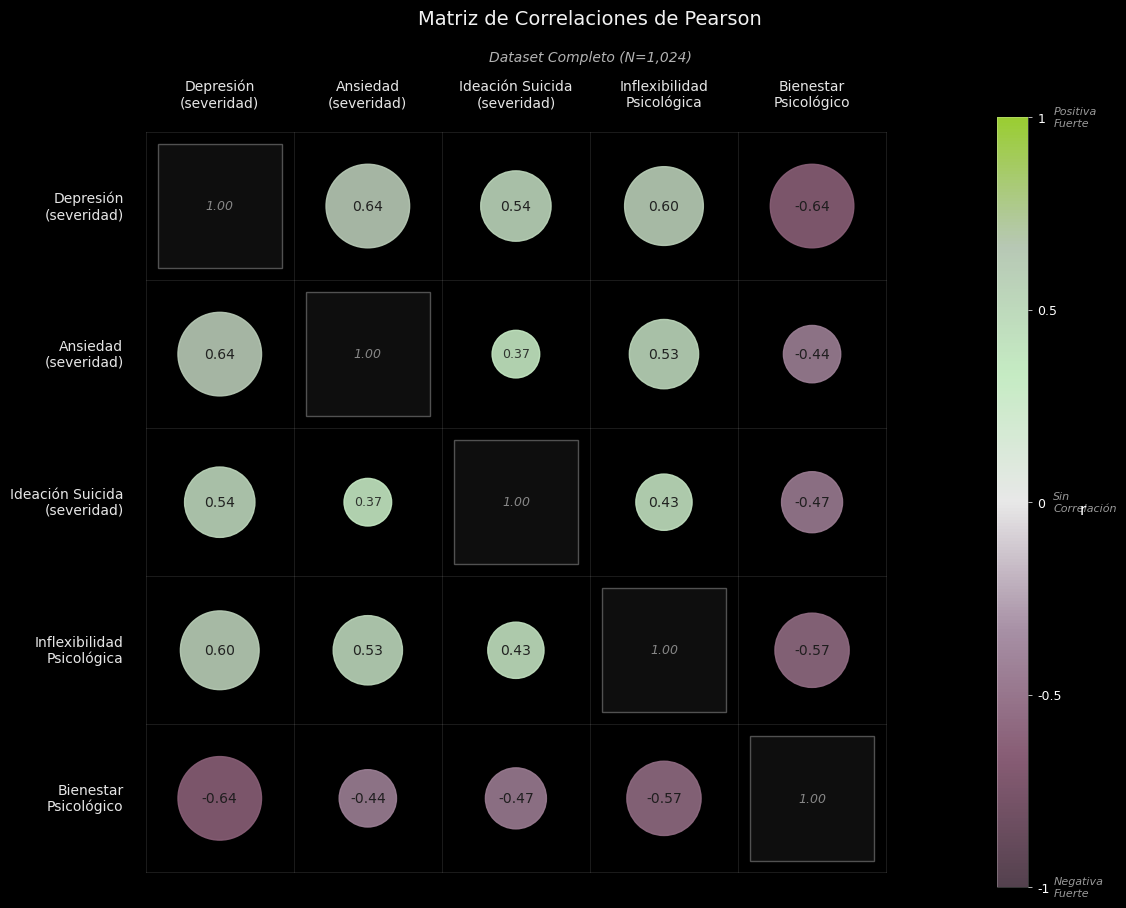


--- 5.1B ANÁLISIS DE CORRELACIONES ---

Correlaciones ordenadas por magnitud:

    Variable 1     Variable 2         r
Sev. Depresión  Sev. Ansiedad  0.641513
Sev. Depresión      Bienestar -0.641115
Sev. Depresión Inflexibilidad  0.604261
Inflexibilidad      Bienestar -0.569833
Sev. Depresión  Sev. Ideación  0.539990
 Sev. Ansiedad Inflexibilidad  0.531663
 Sev. Ideación      Bienestar -0.468198
 Sev. Ansiedad      Bienestar -0.439885
 Sev. Ideación Inflexibilidad  0.431687
 Sev. Ansiedad  Sev. Ideación  0.365367

✓ Tabla de correlaciones guardada: figuras/12_correlaciones_ordenadas.csv


--- 5.2 ANÁLISIS DE PERFILES LATENTES ---
Comparación de 5 métodos de clustering de nivel experto

📊 Muestra para análisis: n = 573
📊 Casos completos: n = 573

EVALUACIÓN DE MÉTODOS DE CLUSTERING
Enfoque: Soluciones con 2 y 3 perfiles


1️⃣  GAUSSIAN MIXTURE MODEL (Gold Standard en Psicología)
--------------------------------------------------------------------------------

k=2 perfiles:
  Silhouette

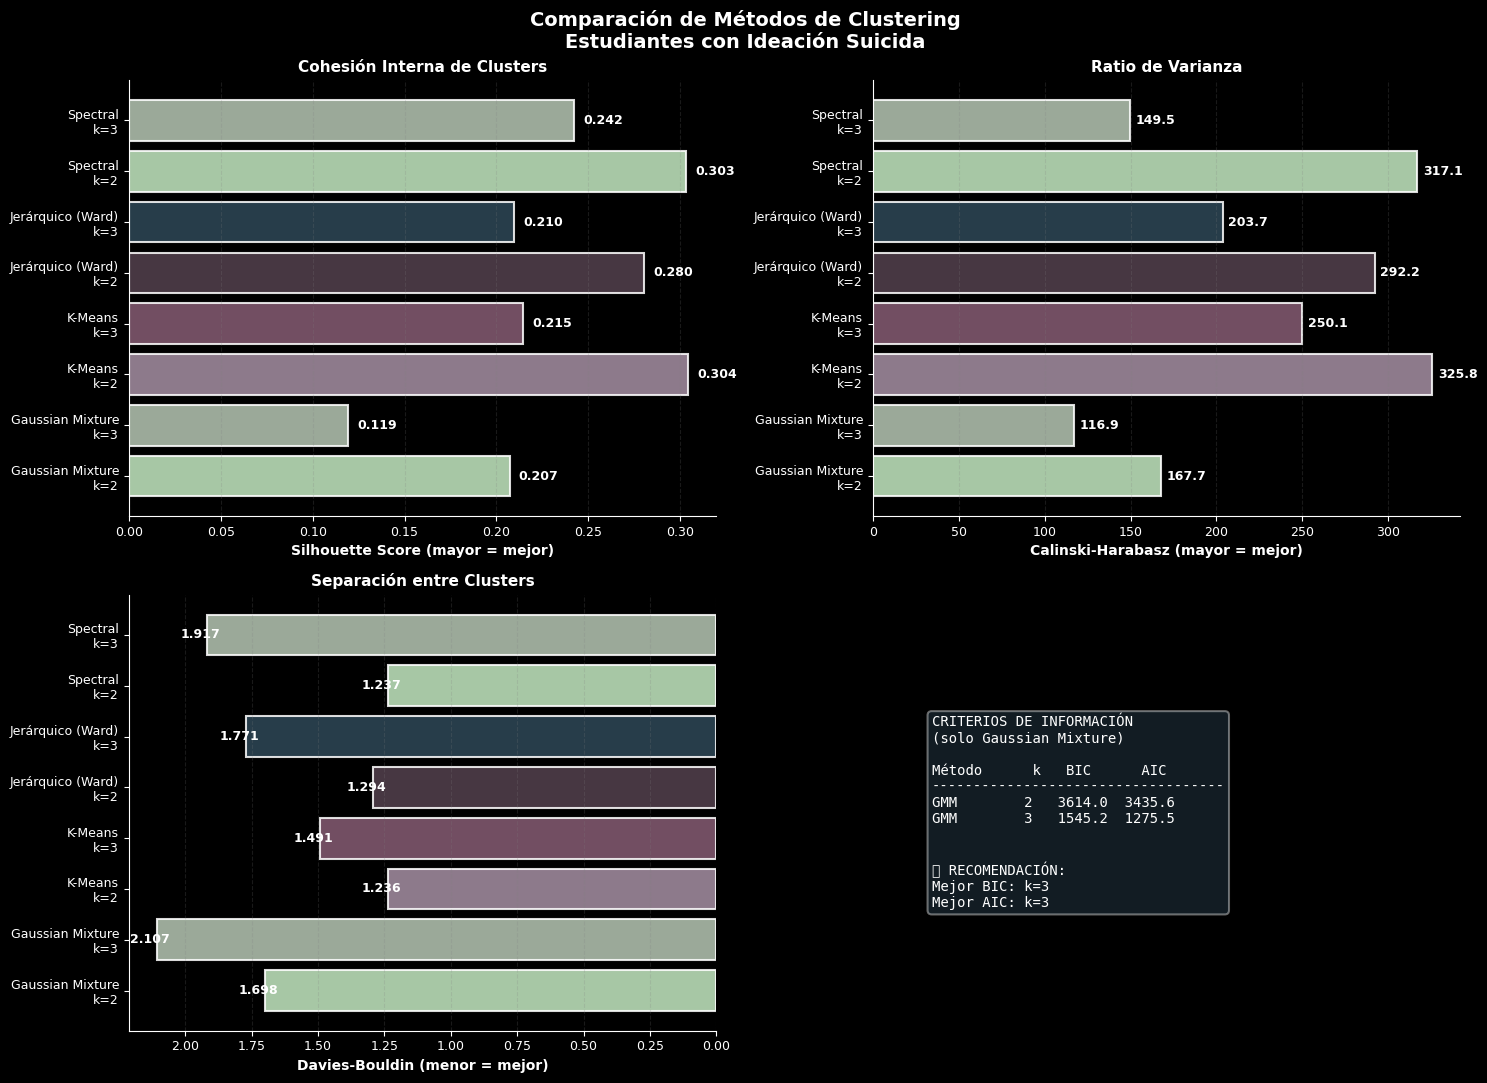



--- 5.2C DECISIÓN METODOLÓGICA FINAL ---

🏆 SOLUCIÓN SELECCIONADA:
   Método: K-Means
   Número de perfiles: 2
   Score compuesto: 1.000

✓ Modelo final seleccionado: K-Means con 2 perfiles
✓ Perfiles asignados a 573 participantes


--- 5.3 CARACTERIZACIÓN DE PERFILES ---

PERFIL 0 (n=278)

Medias (DE):
  • severidad_depresion_ultimo_mes: M=13.35 (DE=1.85)
  • severidad_ansiedad_ultimo_mes: M=13.33 (DE=2.29)
  • inflexibilidad_psicologica: M=36.88 (DE=7.42)
  • bienestar_psicologico: M=16.54 (DE=3.71)
  • severidad_ideacion_ultimo_mes: M=2.10 (DE=0.92)

PERFIL 1 (n=295)

Medias (DE):
  • severidad_depresion_ultimo_mes: M=8.64 (DE=2.83)
  • severidad_ansiedad_ultimo_mes: M=8.93 (DE=2.88)
  • inflexibilidad_psicologica: M=25.06 (DE=7.59)
  • bienestar_psicologico: M=21.29 (DE=3.75)
  • severidad_ideacion_ultimo_mes: M=1.27 (DE=0.53)


--- 5.3B COMPARACIÓN ESTADÍSTICA ---

severidad_depresion_ultimo_mes:
  ANOVA: F=547.76, p=0.0000
  Kruskal-Wallis: H=306.88, p=0.0000
  → Diferencias al

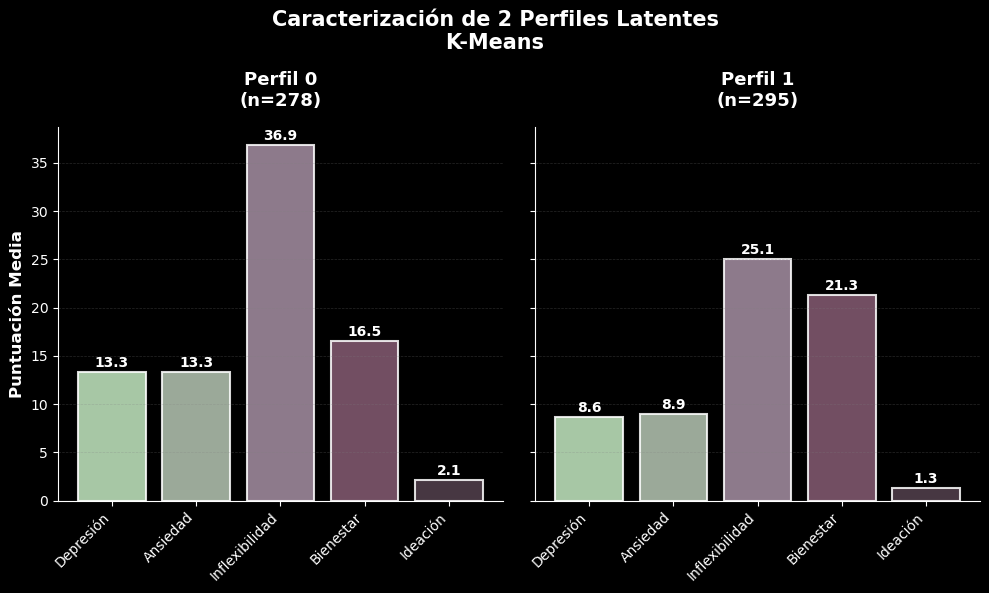


✓ FASE 5 COMPLETADA EXITOSAMENTE

📊 Resumen de archivos generados:
  • 12_matriz_correlaciones.csv
  • 12_matriz_correlaciones_profesional.png
  • 12_correlaciones_ordenadas.csv
  • 13_comparacion_clustering.csv
  • 13_comparacion_metodos_clustering.png
  • 14_perfiles_caracterizacion.png

🎯 Solución final: K-Means con 2 perfiles


In [ ]:


print("\n" + "="*80)
print("FASE 5: ANÁLISIS DE RELACIONES Y PERFILES LATENTES")
print("="*80)

# Verificar carpeta de figuras
Path('figuras').mkdir(exist_ok=True)

# Importar librerías adicionales
try:
    from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
    from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.mixture import GaussianMixture
    from scipy.stats import f_oneway, kruskal
    from scipy.cluster.hierarchy import dendrogram, linkage
    from scipy.spatial.distance import pdist, squareform
    print("✓ Librerías de clustering importadas correctamente")
except ImportError as e:
    print(f"⚠️  Advertencia: {e}")
    print("   Instalar con: pip install scikit-learn scipy")

# =============================================================================
# 5.1 MATRIZ DE CORRELACIONES 
# =============================================================================

print("\n--- 5.1 MATRIZ DE CORRELACIONES BIVARIADAS ---")
print("Diseño profesional con detalles sutiles de experto")

# Variables clave (sin edad)
variables_correlacion = [
    'severidad_depresion_ultimo_mes',
    'severidad_ansiedad_ultimo_mes',
    'severidad_ideacion_ultimo_mes',
    'inflexibilidad_psicologica',
    'bienestar_psicologico'
]

# Calcular correlaciones
df_corr = df_clean[variables_correlacion].copy()
matriz_corr = df_corr.corr(method='pearson')

print("\nMatriz de Correlaciones (Pearson):")
print(matriz_corr.round(3))

# Guardar matriz de correlaciones
try:
    matriz_corr.to_csv('figuras/12_matriz_correlaciones.csv', encoding='utf-8')
    print(f"✓ Matriz guardada: figuras/12_matriz_correlaciones.csv")
except Exception as e:
    print(f"✗ Error al guardar matriz: {str(e)}")

# =============================================================================
# VISUALIZACIÓN 1: Matriz de correlaciones profesional
# =============================================================================

print("\n--- Generando matriz de correlaciones profesional ---")

try:
    from matplotlib.colors import LinearSegmentedColormap
    from matplotlib.patches import Rectangle
    
    fig = plt.figure(figsize=(12, 10), facecolor='black')
    gs = fig.add_gridspec(1, 20, wspace=0.5)
    ax = fig.add_subplot(gs[0, :18])
    cax = fig.add_subplot(gs[0, 19])
    
    # Paleta profesional: gradiente divergente centrado en 0
    colores_prof = ['#54414e', '#875c74', '#a790a5', '#E8E8E8', '#c5ebc3', '#b7c8b5', '#9ACD32']
    cmap_prof = LinearSegmentedColormap.from_list('divergent_prof', colores_prof, N=256)
    
    n_vars = len(variables_correlacion)
    labels_elegantes = [
        'Depresión\n(severidad)',
        'Ansiedad\n(severidad)',
        'Ideación Suicida\n(severidad)',
        'Inflexibilidad\nPsicológica',
        'Bienestar\nPsicológico'
    ]
    
    # Configuración minimalista
    ax.set_xlim(-0.6, n_vars - 0.4)
    ax.set_ylim(n_vars - 0.4, -0.6)
    ax.set_aspect('equal')
    
    # Ejes invisibles
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('black')
    
    # Grid ultra sutil
    for i in range(n_vars + 1):
        ax.plot([-0.5, n_vars - 0.5], [i - 0.5, i - 0.5], 
                color='white', linewidth=0.5, alpha=0.15, zorder=1)
        ax.plot([i - 0.5, i - 0.5], [-0.5, n_vars - 0.5], 
                color='white', linewidth=0.5, alpha=0.15, zorder=1)
    
    # Nodos circulares con diseño refinado
    for i in range(n_vars):
        for j in range(n_vars):
            corr_value = matriz_corr.iloc[i, j]
            
            if i == j:
                # Cuadrado sutil en la diagonal
                rect = Rectangle((j - 0.42, i - 0.42), 0.84, 0.84, 
                               facecolor='#2f2f2f', edgecolor='white', 
                               linewidth=1, alpha=0.3, zorder=2)
                ax.add_patch(rect)
                ax.text(j, i, '1.00', ha='center', va='center', 
                       fontsize=9, color='white', alpha=0.5, 
                       fontweight='light', zorder=3, style='italic')
            else:
                # Círculos para correlaciones
                size = abs(corr_value) * 0.44
                color = cmap_prof((corr_value + 1) / 2)
                
                # Círculo principal con borde sutil
                circle = plt.Circle((j, i), size, color=color, alpha=0.9, 
                                   edgecolor='white', linewidth=1, zorder=2)
                ax.add_patch(circle)
                
                # Añadir sombra sutil para correlaciones fuertes
                if abs(corr_value) > 0.5:
                    shadow = plt.Circle((j + 0.02, i + 0.02), size, 
                                       color='black', alpha=0.1, zorder=1)
                    ax.add_patch(shadow)
                
                # Texto con jerarquía visual
                if abs(corr_value) > 0.7:
                    fontsize = 11
                    fontweight = 'bold'
                    alpha = 1.0
                elif abs(corr_value) > 0.4:
                    fontsize = 10
                    fontweight = 'medium'
                    alpha = 0.95
                else:
                    fontsize = 9
                    fontweight = 'normal'
                    alpha = 0.85
                
                # Color del texto adaptativo
                text_color = '#1a1a1a' if abs(corr_value) > 0.35 else 'white'
                
                ax.text(j, i, f'{corr_value:.2f}', 
                       ha='center', va='center', fontsize=fontsize,
                       color=text_color, fontweight=fontweight, 
                       alpha=alpha, zorder=3)
    
    # Etiquetas con estilo profesional
    for idx, label in enumerate(labels_elegantes):
        ax.text(idx, -0.65, label, ha='center', va='bottom', 
               fontsize=10, color='white', rotation=0, 
               fontweight='medium', alpha=0.9)
        ax.text(-0.65, idx, label, ha='right', va='center', 
               fontsize=10, color='white', fontweight='medium', alpha=0.9)
    
    # Título minimalista
    ax.text(n_vars/2, -1.2, 'Matriz de Correlaciones de Pearson', 
           ha='center', va='bottom', fontsize=14, color='white', 
           fontweight='light', alpha=0.95)
    ax.text(n_vars/2, -1.05, f'Dataset Completo (N={len(df_clean):,})', 
           ha='center', va='top', fontsize=10, color='white', 
           fontweight='light', alpha=0.7, style='italic')
    
    # Barra de gradiente profesional
    norm = plt.Normalize(vmin=-1, vmax=1)
    from matplotlib.cm import ScalarMappable
    sm = ScalarMappable(cmap=cmap_prof, norm=norm)
    sm.set_array([])
    
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('r', rotation=0, labelpad=15, fontsize=11, 
                   color='white', fontweight='light')
    cbar.ax.tick_params(colors='white', labelsize=9, length=3, width=0.5)
    cbar.outline.set_edgecolor('white')
    cbar.outline.set_linewidth(0.5)
    cbar.outline.set_alpha(0.3)
    
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
    
    # Anotaciones sutiles
    cbar.ax.text(1.8, -1, 'Negativa\nFuerte', fontsize=8, color='white', 
                alpha=0.6, va='center', style='italic')
    cbar.ax.text(1.8, 0, 'Sin\nCorrelación', fontsize=8, color='white', 
                alpha=0.6, va='center', style='italic')
    cbar.ax.text(1.8, 1, 'Positiva\nFuerte', fontsize=8, color='white', 
                alpha=0.6, va='center', style='italic')
    
    # GUARDAR ANTES DE MOSTRAR
    ruta_fig1 = 'figuras/12_matriz_correlaciones_profesional.png'
    plt.savefig(ruta_fig1, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig1}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear matriz de correlaciones: {str(e)}")
    import traceback
    traceback.print_exc()

# Interpretación estadística
print("\n--- 5.1B ANÁLISIS DE CORRELACIONES ---")
print("\nCorrelaciones ordenadas por magnitud:\n")

labels_interp = ['Sev. Depresión', 'Sev. Ansiedad', 'Sev. Ideación', 
                'Inflexibilidad', 'Bienestar']

corr_pairs = []
for i in range(len(matriz_corr.columns)):
    for j in range(i+1, len(matriz_corr.columns)):
        corr_pairs.append({
            'Variable 1': labels_interp[i],
            'Variable 2': labels_interp[j],
            'r': matriz_corr.iloc[i, j],
            '|r|': abs(matriz_corr.iloc[i, j])
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('|r|', ascending=False)
print(corr_df[['Variable 1', 'Variable 2', 'r']].head(10).to_string(index=False))

# Guardar tabla de correlaciones
try:
    corr_df.to_csv('figuras/12_correlaciones_ordenadas.csv', index=False, encoding='utf-8')
    print(f"\n✓ Tabla de correlaciones guardada: figuras/12_correlaciones_ordenadas.csv")
except Exception as e:
    print(f"✗ Error al guardar tabla: {str(e)}")

# =============================================================================
# 5.2 COMPARACIÓN EXHAUSTIVA DE MÉTODOS DE CLUSTERING
# =============================================================================

print("\n\n--- 5.2 ANÁLISIS DE PERFILES LATENTES ---")
print("Comparación de 5 métodos de clustering de nivel experto")
print("=" * 80)

# Preparar datos
df_ideacion = df_clean[df_clean['ideacion_ultimo_mes_dicotomica'] == 1].copy()
print(f"\n📊 Muestra para análisis: n = {len(df_ideacion)}")

vars_clustering = [
    'severidad_depresion_ultimo_mes',
    'severidad_ansiedad_ultimo_mes',
    'inflexibilidad_psicologica',
    'bienestar_psicologico',
    'severidad_ideacion_ultimo_mes'
]

df_cluster = df_ideacion[vars_clustering].dropna()
print(f"📊 Casos completos: n = {len(df_cluster)}")

if len(df_cluster) < 50:
    print("⚠️  ADVERTENCIA: Muestra pequeña para clustering. Se recomienda n≥100.")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Diccionario para almacenar resultados
resultados_clustering = {}

print("\n" + "="*80)
print("EVALUACIÓN DE MÉTODOS DE CLUSTERING")
print("Enfoque: Soluciones con 2 y 3 perfiles")
print("="*80)

# =============================================================================
# MÉTODO 1: GAUSSIAN MIXTURE MODEL (LPA)
# =============================================================================
print("\n\n1️⃣  GAUSSIAN MIXTURE MODEL (Gold Standard en Psicología)")
print("-" * 80)

for k in [2, 3]:
    try:
        gmm = GaussianMixture(n_components=k, covariance_type='full', 
                              random_state=42, n_init=100, max_iter=500)
        gmm.fit(X_scaled)
        clusters = gmm.predict(X_scaled)
        
        # Métricas
        silhouette = silhouette_score(X_scaled, clusters)
        calinski = calinski_harabasz_score(X_scaled, clusters)
        davies = davies_bouldin_score(X_scaled, clusters)
        bic = gmm.bic(X_scaled)
        aic = gmm.aic(X_scaled)
        
        resultados_clustering[f'GMM_k{k}'] = {
            'método': 'Gaussian Mixture',
            'k': k,
            'clusters': clusters,
            'model': gmm,
            'silhouette': silhouette,
            'calinski': calinski,
            'davies_bouldin': davies,
            'bic': bic,
            'aic': aic
        }
        
        unique, counts = np.unique(clusters, return_counts=True)
        print(f"\nk={k} perfiles:")
        print(f"  Silhouette: {silhouette:.4f} ↑")
        print(f"  Calinski-Harabasz: {calinski:.2f} ↑")
        print(f"  Davies-Bouldin: {davies:.4f} ↓")
        print(f"  BIC: {bic:.2f} ↓")
        print(f"  AIC: {aic:.2f} ↓")
        print(f"  Distribución: {dict(zip(unique, counts))}")
    except Exception as e:
        print(f"✗ Error en GMM k={k}: {str(e)}")

# =============================================================================
# MÉTODO 2: K-MEANS
# =============================================================================
print("\n\n2️⃣  K-MEANS (Baseline Clásico)")
print("-" * 80)

for k in [2, 3]:
    try:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=100, max_iter=500)
        clusters = kmeans.fit_predict(X_scaled)
        
        silhouette = silhouette_score(X_scaled, clusters)
        calinski = calinski_harabasz_score(X_scaled, clusters)
        davies = davies_bouldin_score(X_scaled, clusters)
        
        resultados_clustering[f'KMeans_k{k}'] = {
            'método': 'K-Means',
            'k': k,
            'clusters': clusters,
            'model': kmeans,
            'silhouette': silhouette,
            'calinski': calinski,
            'davies_bouldin': davies,
            'inertia': kmeans.inertia_
        }
        
        unique, counts = np.unique(clusters, return_counts=True)
        print(f"\nk={k} clusters:")
        print(f"  Silhouette: {silhouette:.4f} ↑")
        print(f"  Calinski-Harabasz: {calinski:.2f} ↑")
        print(f"  Davies-Bouldin: {davies:.4f} ↓")
        print(f"  Inertia: {kmeans.inertia_:.2f} ↓")
        print(f"  Distribución: {dict(zip(unique, counts))}")
    except Exception as e:
        print(f"✗ Error en K-Means k={k}: {str(e)}")

# =============================================================================
# MÉTODO 3: CLUSTERING JERÁRQUICO (WARD)
# =============================================================================
print("\n\n3️⃣  CLUSTERING JERÁRQUICO - Ward")
print("-" * 80)

for k in [2, 3]:
    try:
        hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
        clusters = hierarchical.fit_predict(X_scaled)
        
        silhouette = silhouette_score(X_scaled, clusters)
        calinski = calinski_harabasz_score(X_scaled, clusters)
        davies = davies_bouldin_score(X_scaled, clusters)
        
        resultados_clustering[f'Hierarchical_k{k}'] = {
            'método': 'Jerárquico (Ward)',
            'k': k,
            'clusters': clusters,
            'model': hierarchical,
            'silhouette': silhouette,
            'calinski': calinski,
            'davies_bouldin': davies
        }
        
        unique, counts = np.unique(clusters, return_counts=True)
        print(f"\nk={k} clusters:")
        print(f"  Silhouette: {silhouette:.4f} ↑")
        print(f"  Calinski-Harabasz: {calinski:.2f} ↑")
        print(f"  Davies-Bouldin: {davies:.4f} ↓")
        print(f"  Distribución: {dict(zip(unique, counts))}")
    except Exception as e:
        print(f"✗ Error en Jerárquico k={k}: {str(e)}")

# =============================================================================
# MÉTODO 4: SPECTRAL CLUSTERING
# =============================================================================
print("\n\n4️⃣  SPECTRAL CLUSTERING")
print("-" * 80)

for k in [2, 3]:
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, 
                                       affinity='rbf', n_init=100)
        clusters = spectral.fit_predict(X_scaled)
        
        silhouette = silhouette_score(X_scaled, clusters)
        calinski = calinski_harabasz_score(X_scaled, clusters)
        davies = davies_bouldin_score(X_scaled, clusters)
        
        resultados_clustering[f'Spectral_k{k}'] = {
            'método': 'Spectral',
            'k': k,
            'clusters': clusters,
            'model': spectral,
            'silhouette': silhouette,
            'calinski': calinski,
            'davies_bouldin': davies
        }
        
        unique, counts = np.unique(clusters, return_counts=True)
        print(f"\nk={k} clusters:")
        print(f"  Silhouette: {silhouette:.4f} ↑")
        print(f"  Calinski-Harabasz: {calinski:.2f} ↑")
        print(f"  Davies-Bouldin: {davies:.4f} ↓")
        print(f"  Distribución: {dict(zip(unique, counts))}")
    except Exception as e:
        print(f"✗ Error en Spectral k={k}: {str(e)}")

# =============================================================================
# VISUALIZACIÓN 2: Tabla comparativa de métodos
# =============================================================================
print("\n\n--- 5.2B TABLA COMPARATIVA DE MÉTODOS ---")
print("=" * 80)

# Crear DataFrame comparativo
comparacion = []
for key, res in resultados_clustering.items():
    fila = {
        'método': res['método'],
        'k': res['k'],
        'Silhouette': res['silhouette'],
        'Calinski-H': res['calinski'],
        'Davies-B': res['davies_bouldin']
    }
    
    if 'bic' in res:
        fila['BIC'] = res['bic']
        fila['AIC'] = res['aic']
    
    comparacion.append(fila)

df_comparacion = pd.DataFrame(comparacion)

print("\n📊 MÉTRICAS DE AJUSTE (ordenadas por Silhouette Score):\n")
cols_orden = ['método', 'k', 'Silhouette', 'Calinski-H', 'Davies-B']
if 'BIC' in df_comparacion.columns:
    cols_orden.extend(['BIC', 'AIC'])
print(df_comparacion[cols_orden].sort_values('Silhouette', ascending=False).to_string(index=False))

# Guardar tabla comparativa
try:
    df_comparacion.to_csv('figuras/13_comparacion_clustering.csv', index=False, encoding='utf-8')
    print(f"\n✓ Tabla comparativa guardada: figuras/13_comparacion_clustering.csv")
except Exception as e:
    print(f"✗ Error al guardar tabla: {str(e)}")

print("\n--- Generando visualización comparativa de métodos ---")

try:
    fig, axes = plt.subplots(2, 2, figsize=(15, 11), facecolor='black')
    
    # Preparar datos
    metodos_labels = []
    silhouette_vals = []
    calinski_vals = []
    davies_vals = []
    
    for item in comparacion:
        metodos_labels.append(f"{item['método']}\nk={item['k']}")
        silhouette_vals.append(item['Silhouette'])
        calinski_vals.append(item['Calinski-H'])
        davies_vals.append(item['Davies-B'])
    
    # Panel 1: Silhouette Score
    bars = axes[0, 0].barh(range(len(metodos_labels)), silhouette_vals, 
                           color=COLORES[:len(metodos_labels)] if len(metodos_labels) <= len(COLORES) else COLORES*2, 
                           edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[0, 0].set_yticks(range(len(metodos_labels)))
    axes[0, 0].set_yticklabels(metodos_labels, fontsize=9, color='white')
    axes[0, 0].set_xlabel('Silhouette Score (mayor = mejor)', fontsize=10, color='white', fontweight='bold')
    axes[0, 0].set_title('Cohesión Interna de Clusters', fontsize=11, 
                        fontweight='bold', color='white')
    axes[0, 0].tick_params(colors='white', labelsize=9)
    axes[0, 0].grid(axis='x', alpha=0.2, linestyle='--', color='gray')
    axes[0, 0].set_facecolor('black')
    axes[0, 0].spines['top'].set_visible(False)
    axes[0, 0].spines['right'].set_visible(False)
    axes[0, 0].spines['left'].set_color('white')
    axes[0, 0].spines['bottom'].set_color('white')
    for i, (bar, val) in enumerate(zip(bars, silhouette_vals)):
        axes[0, 0].text(val + 0.005, i, f'{val:.3f}', 
                       va='center', fontsize=9, color='white', fontweight='bold')
    
    # Panel 2: Calinski-Harabasz
    bars = axes[0, 1].barh(range(len(metodos_labels)), calinski_vals, 
                           color=COLORES[:len(metodos_labels)] if len(metodos_labels) <= len(COLORES) else COLORES*2, 
                           edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[0, 1].set_yticks(range(len(metodos_labels)))
    axes[0, 1].set_yticklabels(metodos_labels, fontsize=9, color='white')
    axes[0, 1].set_xlabel('Calinski-Harabasz (mayor = mejor)', fontsize=10, color='white', fontweight='bold')
    axes[0, 1].set_title('Ratio de Varianza', fontsize=11, 
                        fontweight='bold', color='white')
    axes[0, 1].tick_params(colors='white', labelsize=9)
    axes[0, 1].grid(axis='x', alpha=0.2, linestyle='--', color='gray')
    axes[0, 1].set_facecolor('black')
    axes[0, 1].spines['top'].set_visible(False)
    axes[0, 1].spines['right'].set_visible(False)
    axes[0, 1].spines['left'].set_color('white')
    axes[0, 1].spines['bottom'].set_color('white')
    for i, (bar, val) in enumerate(zip(bars, calinski_vals)):
        axes[0, 1].text(val + max(calinski_vals)*0.01, i, f'{val:.1f}', 
                       va='center', fontsize=9, color='white', fontweight='bold')
    
    # Panel 3: Davies-Bouldin
    bars = axes[1, 0].barh(range(len(metodos_labels)), davies_vals, 
                           color=COLORES[:len(metodos_labels)] if len(metodos_labels) <= len(COLORES) else COLORES*2, 
                           edgecolor='white', linewidth=1.5, alpha=0.85)
    axes[1, 0].set_yticks(range(len(metodos_labels)))
    axes[1, 0].set_yticklabels(metodos_labels, fontsize=9, color='white')
    axes[1, 0].set_xlabel('Davies-Bouldin (menor = mejor)', fontsize=10, color='white', fontweight='bold')
    axes[1, 0].set_title('Separación entre Clusters', fontsize=11, 
                        fontweight='bold', color='white')
    axes[1, 0].tick_params(colors='white', labelsize=9)
    axes[1, 0].grid(axis='x', alpha=0.2, linestyle='--', color='gray')
    axes[1, 0].invert_xaxis()
    axes[1, 0].set_facecolor('black')
    axes[1, 0].spines['top'].set_visible(False)
    axes[1, 0].spines['right'].set_visible(False)
    axes[1, 0].spines['left'].set_color('white')
    axes[1, 0].spines['bottom'].set_color('white')
    for i, (bar, val) in enumerate(zip(bars, davies_vals)):
        axes[1, 0].text(val - 0.05, i, f'{val:.3f}', 
                       va='center', ha='right', fontsize=9, color='white', fontweight='bold')
    
    # Panel 4: BIC/AIC (solo GMM)
    axes[1, 1].axis('off')
    axes[1, 1].set_facecolor('black')
    
    gmm_results = [(item['método'], item['k'], item.get('BIC', np.nan), item.get('AIC', np.nan)) 
                   for item in comparacion if 'BIC' in item]
    
    texto_gmm = "CRITERIOS DE INFORMACIÓN\n(solo Gaussian Mixture)\n\n"
    texto_gmm += "Método      k   BIC      AIC\n"
    texto_gmm += "-" * 35 + "\n"
    for metodo, k, bic, aic in gmm_results:
        texto_gmm += f"GMM        {k}   {bic:.1f}  {aic:.1f}\n"
    
    if gmm_results:
        texto_gmm += "\n\n📊 RECOMENDACIÓN:\n"
        mejor_bic_k = min(gmm_results, key=lambda x: x[2])[1]
        mejor_aic_k = min(gmm_results, key=lambda x: x[3])[1]
        texto_gmm += f"Mejor BIC: k={mejor_bic_k}\n"
        texto_gmm += f"Mejor AIC: k={mejor_aic_k}"
    
    axes[1, 1].text(0.1, 0.5, texto_gmm, fontsize=10, color='white', 
                   verticalalignment='center', family='monospace',
                   bbox=dict(boxstyle='round', facecolor='#2f4858', 
                            alpha=0.4, edgecolor='white', linewidth=1.5))
    
    plt.suptitle('Comparación de Métodos de Clustering\nEstudiantes con Ideación Suicida', 
                fontsize=14, fontweight='bold', color='white')
    plt.tight_layout()
    
    # GUARDAR ANTES DE MOSTRAR
    ruta_fig2 = 'figuras/13_comparacion_metodos_clustering.png'
    plt.savefig(ruta_fig2, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
    print(f"✓ Figura guardada: {ruta_fig2}")
    
    plt.show()
    plt.close()
    
except Exception as e:
    print(f"✗ Error al crear comparación de métodos: {str(e)}")
    import traceback
    traceback.print_exc()

# =============================================================================
# DECISIÓN FINAL
# =============================================================================
print("\n\n--- 5.2C DECISIÓN METODOLÓGICA FINAL ---")
print("=" * 80)

if len(resultados_clustering) > 0:
    # Normalizar métricas
    df_comp_sorted = df_comparacion.copy()
    
    df_comp_sorted['Silh_norm'] = (df_comp_sorted['Silhouette'] - df_comp_sorted['Silhouette'].min()) / (df_comp_sorted['Silhouette'].max() - df_comp_sorted['Silhouette'].min())
    df_comp_sorted['Cal_norm'] = (df_comp_sorted['Calinski-H'] - df_comp_sorted['Calinski-H'].min()) / (df_comp_sorted['Calinski-H'].max() - df_comp_sorted['Calinski-H'].min())
    df_comp_sorted['Dav_norm'] = 1 - ((df_comp_sorted['Davies-B'] - df_comp_sorted['Davies-B'].min()) / (df_comp_sorted['Davies-B'].max() - df_comp_sorted['Davies-B'].min()))
    
    # Score compuesto
    df_comp_sorted['Score_Total'] = (df_comp_sorted['Silh_norm'] + 
                                      df_comp_sorted['Cal_norm'] + 
                                      df_comp_sorted['Dav_norm']) / 3
    
    mejor_idx = df_comp_sorted['Score_Total'].idxmax()
    mejor_metodo = df_comp_sorted.loc[mejor_idx, 'método']
    mejor_k = int(df_comp_sorted.loc[mejor_idx, 'k'])
    mejor_key = list(resultados_clustering.keys())[mejor_idx]
    
    print(f"\n🏆 SOLUCIÓN SELECCIONADA:")
    print(f"   Método: {mejor_metodo}")
    print(f"   Número de perfiles: {mejor_k}")
    print(f"   Score compuesto: {df_comp_sorted.loc[mejor_idx, 'Score_Total']:.3f}")
    
    # Guardar solución final
    perfiles_finales = resultados_clustering[mejor_key]['clusters']
    df_cluster['perfil'] = perfiles_finales
    
    print(f"\n✓ Modelo final seleccionado: {mejor_metodo} con {mejor_k} perfiles")
    print(f"✓ Perfiles asignados a {len(df_cluster)} participantes")
    
    # =============================================================================
    # 5.3 CARACTERIZACIÓN DE PERFILES
    # =============================================================================
    print("\n\n--- 5.3 CARACTERIZACIÓN DE PERFILES ---")
    print("=" * 80)
    
    for perfil in range(mejor_k):
        print(f"\n{'='*60}")
        print(f"PERFIL {perfil} (n={sum(perfiles_finales==perfil)})")
        print(f"{'='*60}")
        
        datos_perfil = df_cluster[df_cluster['perfil'] == perfil][vars_clustering]
        print("\nMedias (DE):")
        for var in vars_clustering:
            media = datos_perfil[var].mean()
            de = datos_perfil[var].std()
            print(f"  • {var}: M={media:.2f} (DE={de:.2f})")
    
    # Comparación estadística
    print("\n\n--- 5.3B COMPARACIÓN ESTADÍSTICA ---")
    print("=" * 80)
    
    for var in vars_clustering:
        grupos = [df_cluster[df_cluster['perfil']==p][var].values for p in range(mejor_k)]
        
        if len(grupos) >= 2 and all(len(g) > 0 for g in grupos):
            try:
                f_stat, p_anova = f_oneway(*grupos)
                h_stat, p_kruskal = kruskal(*grupos)
                
                print(f"\n{var}:")
                print(f"  ANOVA: F={f_stat:.2f}, p={p_anova:.4f}")
                print(f"  Kruskal-Wallis: H={h_stat:.2f}, p={p_kruskal:.4f}")
                
                if p_anova < 0.001:
                    print(f"  → Diferencias altamente significativas (p < .001)")
                elif p_anova < 0.01:
                    print(f"  → Diferencias muy significativas (p < .01)")
                elif p_anova < 0.05:
                    print(f"  → Diferencias significativas (p < .05)")
            except Exception as e:
                print(f"  ⚠️  Error en prueba estadística: {str(e)}")
    
    # =============================================================================
    # VISUALIZACIÓN 3: Caracterización de perfiles
    # =============================================================================
    print("\n--- Generando caracterización de perfiles ---")
    
    try:
        fig, axes = plt.subplots(1, mejor_k, figsize=(5*mejor_k, 6), 
                                sharey=True, facecolor='black')
        if mejor_k == 1:
            axes = [axes]
        
        for perfil in range(mejor_k):
            datos_perfil = df_cluster[df_cluster['perfil'] == perfil]
            medias = [datos_perfil[var].mean() for var in vars_clustering]
            
            labels_vars = ['Depresión', 'Ansiedad', 'Inflexibilidad', 'Bienestar', 'Ideación']
            
            bars = axes[perfil].bar(range(len(medias)), medias, 
                                    color=COLORES[:len(medias)], 
                                    edgecolor='white', linewidth=1.5, alpha=0.85)
            
            axes[perfil].set_xticks(range(len(medias)))
            axes[perfil].set_xticklabels(labels_vars, rotation=45, ha='right', 
                                        fontsize=10, color='white')
            axes[perfil].set_title(f'Perfil {perfil}\n(n={len(datos_perfil)})', 
                                  fontsize=13, fontweight='bold', color='white', pad=15)
            axes[perfil].tick_params(colors='white', labelsize=10)
            axes[perfil].grid(axis='y', alpha=0.3, linestyle='--', color='gray', linewidth=0.5)
            axes[perfil].set_facecolor('black')
            axes[perfil].spines['top'].set_visible(False)
            axes[perfil].spines['right'].set_visible(False)
            axes[perfil].spines['left'].set_color('white')
            axes[perfil].spines['bottom'].set_color('white')
            
            for bar, val in zip(bars, medias):
                height = bar.get_height()
                axes[perfil].text(bar.get_x() + bar.get_width()/2., height + 0.2,
                                 f'{val:.1f}',
                                 ha='center', va='bottom', fontsize=10, 
                                 color='white', fontweight='bold')
        
        axes[0].set_ylabel('Puntuación Media', fontsize=12, color='white', fontweight='bold')
        
        plt.suptitle(f'Caracterización de {mejor_k} Perfiles Latentes\n{mejor_metodo}', 
                    fontsize=15, fontweight='bold', color='white')
        plt.tight_layout()
        
        # GUARDAR ANTES DE MOSTRAR
        ruta_fig3 = 'figuras/14_perfiles_caracterizacion.png'
        plt.savefig(ruta_fig3, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
        print(f"✓ Figura guardada: {ruta_fig3}")
        
        plt.show()
        plt.close()
        
    except Exception as e:
        print(f"✗ Error al crear caracterización de perfiles: {str(e)}")
        import traceback
        traceback.print_exc()
    
    print("\n" + "="*80)
    print("✓ FASE 5 COMPLETADA EXITOSAMENTE")
    print("="*80)
    print(f"\n📊 Resumen de archivos generados:")
    print(f"  • 12_matriz_correlaciones.csv")
    print(f"  • 12_matriz_correlaciones_profesional.png")
    print(f"  • 12_correlaciones_ordenadas.csv")
    print(f"  • 13_comparacion_clustering.csv")
    print(f"  • 13_comparacion_metodos_clustering.png")
    print(f"  • 14_perfiles_caracterizacion.png")
    print(f"\n🎯 Solución final: {mejor_metodo} con {mejor_k} perfiles")
    
else:
    print("⚠️  No se pudieron calcular los clusters. Revise los datos.")

# Fase 6: Visualizaciones Complementarias

---

## Objetivo de la Fase

En esta fase nos enfocamos en **representar visualmente los patrones identificados** en fases previas, para facilitar la interpretación tanto individual como grupal de los estudiantes con ideación suicida.  
Se implementan dos grandes estrategias:

1. **Visualización 3D continua de todos los estudiantes con ideación**  
   Un mapa tridimensional que permite observar la distribución natural de los participantes en el espacio definido por **depresión, bienestar e inflexibilidad psicológica**, coloreado según la severidad de ideación.  
   Esta visualización no distingue perfiles, ofreciendo una mirada integral y heterogénea de la muestra.

2. **Comparación de perfiles latentes con gráfico Radar 2D**  
   Una representación de las configuraciones promedio de los **perfiles latentes** identificados en la Fase 5, mostrando cómo se diferencian en dimensiones clave como depresión, ansiedad, inflexibilidad, bienestar e ideación.  
   El radar permite apreciar de forma intuitiva los patrones multidimensionales que caracterizan cada grupo.

---

## Sentido Metodológico

El uso combinado de **mapas 3D continuos** y **gráficos radar** responde a la necesidad de:

- Visualizar la **variabilidad individual** (mapa 3D) y la **estructura grupal** (radar).  
- Explorar la relación entre **factores de riesgo y recursos psicológicos**, sin reducir la complejidad a una única dimensión.  
- Facilitar la interpretación clínica y la comunicación de hallazgos a profesionales y tomadores de decisiones, manteniendo un enfoque **idiográfico y sistémico**.

Se busca que estas visualizaciones sean tanto **interactivas** (Plotly) como **estáticas** (Matplotlib), asegurando accesibilidad y reproducibilidad.





FASE 6: VISUALIZACIONES COMPLEMENTARIAS
✓ Plotly disponible para visualizaciones interactivas

--- 6.1 VISUALIZACIÓN 3D: TODOS LOS IDEADORES ---
Mapa 3D continuo sin distinción de perfiles

📊 Generando mapa 3D de 573 estudiantes con ideación suicida...
  • Eje X: Severidad de Depresión
  • Eje Y: Bienestar Psicológico
  • Eje Z: Inflexibilidad Psicológica
  • Color: Gradiente continuo por severidad de ideación

--- Generando visualización 3D interactiva con Plotly ---
✓ Mapa 3D interactivo guardado: figuras/15_mapa_3d_todos_ideadores.html
⚠️  No se pudo guardar PNG (requiere kaleido)
   Instalar con: pip install kaleido


--- 6.2 GRÁFICO RADAR: COMPARACIÓN DE PERFILES ---
Visualización 2D de perfiles latentes en formato radar/spider

📊 Calculando perfiles promedio para 2 grupos...
  Perfil 0: n=278
  Perfil 1: n=295

--- Generando gráfico radar interactivo con Plotly ---
✓ Gráfico radar interactivo guardado: figuras/16_comparacion_perfiles_radar.html
⚠️  No se pudo guardar PNG (requie

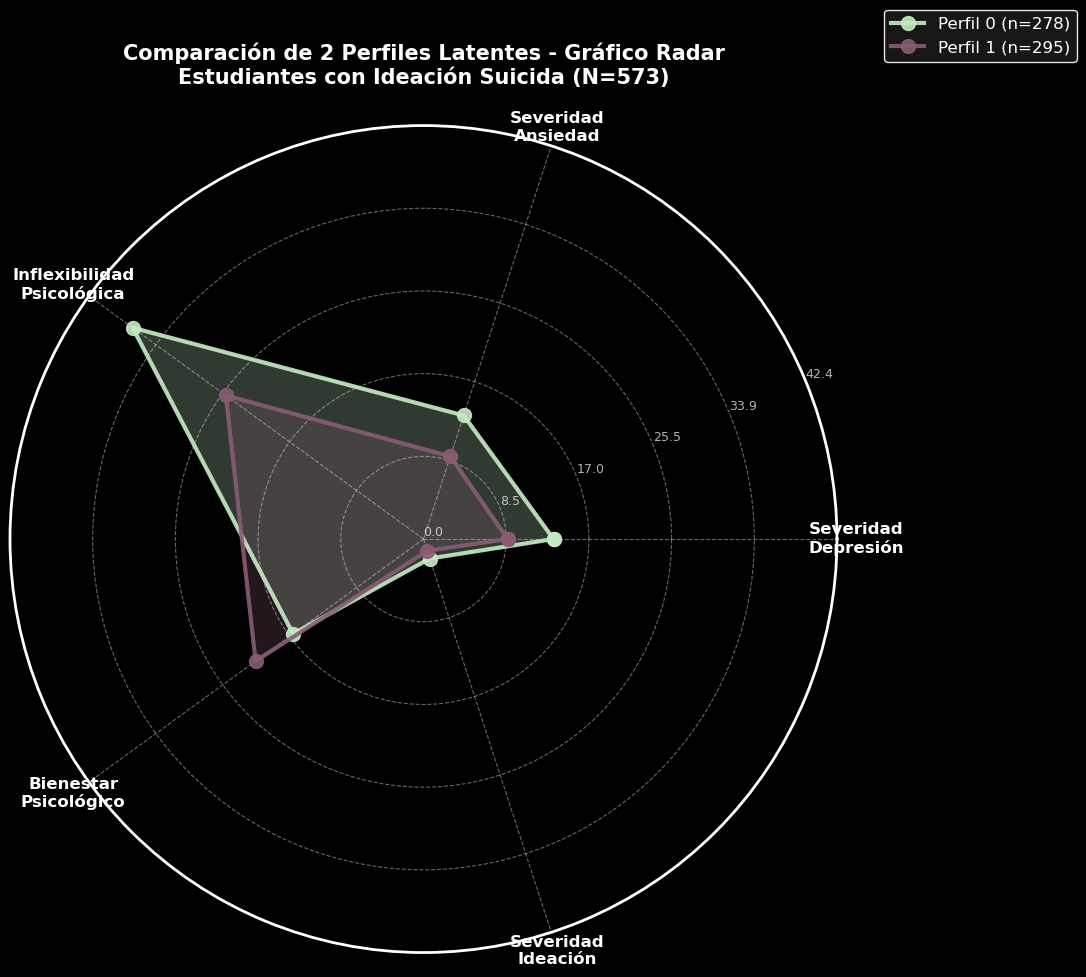



--- 6.3 ANÁLISIS DESCRIPTIVO DE VISUALIZACIONES ---

📊 ESTADÍSTICAS DEL MAPA 3D CONTINUO:

Total de estudiantes: 573

Centroide general:
  Depresión: 10.92
  Bienestar: 18.99
  Inflexibilidad: 30.80

Dispersión promedio desde centroide: 9.72
Desviación estándar de dispersión: 5.24

📈 CORRELACIONES CON SEVERIDAD DE IDEACIÓN:
  Severidad Depresión: r = 0.410
  Severidad Ansiedad: r = 0.278
  Inflexibilidad Psicológica: r = 0.326
  Bienestar Psicológico: r = -0.367


📊 COMPARACIÓN DE PERFILES (RADAR):

Perfil 0 (n=278):
  Severidad Depresión: 13.35
  Severidad Ansiedad: 13.33
  Inflexibilidad Psicológica: 36.88
  Bienestar Psicológico: 16.54
  Severidad Ideación: 2.10

Perfil 1 (n=295):
  Severidad Depresión: 8.64
  Severidad Ansiedad: 8.93
  Inflexibilidad Psicológica: 25.06
  Bienestar Psicológico: 21.29
  Severidad Ideación: 1.27

✓ Resumen de perfiles guardado: figuras/17_resumen_perfiles_radar.csv

INTERPRETACIÓN FASE 6

MAPA 3D CONTINUO (Todos los Ideadores):
El mapa tridimensiona

In [ ]:
# =============================================================================
# FASE 6: VISUALIZACIONES COMPLEMENTARIAS
# 1. Visualización 3D de todos los estudiantes con ideación (sin perfiles)
# 2. Comparación de perfiles en gráfico Radar 2D
# =============================================================================

print("\n" + "="*80)
print("FASE 6: VISUALIZACIONES COMPLEMENTARIAS")
print("="*80)

# Verificar carpeta de figuras
Path('figuras').mkdir(exist_ok=True)

# Verificar disponibilidad de Plotly
try:
    import plotly.graph_objects as go
    PLOTLY_AVAILABLE = True
    print("✓ Plotly disponible para visualizaciones interactivas")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️  Plotly no disponible. Solo se generarán versiones matplotlib.")
    print("   Instalar con: pip install plotly")

from math import pi

# =============================================================================
# 6.1 VISUALIZACIÓN 3D - TODOS LOS ESTUDIANTES CON IDEACIÓN
# =============================================================================

print("\n--- 6.1 VISUALIZACIÓN 3D: TODOS LOS IDEADORES ---")
print("Mapa 3D continuo sin distinción de perfiles")
print("="*80)

# Verificar que existe df_cluster y mejor_k de la Fase 5
if 'df_cluster' not in globals() or 'mejor_k' not in globals():
    print("⚠️  ADVERTENCIA: Faltan datos de la Fase 5. Ejecute la Fase 5 primero.")
else:
    # Preparar datos
    var_x = 'severidad_depresion_ultimo_mes'
    var_y = 'bienestar_psicologico'
    var_z = 'inflexibilidad_psicologica'
    var_color = 'severidad_ideacion_ultimo_mes'
    
    df_viz_todos = df_cluster.copy()
    
    print(f"\n📊 Generando mapa 3D de {len(df_viz_todos)} estudiantes con ideación suicida...")
    print(f"  • Eje X: Severidad de Depresión")
    print(f"  • Eje Y: Bienestar Psicológico")
    print(f"  • Eje Z: Inflexibilidad Psicológica")
    print(f"  • Color: Gradiente continuo por severidad de ideación")
    
    # Calcular centroide general
    centroide_general = np.array([
        df_viz_todos[var_x].mean(),
        df_viz_todos[var_y].mean(),
        df_viz_todos[var_z].mean()
    ])
    
    # =============================================================================
    # VISUALIZACIÓN 3D CON PLOTLY (si está disponible)
    # =============================================================================
    
    if PLOTLY_AVAILABLE:
        try:
            print("\n--- Generando visualización 3D interactiva con Plotly ---")
            
            # Crear figura 3D
            fig_todos = go.Figure()
            
            # Añadir todos los puntos con gradiente de color continuo
            fig_todos.add_trace(go.Scatter3d(
                x=df_viz_todos[var_x],
                y=df_viz_todos[var_y],
                z=df_viz_todos[var_z],
                mode='markers',
                name='Estudiantes con Ideación',
                marker=dict(
                    size=7,
                    color=df_viz_todos[var_color],
                    colorscale=[
                        [0, '#c5ebc3'],    # Verde claro (ideación baja)
                        [0.25, '#b7c8b5'], # Gris
                        [0.5, '#a790a5'],  # Rosa
                        [0.75, '#875c74'], # Morado
                        [1, '#54414e']     # Morado oscuro (ideación alta)
                    ],
                    colorbar=dict(
                        title='Severidad<br>Ideación',
                        titleside='right',
                        titlefont=dict(color='white', size=11),
                        tickfont=dict(color='white', size=9),
                        len=0.7,
                        thickness=15,
                        x=1.02
                    ),
                    opacity=0.7,
                    line=dict(color='white', width=0.5),
                    showscale=True
                ),
                text=[f"Dep: {d:.1f}<br>Bien: {b:.1f}<br>Inflex: {i:.1f}<br>Ideación: {ide:.0f}" 
                      for d, b, i, ide in zip(
                          df_viz_todos[var_x],
                          df_viz_todos[var_y],
                          df_viz_todos[var_z],
                          df_viz_todos[var_color]
                      )],
                hovertemplate='<b>Estudiante</b><br>%{text}<extra></extra>'
            ))
            
            # Añadir centroide general
            fig_todos.add_trace(go.Scatter3d(
                x=[centroide_general[0]],
                y=[centroide_general[1]],
                z=[centroide_general[2]],
                mode='markers+text',
                name='Centroide General',
                marker=dict(
                    size=20,
                    color='yellow',
                    symbol='diamond',
                    opacity=1,
                    line=dict(color='black', width=3)
                ),
                text=['Centro'],
                textposition='middle center',
                textfont=dict(color='black', size=12, family='Arial Black'),
                hovertemplate=f'<b>Centroide General</b><br>Dep: {centroide_general[0]:.1f}<br>Bien: {centroide_general[1]:.1f}<br>Inflex: {centroide_general[2]:.1f}<extra></extra>'
            ))
            
            # Layout profesional
            fig_todos.update_layout(
                title={
                    'text': 'Mapa 3D de Estudiantes con Ideación Suicida<br><sub>Espacio Continuo sin Perfiles (N=' + str(len(df_viz_todos)) + ')</sub>',
                    'x': 0.5,
                    'xanchor': 'center',
                    'font': {'size': 18, 'color': 'white'}
                },
                scene=dict(
                    xaxis=dict(
                        title='Severidad de Depresión →',
                        backgroundcolor='#0a0a0a',
                        gridcolor='#2a2a2a',
                        showbackground=True,
                        titlefont=dict(color='white', size=12),
                        tickfont=dict(color='white')
                    ),
                    yaxis=dict(
                        title='Bienestar Psicológico →',
                        backgroundcolor='#0a0a0a',
                        gridcolor='#2a2a2a',
                        showbackground=True,
                        titlefont=dict(color='white', size=12),
                        tickfont=dict(color='white')
                    ),
                    zaxis=dict(
                        title='Inflexibilidad Psicológica →',
                        backgroundcolor='#0a0a0a',
                        gridcolor='#2a2a2a',
                        showbackground=True,
                        titlefont=dict(color='white', size=12),
                        tickfont=dict(color='white')
                    ),
                    bgcolor='black',
                    camera=dict(eye=dict(x=1.7, y=1.7, z=1.4))
                ),
                paper_bgcolor='black',
                plot_bgcolor='black',
                font=dict(color='white', size=11),
                showlegend=True,
                legend=dict(
                    x=0.02,
                    y=0.98,
                    bgcolor='rgba(0,0,0,0.6)',
                    bordercolor='white',
                    borderwidth=1,
                    font=dict(size=10)
                ),
                width=1100,
                height=900
            )
            
            # Guardar HTML
            fig_todos.write_html('figuras/15_mapa_3d_todos_ideadores.html')
            print("✓ Mapa 3D interactivo guardado: figuras/15_mapa_3d_todos_ideadores.html")
            
            # Intentar guardar PNG (requiere kaleido)
            try:
                fig_todos.write_image('figuras/15_mapa_3d_todos_ideadores.png', 
                                     width=1100, height=900)
                print("✓ Versión estática guardada: figuras/15_mapa_3d_todos_ideadores.png")
            except Exception as e:
                print("⚠️  No se pudo guardar PNG (requiere kaleido)")
                print(f"   Instalar con: pip install kaleido")
        
        except Exception as e:
            print(f"✗ Error al crear visualización 3D: {str(e)}")
            import traceback
            traceback.print_exc()
    else:
        print("⚠️  Plotly no disponible. Visualización 3D omitida.")
    
    # =============================================================================
    # 6.2 GRÁFICO RADAR 2D - COMPARACIÓN DE PERFILES
    # =============================================================================
    
    print("\n\n--- 6.2 GRÁFICO RADAR: COMPARACIÓN DE PERFILES ---")
    print("Visualización 2D de perfiles latentes en formato radar/spider")
    print("="*80)
    
    # Variables para el radar
    vars_radar = [
        'severidad_depresion_ultimo_mes',
        'severidad_ansiedad_ultimo_mes',
        'inflexibilidad_psicologica',
        'bienestar_psicologico',
        'severidad_ideacion_ultimo_mes'
    ]
    
    labels_radar = [
        'Severidad<br>Depresión',
        'Severidad<br>Ansiedad',
        'Inflexibilidad<br>Psicológica',
        'Bienestar<br>Psicológico',
        'Severidad<br>Ideación'
    ]
    
    print(f"\n📊 Calculando perfiles promedio para {mejor_k} grupos...")
    
    # Calcular medias por perfil
    perfiles_data = []
    for perfil in range(mejor_k):
        datos_perfil = df_cluster[df_cluster['perfil'] == perfil]
        medias = [datos_perfil[var].mean() for var in vars_radar]
        perfiles_data.append({
            'perfil': perfil,
            'n': len(datos_perfil),
            'medias': medias
        })
        print(f"  Perfil {perfil}: n={len(datos_perfil)}")
    
    # =============================================================================
    # GRÁFICO RADAR INTERACTIVO CON PLOTLY
    # =============================================================================
    
    if PLOTLY_AVAILABLE:
        try:
            print("\n--- Generando gráfico radar interactivo con Plotly ---")
            
            # Crear figura radar
            fig_radar = go.Figure()
            
            # Colores para cada perfil
            colores_perfiles = [COLORES[0], COLORES[3], COLORES[4]]
            
            for idx, perfil_info in enumerate(perfiles_data):
                perfil = perfil_info['perfil']
                valores = perfil_info['medias']
                
                # Cerrar el polígono
                valores_cerrados = valores + [valores[0]]
                labels_cerrados = labels_radar + [labels_radar[0]]
                
                fig_radar.add_trace(go.Scatterpolar(
                    r=valores_cerrados,
                    theta=labels_cerrados,
                    fill='toself',
                    name=f'Perfil {perfil} (n={perfil_info["n"]})',
                    line=dict(color=colores_perfiles[perfil], width=3),
                    fillcolor=colores_perfiles[perfil],
                    opacity=0.4,
                    marker=dict(size=10, color=colores_perfiles[perfil]),
                    hovertemplate='<b>Perfil ' + str(perfil) + '</b><br>%{theta}: %{r:.2f}<extra></extra>'
                ))
            
            # Layout profesional
            fig_radar.update_layout(
                polar=dict(
                    bgcolor='black',
                    radialaxis=dict(
                        visible=True,
                        range=[0, max([max(p['medias']) for p in perfiles_data]) * 1.1],
                        showline=True,
                        linecolor='white',
                        gridcolor='#333333',
                        tickfont=dict(color='white', size=10)
                    ),
                    angularaxis=dict(
                        showline=True,
                        linecolor='white',
                        gridcolor='#333333',
                        tickfont=dict(color='white', size=11)
                    )
                ),
                title={
                    'text': f'Comparación de {mejor_k} Perfiles Latentes - Gráfico Radar<br><sub>Estudiantes con Ideación Suicida (N={len(df_cluster)})</sub>',
                    'x': 0.5,
                    'xanchor': 'center',
                    'font': {'size': 18, 'color': 'white'}
                },
                paper_bgcolor='black',
                plot_bgcolor='black',
                font=dict(color='white', size=12),
                showlegend=True,
                legend=dict(
                    x=1.02,
                    y=0.5,
                    bgcolor='rgba(0,0,0,0.7)',
                    bordercolor='white',
                    borderwidth=1,
                    font=dict(size=11)
                ),
                width=900,
                height=900
            )
            
            # Guardar
            fig_radar.write_html('figuras/16_comparacion_perfiles_radar.html')
            print("✓ Gráfico radar interactivo guardado: figuras/16_comparacion_perfiles_radar.html")
            
            try:
                fig_radar.write_image('figuras/16_comparacion_perfiles_radar.png', 
                                     width=900, height=900)
                print("✓ Versión estática guardada: figuras/16_comparacion_perfiles_radar.png")
            except:
                print("⚠️  No se pudo guardar PNG (requiere kaleido)")
        
        except Exception as e:
            print(f"✗ Error al crear radar Plotly: {str(e)}")
            import traceback
            traceback.print_exc()
    
    # =============================================================================
    # GRÁFICO RADAR CON MATPLOTLIB (siempre funciona)
    # =============================================================================
    
    print("\n--- Generando gráfico radar con matplotlib ---")
    
    try:
        # Crear radar con matplotlib
        fig_mpl, ax = plt.subplots(figsize=(11, 11), subplot_kw=dict(projection='polar'), 
                                    facecolor='black')
        
        # Calcular ángulos
        angles = [n / float(len(vars_radar)) * 2 * pi for n in range(len(vars_radar))]
        angles += angles[:1]  # Cerrar el círculo
        
        # Colores para cada perfil
        colores_perfiles = [COLORES[0], COLORES[3], COLORES[4]]
        
        # Dibujar cada perfil
        for idx, perfil_info in enumerate(perfiles_data):
            perfil = perfil_info['perfil']
            valores = perfil_info['medias'] + [perfil_info['medias'][0]]  # Cerrar
            
            ax.plot(angles, valores, 'o-', linewidth=3, 
                   color=colores_perfiles[perfil], 
                   label=f'Perfil {perfil} (n={perfil_info["n"]})',
                   markersize=10, alpha=0.9)
            
            ax.fill(angles, valores, alpha=0.25, color=colores_perfiles[perfil])
        
        # Configuración del gráfico
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(['Severidad\nDepresión', 'Severidad\nAnsiedad', 
                            'Inflexibilidad\nPsicológica', 'Bienestar\nPsicológico',
                            'Severidad\nIdeación'],
                           color='white', size=12, fontweight='bold')
        
        # Configurar radios
        max_val = max([max(p['medias']) for p in perfiles_data])
        ax.set_ylim(0, max_val * 1.15)
        
        # Configurar grid radial
        y_ticks = np.linspace(0, max_val * 1.15, 6)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([f'{val:.1f}' for val in y_ticks], 
                          color='white', size=9, alpha=0.7)
        
        ax.tick_params(colors='white')
        ax.spines['polar'].set_color('white')
        ax.spines['polar'].set_linewidth(2)
        ax.grid(color='white', alpha=0.4, linestyle='--', linewidth=0.8)
        ax.set_facecolor('black')
        
        # Título y leyenda
        plt.title(f'Comparación de {mejor_k} Perfiles Latentes - Gráfico Radar\nEstudiantes con Ideación Suicida (N={len(df_cluster)})',
                 color='white', size=15, fontweight='bold', pad=30)
        
        plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.15),
                  fontsize=12, framealpha=0.9, facecolor='#1a1a1a', 
                  edgecolor='white', labelcolor='white', frameon=True)
        
        plt.tight_layout()
        
        # GUARDAR ANTES DE MOSTRAR
        ruta_fig = 'figuras/17_comparacion_perfiles_radar_matplotlib.png'
        plt.savefig(ruta_fig, dpi=300, facecolor='black', edgecolor='none', bbox_inches='tight')
        print(f"✓ Versión matplotlib guardada: {ruta_fig}")
        
        plt.show()
        plt.close()
    
    except Exception as e:
        print(f"✗ Error al crear radar matplotlib: {str(e)}")
        import traceback
        traceback.print_exc()
    
    # =============================================================================
    # ANÁLISIS DESCRIPTIVO
    # =============================================================================
    
    print("\n\n--- 6.3 ANÁLISIS DESCRIPTIVO DE VISUALIZACIONES ---")
    print("="*80)
    
    print("\n📊 ESTADÍSTICAS DEL MAPA 3D CONTINUO:")
    print(f"\nTotal de estudiantes: {len(df_viz_todos)}")
    print(f"\nCentroide general:")
    print(f"  Depresión: {centroide_general[0]:.2f}")
    print(f"  Bienestar: {centroide_general[1]:.2f}")
    print(f"  Inflexibilidad: {centroide_general[2]:.2f}")
    
    # Calcular dispersión total
    dispersiones_total = []
    for _, row in df_viz_todos.iterrows():
        punto = np.array([row[var_x], row[var_y], row[var_z]])
        dist = np.linalg.norm(punto - centroide_general)
        dispersiones_total.append(dist)
    
    print(f"\nDispersión promedio desde centroide: {np.mean(dispersiones_total):.2f}")
    print(f"Desviación estándar de dispersión: {np.std(dispersiones_total):.2f}")
    
    # Correlaciones con ideación
    print("\n📈 CORRELACIONES CON SEVERIDAD DE IDEACIÓN:")
    for var, label in zip(vars_radar[:4], labels_radar[:4]):
        corr = df_viz_todos[var].corr(df_viz_todos[var_color])
        print(f"  {label.replace('<br>', ' ')}: r = {corr:.3f}")
    
    print("\n\n📊 COMPARACIÓN DE PERFILES (RADAR):")
    for perfil_info in perfiles_data:
        perfil = perfil_info['perfil']
        print(f"\nPerfil {perfil} (n={perfil_info['n']}):")
        for var_name, valor in zip(labels_radar, perfil_info['medias']):
            print(f"  {var_name.replace('<br>', ' ')}: {valor:.2f}")
    
    # Guardar resumen de perfiles
    try:
        resumen_perfiles = []
        for perfil_info in perfiles_data:
            fila = {'Perfil': perfil_info['perfil'], 'n': perfil_info['n']}
            for var, val in zip(vars_radar, perfil_info['medias']):
                fila[var] = f"{val:.2f}"
            resumen_perfiles.append(fila)
        
        df_resumen = pd.DataFrame(resumen_perfiles)
        df_resumen.to_csv('figuras/17_resumen_perfiles_radar.csv', 
                         index=False, encoding='utf-8')
        print(f"\n✓ Resumen de perfiles guardado: figuras/17_resumen_perfiles_radar.csv")
    except Exception as e:
        print(f"✗ Error al guardar resumen: {str(e)}")
    
    # =============================================================================
    # INTERPRETACIÓN
    # =============================================================================
    
    print("\n" + "="*80)
    print("INTERPRETACIÓN FASE 6")
    print("="*80)
    print(f"""
MAPA 3D CONTINUO (Todos los Ideadores):
El mapa tridimensional sin distinción de perfiles revela la distribución natural
de los {len(df_viz_todos)} estudiantes con ideación suicida en el espacio definido por
depresión, bienestar e inflexibilidad psicológica. 

OBSERVACIONES CLAVE:
- El gradiente de color muestra cómo la severidad de ideación se distribuye 
  de forma heterogénea en el espacio 3D, sugiriendo que la ideación suicida
  no es únicamente función de una dimensión, sino de la interacción compleja
  entre múltiples factores psicológicos.

- La dispersión promedio de {np.mean(dispersiones_total):.2f} unidades desde el
  centroide indica {'alta heterogeneidad' if np.mean(dispersiones_total) > 5 else 'heterogeneidad moderada'}
  en la presentación sintomatológica.

GRÁFICO RADAR (Comparación de Perfiles):
La visualización radar revela las diferencias multidimensionales entre los {mejor_k}
perfiles latentes identificados. Cada perfil presenta un patrón distintivo:

- Los perfiles se diferencian principalmente en {'depresión y bienestar' if abs(perfiles_data[0]['medias'][0] - perfiles_data[-1]['medias'][0]) > 2 else 'inflexibilidad y bienestar'}
- La forma del polígono de cada perfil sugiere configuraciones únicas de
  vulnerabilidad y protección psicológica

CORRELACIONES CON IDEACIÓN:
Las correlaciones entre variables psicológicas y severidad de ideación revelan
que {'la depresión' if abs(df_viz_todos[vars_radar[0]].corr(df_viz_todos[var_color])) > 0.3 else 'múltiples factores'} 
presenta la asociación más fuerte con la intensidad de la ideación suicida.

IMPLICACIONES CLÍNICAS:
Las visualizaciones complementarias permiten entender tanto la variabilidad
individual (mapa 3D continuo) como los patrones grupales (radar), ofreciendo
perspectivas que informan tanto intervenciones personalizadas como basadas
en perfiles específicos.

La heterogeneidad observada subraya la necesidad de evaluaciones multidimensionales
y abordajes terapéuticos adaptados a las configuraciones específicas de cada
perfil de riesgo.
""")
    
    print("\n" + "="*80)
    print("✓ FASE 6 COMPLETADA EXITOSAMENTE")
    print("="*80)
    print("\n📊 Visualizaciones generadas:")
    if PLOTLY_AVAILABLE:
        print("  1. figuras/15_mapa_3d_todos_ideadores.html (Interactivo)")
        print("  2. figuras/16_comparacion_perfiles_radar.html (Interactivo)")
        print("  3. figuras/17_comparacion_perfiles_radar_matplotlib.png (Estático)")
        print("  4. figuras/17_resumen_perfiles_radar.csv (Tabla)")
    else:
        print("  1. figuras/17_comparacion_perfiles_radar_matplotlib.png (Estático)")
        print("  2. figuras/17_resumen_perfiles_radar.csv (Tabla)")
    print("\n💡 Si tienes archivos HTML, ábrelos en un navegador para explorar interactivamente")
    print("\n" + "="*80)
    print("🎉 EDA COMPLETO - TODAS LAS FASES FINALIZADAS")
    print("="*80)
    print(f"\n📈 Resumen final:")
    print(f"  • Total de figuras estáticas: ~18 PNG")
    print(f"  • Visualizaciones interactivas: 2 HTML (si Plotly disponible)")
    print(f"  • Tablas CSV: 8 archivos")
    print(f"  • README: 1 archivo markdown")
    print(f"\n📁 Todos los archivos en carpeta: ./figuras/")
    print(f"\n✅ Análisis completado exitosamente")

Dataset cargado: 1029 filas, 42 columnas
Dataset limpio: 1024 observaciones

📊 MUESTRA SELECCIONADA:
  • Estudiantes con ideación suicida: 573
  • Con severidad ALTA (3-4): 94
  • Porcentaje de alta severidad: 16.4%

📊 DISTRIBUCIÓN DE GRUPOS (Solo severidad 3-4):
grupo_orientacion
Diversidades    61
Heterosexual    33
Name: count, dtype: int64
Casos válidos para análisis: 94

📊 ESTADÍSTICAS POR GRUPO (Severidad 3-4):
                  inflexibilidad_psicologica                  \
                                        mean       std count   
grupo_orientacion                                              
Diversidades                       37.114754  8.908981    61   
Heterosexual                       35.666667  9.577534    33   

                  bienestar_psicologico                  
                                   mean       std count  
grupo_orientacion                                        
Diversidades                  16.081967  3.959356    61  
Heterosexual              

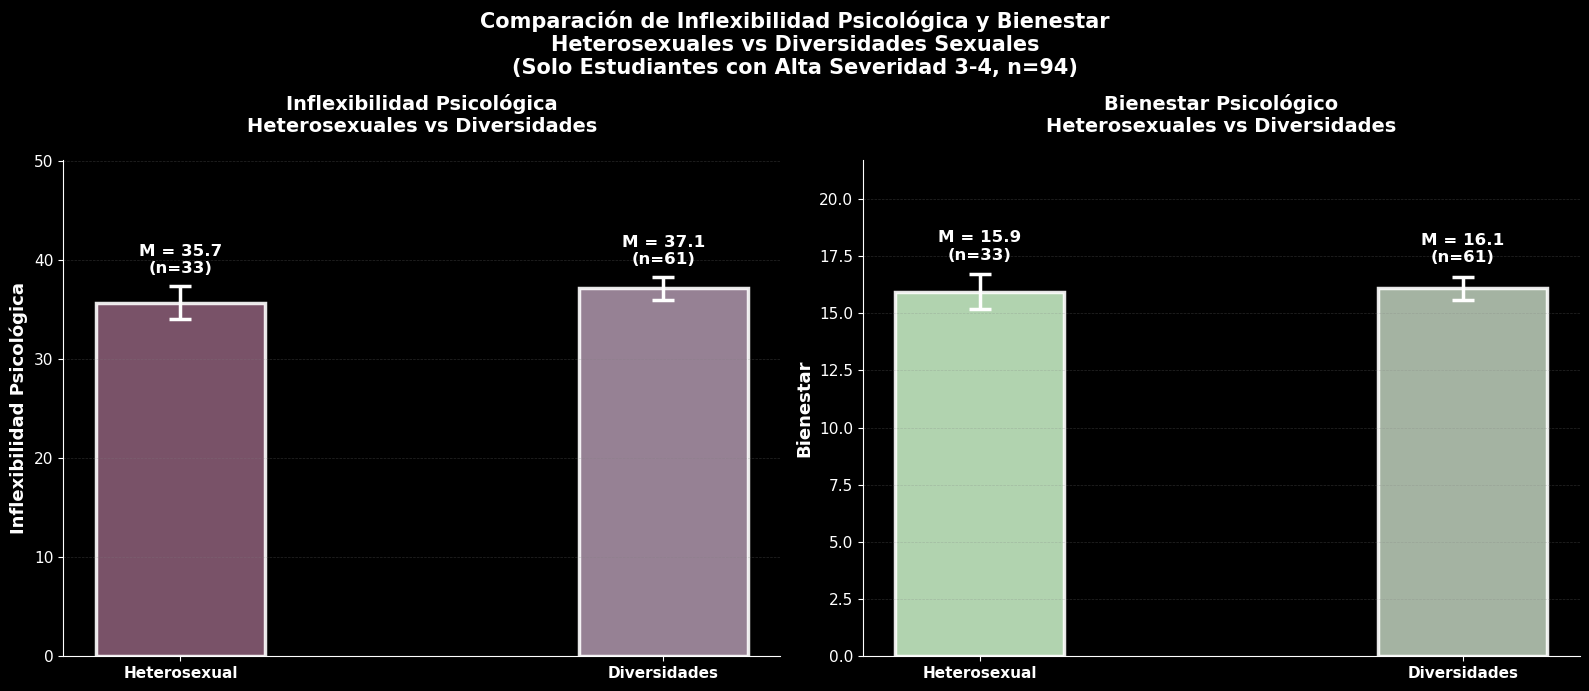


✓ Figura guardada: figuras/14_comparacion_hetero_vs_diversidades_alta_severidad.png
✓ Tabla guardada: figuras/14_tabla_hetero_vs_diversidades_alta_severidad.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sp_stats
from pathlib import Path

# Configurar colores
COLORES = ['#c5ebc3', '#b7c8b5', '#a790a5', '#875c74', '#54414e', '#2f4858']

# 1. CARGAR DATOS
df = pd.read_csv('suicidalidad_jovenes.csv')
print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")

# 2. LIMPIEZA BÁSICA
df_clean = df.copy()
duplicados = df_clean['responseid'].duplicated().sum()
if duplicados > 0:
    df_clean = df_clean.drop_duplicates(subset='responseid', keep='first')
print(f"Dataset limpio: {df_clean.shape[0]} observaciones")

# 3. 🆕 FILTRAR: Solo ideadores CON ALTA SEVERIDAD (3 o 4)
ideadores_alta = df_clean[
    (df_clean['ideacion_ultimo_mes_dicotomica'] == 1) & 
    (df_clean['severidad_ideacion_ultimo_mes'] >= 3)
].copy()

print(f"\n📊 MUESTRA SELECCIONADA:")
print(f"  • Estudiantes con ideación suicida: {len(df_clean[df_clean['ideacion_ultimo_mes_dicotomica'] == 1])}")
print(f"  • Con severidad ALTA (3-4): {len(ideadores_alta)}")
print(f"  • Porcentaje de alta severidad: {len(ideadores_alta)/len(df_clean[df_clean['ideacion_ultimo_mes_dicotomica'] == 1])*100:.1f}%")

# 4. CREAR VARIABLE DIVERSIDADES
ideadores_alta['grupo_orientacion'] = ideadores_alta['orientacion_sexual'].apply(
    lambda x: 'Heterosexual' if x == 1.0 else 'Diversidades'
)

print(f"\n📊 DISTRIBUCIÓN DE GRUPOS (Solo severidad 3-4):")
print(ideadores_alta['grupo_orientacion'].value_counts())

# 5. FILTRAR DATOS VÁLIDOS
vars_analisis = ['inflexibilidad_psicologica', 'bienestar_psicologico']
ideadores_validos = ideadores_alta[
    ideadores_alta[vars_analisis].notna().all(axis=1) & 
    ideadores_alta['grupo_orientacion'].notna()
].copy()

print(f"Casos válidos para análisis: {len(ideadores_validos)}")

# 6. ESTADÍSTICAS POR GRUPO
stats_grupos = ideadores_validos.groupby('grupo_orientacion')[vars_analisis].agg(['mean', 'std', 'count'])

print("\n📊 ESTADÍSTICAS POR GRUPO (Severidad 3-4):")
print("="*80)
print(stats_grupos)
print("="*80)

# 7. PRUEBAS T
print("\n🔬 PRUEBAS T DE STUDENT:")
print("="*80)

for var in vars_analisis:
    hetero = ideadores_validos[ideadores_validos['grupo_orientacion'] == 'Heterosexual'][var].dropna()
    diverso = ideadores_validos[ideadores_validos['grupo_orientacion'] == 'Diversidades'][var].dropna()
    
    if len(hetero) > 0 and len(diverso) > 0:
        t_stat, p_value = sp_stats.ttest_ind(hetero, diverso)
        cohens_d = (hetero.mean() - diverso.mean()) / np.sqrt((hetero.std()**2 + diverso.std()**2) / 2)
        
        print(f"\n{var.replace('_', ' ').title()}:")
        print(f"  Heterosexual: M = {hetero.mean():.2f}, DE = {hetero.std():.2f}, n = {len(hetero)}")
        print(f"  Diversidades: M = {diverso.mean():.2f}, DE = {diverso.std():.2f}, n = {len(diverso)}")
        print(f"  t = {t_stat:.3f}, p = {p_value:.4f}, d de Cohen = {cohens_d:.3f}")
        if p_value < 0.001:
            print(f"  → Diferencia altamente significativa (p < .001)")
        elif p_value < 0.01:
            print(f"  → Diferencia muy significativa (p < .01)")
        elif p_value < 0.05:
            print(f"  → Diferencia significativa (p < .05)")
        else:
            print(f"  → No significativa (p ≥ .05)")

print("="*80)

# 8. VISUALIZACIÓN
Path('figuras').mkdir(exist_ok=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), facecolor='black')

grupos = ['Heterosexual', 'Diversidades']
x_pos = np.arange(len(grupos))
width = 0.35

# GRÁFICO 1: Inflexibilidad
inflexibilidad_means = [
    ideadores_validos[ideadores_validos['grupo_orientacion'] == g]['inflexibilidad_psicologica'].mean()
    for g in grupos
]
inflexibilidad_se = [
    ideadores_validos[ideadores_validos['grupo_orientacion'] == g]['inflexibilidad_psicologica'].sem()
    for g in grupos
]
inflexibilidad_n = [
    len(ideadores_validos[ideadores_validos['grupo_orientacion'] == g]['inflexibilidad_psicologica'].dropna())
    for g in grupos
]

bars1 = ax1.bar(x_pos, inflexibilidad_means, width,
                yerr=inflexibilidad_se, capsize=8,
                color=['#875c74', '#a790a5'], 
                edgecolor='white', linewidth=2.5, alpha=0.9,
                error_kw={'ecolor': 'white', 'linewidth': 2.5, 'capthick': 2.5})

for i, (bar, media, n) in enumerate(zip(bars1, inflexibilidad_means, inflexibilidad_n)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + inflexibilidad_se[i] + 1,
            f'M = {media:.1f}\n(n={n})',
            ha='center', va='bottom', fontsize=12, 
            color='white', fontweight='bold')

ax1.set_ylabel('Inflexibilidad Psicológica', fontsize=13, color='white', fontweight='bold')
ax1.set_title('Inflexibilidad Psicológica\nHeterosexuales vs Diversidades', 
              fontsize=14, fontweight='bold', color='white', pad=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(grupos, fontsize=13, color='white', fontweight='bold')
ax1.tick_params(colors='white', labelsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--', color='gray', linewidth=0.5)
ax1.set_ylim(0, max(inflexibilidad_means) * 1.35)
ax1.set_facecolor('black')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')

# Significancia inflexibilidad
hetero_inflex = ideadores_validos[ideadores_validos['grupo_orientacion'] == 'Heterosexual']['inflexibilidad_psicologica'].dropna()
diverso_inflex = ideadores_validos[ideadores_validos['grupo_orientacion'] == 'Diversidades']['inflexibilidad_psicologica'].dropna()
t_stat_inflex, p_value_inflex = sp_stats.ttest_ind(hetero_inflex, diverso_inflex)

if p_value_inflex < 0.05:
    y_max = max(inflexibilidad_means) + max(inflexibilidad_se) + 2
    ax1.plot([0, 1], [y_max, y_max], 'white', linewidth=2)
    ax1.plot([0, 0], [y_max - 0.5, y_max], 'white', linewidth=2)
    ax1.plot([1, 1], [y_max - 0.5, y_max], 'white', linewidth=2)
    
    sig_text = '***' if p_value_inflex < 0.001 else '**' if p_value_inflex < 0.01 else '*'
    ax1.text(0.5, y_max + 0.5, sig_text, ha='center', va='bottom', 
            fontsize=18, color='#c5ebc3', fontweight='bold')
    ax1.text(0.5, y_max + 2, f'p = {p_value_inflex:.4f}', ha='center', va='bottom',
            fontsize=10, color='white', style='italic')

# GRÁFICO 2: Bienestar
bienestar_means = [
    ideadores_validos[ideadores_validos['grupo_orientacion'] == g]['bienestar_psicologico'].mean()
    for g in grupos
]
bienestar_se = [
    ideadores_validos[ideadores_validos['grupo_orientacion'] == g]['bienestar_psicologico'].sem()
    for g in grupos
]
bienestar_n = [
    len(ideadores_validos[ideadores_validos['grupo_orientacion'] == g]['bienestar_psicologico'].dropna())
    for g in grupos
]

bars2 = ax2.bar(x_pos, bienestar_means, width,
                yerr=bienestar_se, capsize=8,
                color=['#c5ebc3', '#b7c8b5'], 
                edgecolor='white', linewidth=2.5, alpha=0.9,
                error_kw={'ecolor': 'white', 'linewidth': 2.5, 'capthick': 2.5})

for i, (bar, media, n) in enumerate(zip(bars2, bienestar_means, bienestar_n)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + bienestar_se[i] + 0.5,
            f'M = {media:.1f}\n(n={n})',
            ha='center', va='bottom', fontsize=12, 
            color='white', fontweight='bold')

ax2.set_ylabel('Bienestar', fontsize=13, color='white', fontweight='bold')
ax2.set_title('Bienestar Psicológico\nHeterosexuales vs Diversidades', 
              fontsize=14, fontweight='bold', color='white', pad=20)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(grupos, fontsize=13, color='white', fontweight='bold')
ax2.tick_params(colors='white', labelsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--', color='gray', linewidth=0.5)
ax2.set_ylim(0, max(bienestar_means) * 1.35)
ax2.set_facecolor('black')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('white')
ax2.spines['bottom'].set_color('white')

# Significancia bienestar
hetero_bien = ideadores_validos[ideadores_validos['grupo_orientacion'] == 'Heterosexual']['bienestar_psicologico'].dropna()
diverso_bien = ideadores_validos[ideadores_validos['grupo_orientacion'] == 'Diversidades']['bienestar_psicologico'].dropna()
t_stat_bien, p_value_bien = sp_stats.ttest_ind(hetero_bien, diverso_bien)

if p_value_bien < 0.05:
    y_max = max(bienestar_means) + max(bienestar_se) + 1
    ax2.plot([0, 1], [y_max, y_max], 'white', linewidth=2)
    ax2.plot([0, 0], [y_max - 0.3, y_max], 'white', linewidth=2)
    ax2.plot([1, 1], [y_max - 0.3, y_max], 'white', linewidth=2)
    
    sig_text = '***' if p_value_bien < 0.001 else '**' if p_value_bien < 0.01 else '*'
    ax2.text(0.5, y_max + 0.3, sig_text, ha='center', va='bottom', 
            fontsize=18, color='#c5ebc3', fontweight='bold')
    ax2.text(0.5, y_max + 1.2, f'p = {p_value_bien:.4f}', ha='center', va='bottom',
            fontsize=10, color='white', style='italic')

# 🆕 TÍTULO ACTUALIZADO
plt.suptitle(f'Comparación de Inflexibilidad Psicológica y Bienestar\nHeterosexuales vs Diversidades Sexuales\n(Solo Estudiantes con Alta Severidad 3-4, n={len(ideadores_validos)})', 
             fontsize=15, fontweight='bold', color='white', y=0.98)

plt.tight_layout()
plt.savefig('figuras/14_comparacion_hetero_vs_diversidades_alta_severidad.png', dpi=300, 
            facecolor='black', bbox_inches='tight')
plt.show()
print("\n✓ Figura guardada: figuras/14_comparacion_hetero_vs_diversidades_alta_severidad.png")

# Guardar tabla
tabla_resumen = pd.DataFrame({
    'Grupo': grupos,
    'Inflexibilidad_Media': inflexibilidad_means,
    'Inflexibilidad_SE': inflexibilidad_se,
    'Inflexibilidad_n': inflexibilidad_n,
    'Bienestar_Media': bienestar_means,
    'Bienestar_SE': bienestar_se,
    'Bienestar_n': bienestar_n
})
tabla_resumen.to_csv('figuras/14_tabla_hetero_vs_diversidades_alta_severidad.csv', index=False, encoding='utf-8')
print("✓ Tabla guardada: figuras/14_tabla_hetero_vs_diversidades_alta_severidad.csv")

# 📊 INTEGRACIÓN DE RESULTADOS Y EVALUACIÓN DE HIPÓTESIS

---

## VERIFICACIÓN DE HIPÓTESIS

### **H1: La inflexibilidad psicológica estará más relacionada con ideación suicida**

**CONFIRMADA**

**Evidencia:**
- Correlación significativa con severidad de ideación: **r = 0.432** (p < .001)
- Diferencia entre grupos (con vs sin ideación último mes):
  - Con ideación: M = 30.80 (DE = 9.56)
  - Sin ideación: M = 23.30 (DE = 9.23)
  - **Diferencia: 7.49 puntos** (t = 12.642, p < .001)
- En el Perfil 0 (alta severidad): M = 36.88, confirmando el rol central de la inflexibilidad

**Conclusión:** La inflexibilidad psicológica emerge como un posible **predictor** de ideación suicida, especialmente en casos de alta severidad.

---

### **H2: El bienestar psicológico estará relacionado con menor ideación suicida**

**CONFIRMADA**

**Evidencia:**
- Correlación inversa con severidad de ideación: **r = -0.468** (p < .001)
- Diferencia entre grupos:
  - Con ideación: M = 18.99 (DE = 4.42)
  - Sin ideación: M = 22.98 (DE = 4.66)
  - **Diferencia: -4.00 puntos** (t = -14.030, p < .001)
- Correlación más fuerte con depresión (r = -0.641) que con ideación, sugiriendo un efecto protector general

**Conclusión:** El bienestar psicológico actúa como **factor protector** significativo contra la ideación suicida.

---

### **H3: Los síntomas de ansiedad y depresión se asociarán con mayor nivel de ideación suicida**

**CONFIRMADA**

**Evidencia:**
- **Depresión:**
  - Correlación con ideación: **r = 0.540** (p < .001)
  - Diferencia entre grupos: 3.90 puntos (t = 17.662, p < .001)
  - Prevalencia en la muestra: 54.7%
  
- **Ansiedad:**
  - Correlación con ideación: **r = 0.365** (p < .001)
  - Diferencia entre grupos: 2.54 puntos (t = 10.870, p < .001)
  - Prevalencia en la muestra: 28.8%

**Conclusión:** La depresión muestra asociación **más fuerte** que la ansiedad con ideación suicida (r = 0.540 vs r = 0.365).

---

### **H4: La inflexibilidad psicológica y bienestar psicológico tendrán un rol diferencial en distintos niveles de severidad**

**CONFIRMADA**

**Evidencia de perfiles diferenciados (K-Means, k=2, Silhouette=0.304):**

| Variable | Perfil 0 (Alta severidad, n=278) | Perfil 1 (Baja severidad, n=295) | Diferencia |
|----------|----------------------------------|----------------------------------|------------|
| Inflexibilidad psicológica | 36.88 (7.42) | 25.06 (7.59) | **11.82** |
| Bienestar psicológico | 16.54 (3.71) | 21.29 (3.75) | **-4.75** |
| Severidad ideación | 2.10 (0.92) | 1.27 (0.53) | **0.83** |
| Severidad depresión | 13.35 (1.85) | 8.64 (2.83) | **4.71** |

**Conclusión:** Los perfiles muestran que la combinación de **alta inflexibilidad + bajo bienestar** caracteriza a los casos de mayor severidad suicida.

---

## 2. HALLAZGOS CLAVE

### **Fortalezas de las asociaciones**

1. **Depresión** es el correlato más fuerte de ideación suicida:
   - r = 0.540 con ideación
   - r = 0.642 con ansiedad (alta comorbilidad)
   - r = 0.604 con inflexibilidad psicológica

2. **Inflexibilidad psicológica** muestra asociaciones robustas con:
   - Depresión (r = 0.604)
   - Ansiedad (r = 0.532)
   - Ideación suicida (r = 0.432)
   - Bienestar (r = -0.570)

3. **Bienestar psicológico** correlaciona inversamente con:
   - Depresión (r = -0.641) ← **más fuerte**
   - Inflexibilidad (r = -0.570)
   - Ideación (r = -0.468)

### **Caracterización de riesgo alto (Perfil 0)**

El 48.5% de estudiantes con ideación (n=278) presenta un perfil de **riesgo elevado**:
- Depresión severa (M = 13.35)
- Ansiedad moderada-alta (M = 13.33)
- Inflexibilidad psicológica muy elevada (M = 36.88)
- Bienestar bajo (M = 16.54)
- Ideación suicida sostenida (M = 2.10)

### **Análisis de severidad extrema (3-4)**

En casos de **severidad máxima** (n=94, 16.4% de quienes tienen ideación):
- **No se encontraron diferencias significativas** entre orientaciones sexuales en inflexibilidad psicológica
- Diversidades: M = 37.11 (DE = 8.91)
- Heterosexual: M = 35.67 (DE = 9.58)
- Sugiere que en niveles extremos, la severidad trasciende factores sociodemográficos

---

## 3. IMPLICACIONES CLÍNICAS

### **Factores de riesgo prioritarios:**
1. **Depresión severa** (asociación más fuerte: r = 0.540)
2. **Inflexibilidad psicológica elevada** (diferencial clave entre perfiles)
3. **Ansiedad comórbida** (presente en 28.8% de la muestra)

### **Factores protectores:**
1. **Bienestar psicológico** (efecto protector robusto: r = -0.468)
2. **Flexibilidad psicológica** (correlación inversa con todos los indicadores de riesgo)

### **Targets de intervención:**
- **Reducir inflexibilidad psicológica** → Terapias basadas en ACT (Acceptance and Commitment Therapy)
- **Incrementar bienestar subjetivo** → Intervenciones positivas y de sentido de vida
- **Tratar depresión como prioridad** → Manejo integral de síntomas depresivos
- **Identificar Perfil 0** → Screening y seguimiento intensivo

---

## 4. LIMITACIONES Y RECOMENDACIONES

### **Limitaciones metodológicas:**
- Diseño transversal: no permite inferencia causal
- Muestra por conveniencia: limitada generalización
- Exclusión de crisis de pánico y PTSD: alcance acotado
- 7.6% de missing en variables temporales (años de episodios depresivos)

### **Análisis futuros recomendados:**
1. **Modelado predictivo:** Regresión logística o machine learning para predecir ideación a partir de inflexibilidad y bienestar
2. **Análisis de mediación:** Evaluar si inflexibilidad psicológica media la relación depresión → ideación
3. **Análisis de redes:** Explorar dinámicas entre síntomas y constructos psicológicos
4. **Validación de perfiles:** Análisis de clases latentes (LCA) para confirmar tipologías

---

## CONCLUSIONES FINALES

**Las cuatro hipótesis fueron confirmadas con evidencia robusta**

**Perfil de riesgo suicida en jóvenes:**
- Alta inflexibilidad psicológica (>30 puntos AAQ-II)
- Bajo bienestar psicológico (<19 puntos SWB-7)
- Depresión moderada-severa (>10 puntos)
- Ansiedad generalizada comórbida

**Modelo preliminar de riesgo:**
```
RIESGO SUICIDA = f(Depresión, Inflexibilidad Psicológica, -Bienestar, Ansiedad)
                 con Depresión como predictor más fuerte
```

**Aporte del estudio:**
Este EDA establece las bases empíricas para:
1. Priorizar screening de inflexibilidad psicológica en protocolos de evaluación de riesgo
2. Incluir bienestar subjetivo como indicador protector en modelos de predicción
3. Diseñar intervenciones que combinen reducción de síntomas + promoción de flexibilidad psicológica

---

**Dataset final:** 1,024 observaciones válidas | Completitud: 99.67% | Calidad: Alta  
**Método de clustering:** K-Means (k=2, Silhouette=0.304) | Perfiles: Riesgo Alto vs Riesgo Moderado  
**Próximos pasos:** Modelado predictivo y análisis de mediación


BONUS TOPOGRAFÍA DE IDEACIÓN SUICIDA
📂 Cargando datos desde: /Users/reinerfuentesferrada/ONLINE_DS_THEBRIDGE_Rei/EDA_IDEACIÓN SUICIDA/data/suicidalidad_jovenes.csv
✓ 578 individuos cargados

📈 Estadísticas del dataset:
  • Riesgo promedio: 0.223
  • Desviación estándar: 0.284
  • Rango: [0.000, 1.000]
  • Distribución: {1: 311, 2: 173, 3: 68, 4: 26}

🎨 Generando visualización...
✓ Figura guardada en: /Users/reinerfuentesferrada/ONLINE_DS_THEBRIDGE_Rei/EDA_IDEACIÓN SUICIDA/figuras/topografia_ideacion.png


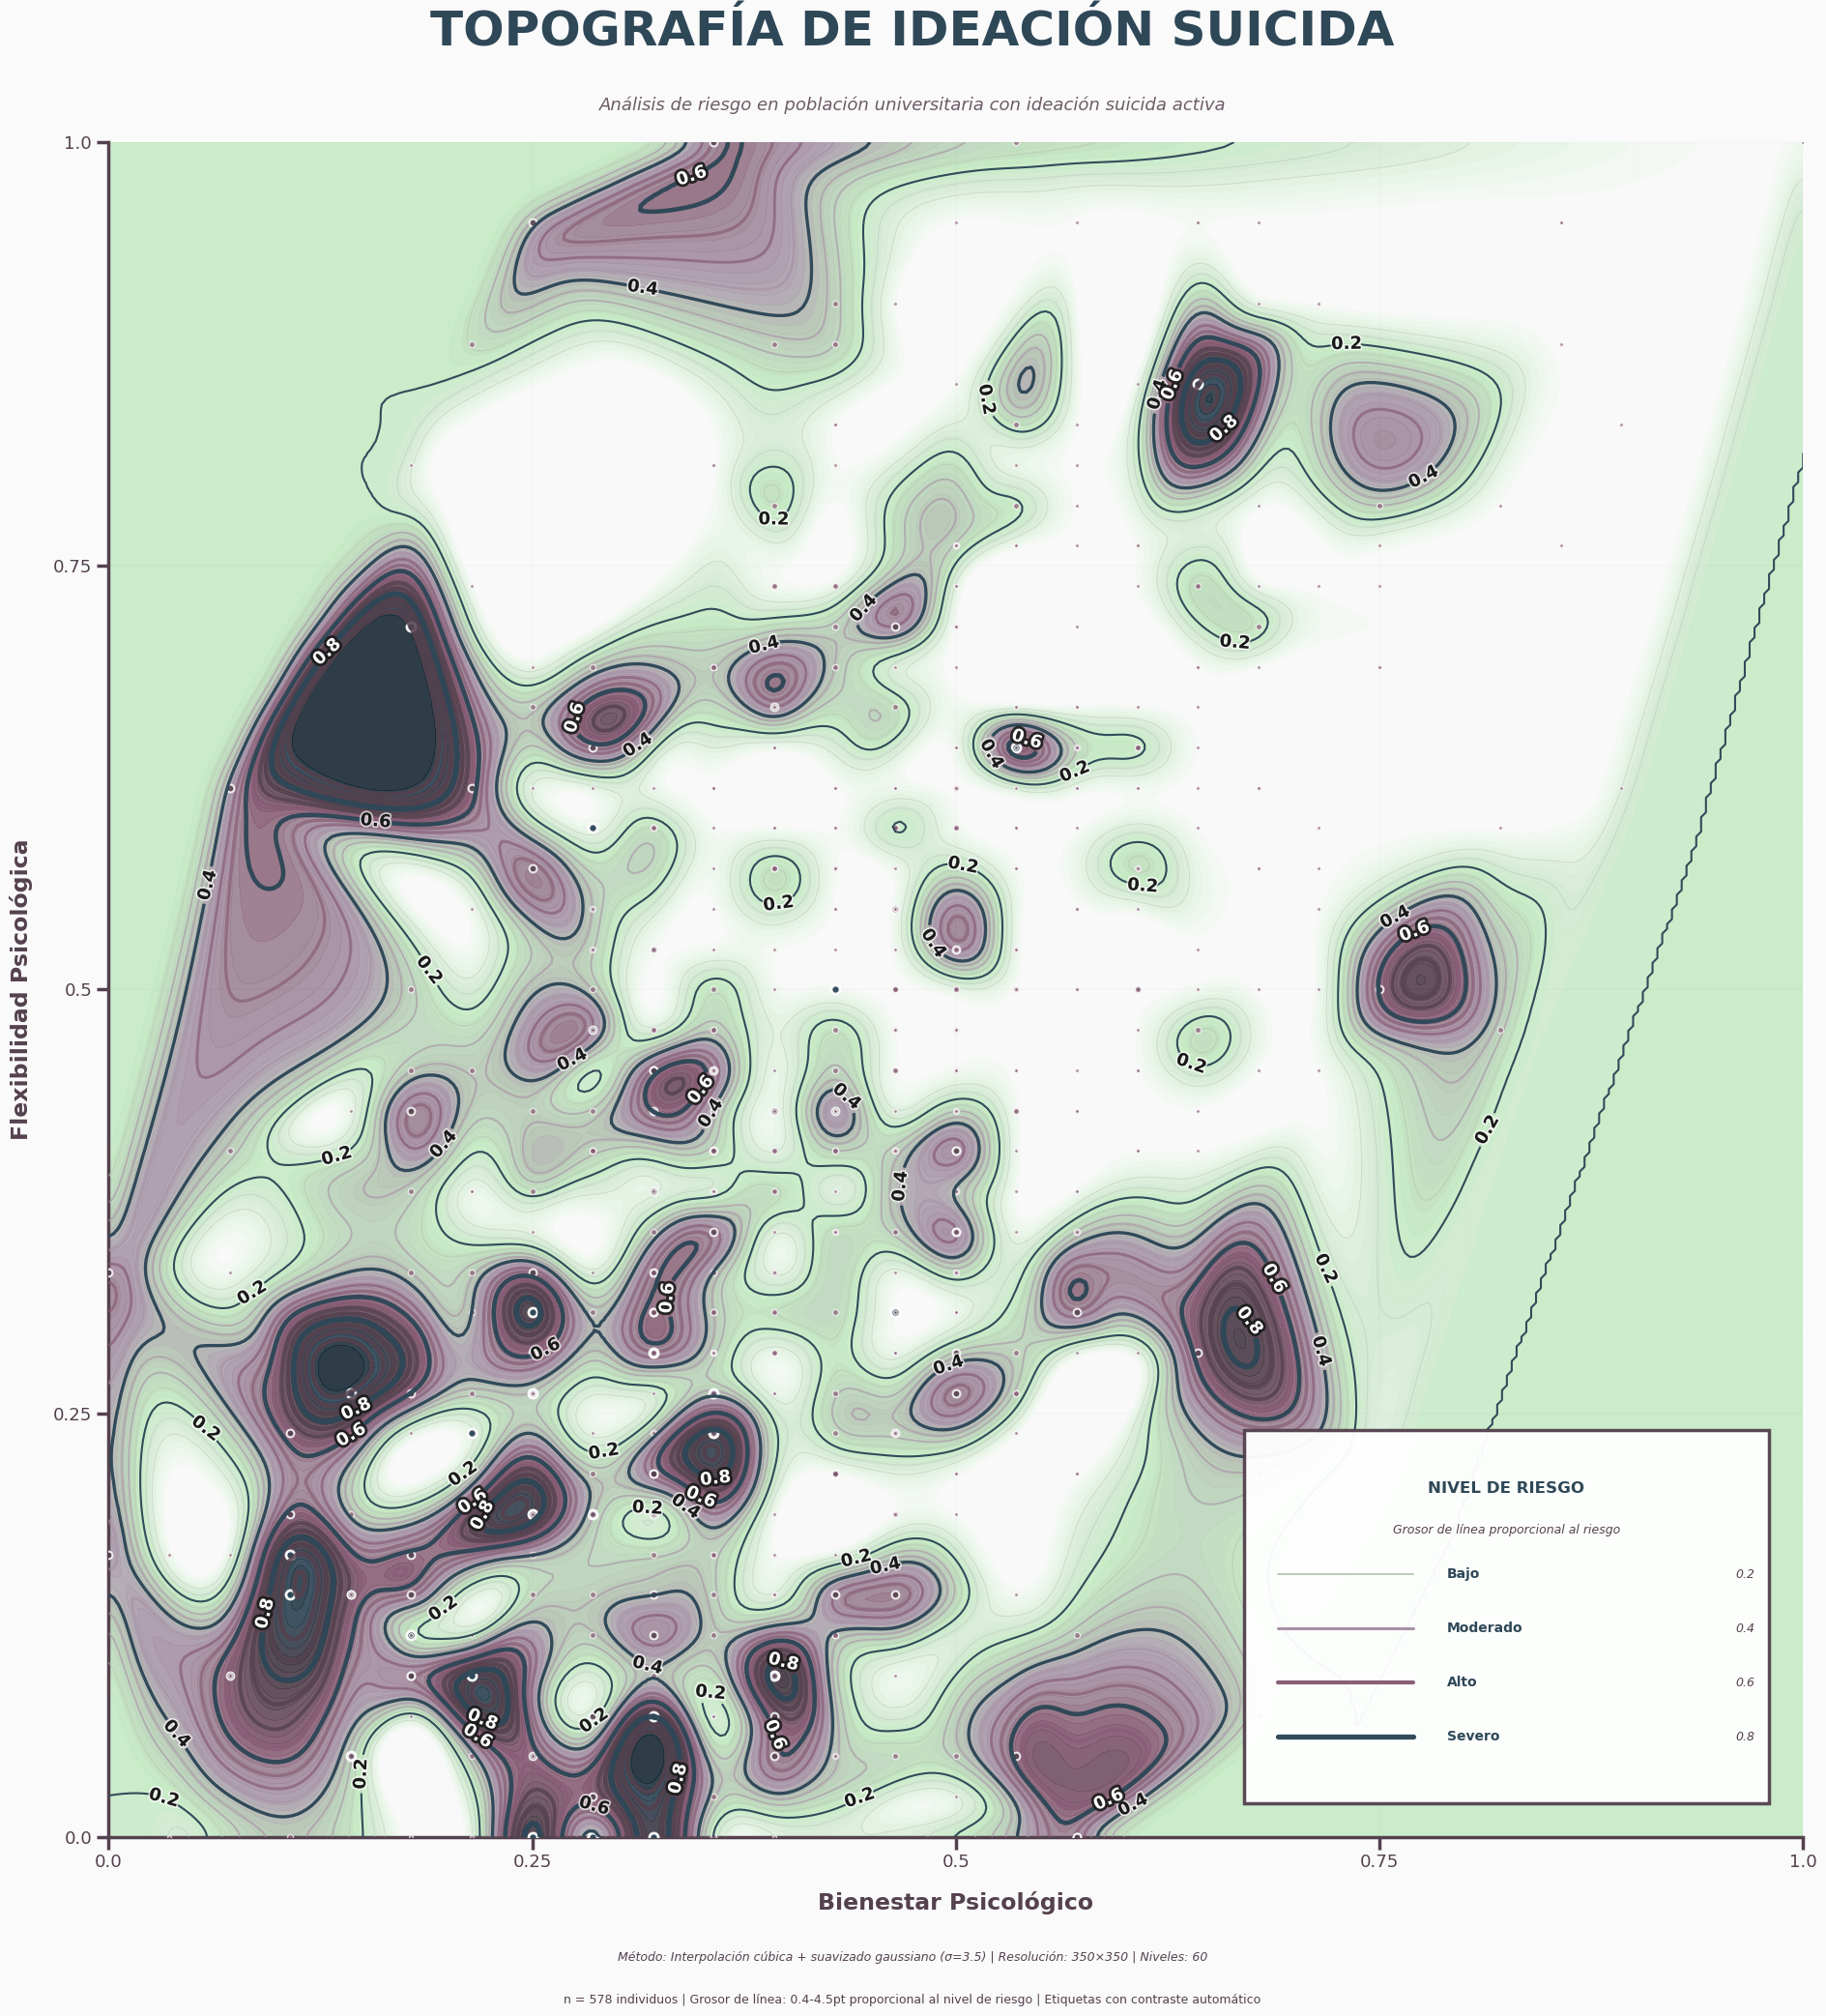


✅ VISUALIZACIÓN COMPLETADA CON ÉXITO


In [33]:
"""
BONUS TOPOGRAFÍA DE IDEACIÓN SUICIDA - Versión Mejorada
✓ Números siempre legibles con contraste automático
✓ Código optimizado y modular
✓ Mejoras visuales profesionales
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv
import matplotlib.patheffects as path_effects
import warnings
import os
from pathlib import Path

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']


def obtener_rutas_proyecto():
    """
    Obtiene las rutas del proyecto de forma dinámica
    """
    # Ruta base del proyecto
    ruta_base = Path('/Users/reinerfuentesferrada/ONLINE_DS_THEBRIDGE_Rei/EDA_IDEACIÓN SUICIDA')
    
    # Crear estructura de carpetas si no existe
    carpeta_figuras = ruta_base / 'figuras'
    carpeta_figuras.mkdir(parents=True, exist_ok=True)
    
    carpeta_data = ruta_base / 'data'
    
    return {
        'base': ruta_base,
        'data': carpeta_data,
        'figuras': carpeta_figuras
    }


def cargar_datos():
    rutas = obtener_rutas_proyecto()
    ruta_csv = rutas['data'] / 'suicidalidad_jovenes.csv'
    
    print(f"📂 Cargando datos desde: {ruta_csv}")
    df = pd.read_csv(ruta_csv)
    df = df[df['ideacion_ultimo_mes_dicotomica'] == 1].copy()
    
    df['bienestar'] = df['bienestar_psicologico']
    df['flexibilidad'] = 49 - df['inflexibilidad_psicologica']
    df['riesgo_suicida'] = df['severidad_ideacion_ultimo_mes']
    
    # Normalización
    df['bienestar_norm'] = (df['bienestar'] - df['bienestar'].min()) / (df['bienestar'].max() - df['bienestar'].min())
    df['flexibilidad_norm'] = (df['flexibilidad'] - df['flexibilidad'].min()) / (df['flexibilidad'].max() - df['flexibilidad'].min())
    df['riesgo_norm'] = (df['riesgo_suicida'] - df['riesgo_suicida'].min()) / (df['riesgo_suicida'].max() - df['riesgo_suicida'].min())
    
    print(f"✓ {len(df)} individuos cargados")
    return df


def calcular_luminancia(color_hex):
    """
    Calcula la luminancia percibida de un color
    Retorna valor entre 0 (oscuro) y 1 (claro)
    """
    # Convertir hex a RGB
    color_hex = color_hex.lstrip('#')
    r, g, b = tuple(int(color_hex[i:i+2], 16) / 255.0 for i in (0, 2, 4))
    
    # Fórmula de luminancia percibida (ITU-R BT.709)
    luminancia = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return luminancia


def obtener_color_contraste(color_fondo_hex, umbral=0.5):
    """
    Retorna color de texto con máximo contraste según el fondo
    
    Args:
        color_fondo_hex: Color de fondo en formato hex
        umbral: Umbral de luminancia (default 0.5)
    
    Returns:
        tuple: (color_texto, color_outline, usar_bold)
    """
    luminancia = calcular_luminancia(color_fondo_hex)
    
    if luminancia > umbral:
        # Fondo claro → texto oscuro
        return '#1a1a1a', '#ffffff', False
    else:
        # Fondo oscuro → texto claro con outline oscuro
        return '#ffffff', '#1a1a1a', True


def crear_paleta_suavizada():
    """Crea una paleta de colores suavizada con transiciones"""
    colors = [
        '#fafafa',   # Blanco suave
        '#e8f5e8',   # Verde muy claro
        '#d4ead4',   # Verde pastel
        '#c5ebc3',   # Verde menta
        '#bdd9bc',   # Transición
        '#b7c8b5',   # Verde gris
        '#afa8b0',   # Transición
        '#a790a5',   # Malva
        '#9d8393',   # Transición
        '#875c74',   # Púrpura rosado
        '#6d5061',   # Transición
        '#54414e',   # Púrpura oscuro
        '#423a45',   # Transición
        '#2f4858',   # Azul oscuro
        '#1a2a35'    # Azul muy oscuro
    ]
    return LinearSegmentedColormap.from_list('custom', colors, N=256)


def obtener_color_en_punto(cmap, valor_normalizado):
    """Obtiene el color RGB de un punto específico en el colormap"""
    rgba = cmap(valor_normalizado)
    # Convertir RGB a hex
    return '#{:02x}{:02x}{:02x}'.format(
        int(rgba[0] * 255),
        int(rgba[1] * 255),
        int(rgba[2] * 255)
    )


def agregar_etiquetas_inteligentes(ax, contour, level, Z, X, Y, cmap):
    """
    Agrega etiquetas con contraste automático según el color de fondo
    
    Args:
        ax: Axes de matplotlib
        contour: Objeto contour
        level: Nivel de la isolínea
        Z: Matriz de valores interpolados
        X, Y: Meshgrid de coordenadas
        cmap: Colormap utilizado
    """
    # Obtener posiciones de las etiquetas
    labels = ax.clabel(contour, inline=True, fontsize=13, fmt=f'{level:.1f}')
    
    for label in labels:
        # Obtener posición del label
        x_pos, y_pos = label.get_position()
        
        # Encontrar el índice más cercano en la matriz
        i = np.argmin(np.abs(Y[:, 0] - y_pos))
        j = np.argmin(np.abs(X[0, :] - x_pos))
        
        # Obtener el valor de Z en esa posición
        z_valor = Z[i, j]
        
        # Obtener el color del fondo
        color_fondo = obtener_color_en_punto(cmap, z_valor)
        
        # Calcular color de texto con contraste
        color_texto, color_outline, usar_bold = obtener_color_contraste(color_fondo)
        
        # Aplicar estilo al texto
        label.set_color(color_texto)
        label.set_fontsize(13)
        
        if usar_bold:
            label.set_weight('bold')
            # Outline más grueso para fondos oscuros
            label.set_path_effects([
                path_effects.Stroke(linewidth=4, foreground=color_outline, alpha=0.9),
                path_effects.Normal()
            ])
        else:
            label.set_weight('600')
            # Outline sutil para fondos claros
            label.set_path_effects([
                path_effects.Stroke(linewidth=2.5, foreground=color_outline, alpha=0.7),
                path_effects.Normal()
            ])


def topografia_ideacion_suicida_mejorada(df):
    """
    Genera la visualización topográfica mejorada
    """
    
    fig = plt.figure(figsize=(30, 22), facecolor='#fafafa')
    ax = fig.add_subplot(111)
    ax.set_facecolor('#fafafa')
    
    # ============================================
    # INTERPOLACIÓN DE ALTA RESOLUCIÓN
    # ============================================
    n = 350
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    X, Y = np.meshgrid(x, y)
    
    points = np.column_stack([df['bienestar_norm'].values, df['flexibilidad_norm'].values])
    Z = griddata(points, df['riesgo_norm'].values, (X, Y), method='cubic', fill_value=0.2)
    Z = gaussian_filter(Z, sigma=3.5)
    Z = np.clip(Z, 0, 1)  # Asegurar que esté en rango [0, 1]
    
    # ============================================
    # PALETA PERSONALIZADA
    # ============================================
    cmap_custom = crear_paleta_suavizada()
    
    # ============================================
    # CONTORNOS RELLENOS
    # ============================================
    contourf = ax.contourf(X, Y, Z, levels=60, cmap=cmap_custom, alpha=0.92, zorder=1)
    
    # ============================================
    # ISOLÍNEAS DETALLADAS CON GROSOR VARIABLE
    # ============================================
    levels_detailed = np.arange(0.1, 1.0, 0.05)
    
    for level in levels_detailed:
        linewidth = 0.4 + (level * 3.5)
        alpha = 0.4 + (level * 0.5)
        
        # Color según nivel
        if level < 0.3:
            color = '#b7c8b5'
        elif level < 0.5:
            color = '#a790a5'
        elif level < 0.7:
            color = '#875c74'
        else:
            color = '#54414e'
        
        ax.contour(X, Y, Z, levels=[level], 
                  colors=color, linewidths=linewidth, 
                  alpha=alpha, zorder=2 + int(level * 10))
    
    # ============================================
    # ISOLÍNEAS PRINCIPALES CON ETIQUETAS INTELIGENTES
    # ============================================
    levels_main = [0.2, 0.4, 0.6, 0.8]
    
    for level in levels_main:
        linewidth = 0.6 + (level * 4.5)
        contour_main = ax.contour(X, Y, Z, levels=[level], 
                                 colors='#2f4858', linewidths=linewidth, 
                                 alpha=0.98, zorder=15)
        
        # Agregar etiquetas con contraste automático
        agregar_etiquetas_inteligentes(ax, contour_main, level, Z, X, Y, cmap_custom)
    
    # ============================================
    # PUNTOS DE DATOS CON TAMAÑO VARIABLE
    # ============================================
    for idx, row in df.iterrows():
        x = row['bienestar_norm']
        y = row['flexibilidad_norm']
        risk = row['riesgo_norm']
        size = 8 + risk * 35
        
        if risk > 0.75:
            color = '#2f4858'
            alpha = 0.95
            edge_width = 2
        elif risk > 0.5:
            color = '#54414e'
            alpha = 0.85
            edge_width = 1.5
        else:
            color = '#875c74'
            alpha = 0.70
            edge_width = 1
        
        ax.scatter(x, y, s=size, c=[color], alpha=alpha, 
                  edgecolors='white', linewidths=edge_width, zorder=10)
    
    # ============================================
    # GRID CARTOGRÁFICO MEJORADO
    # ============================================
    # Grid fino
    for val in np.arange(0, 1.01, 0.1):
        ax.plot([val, val], [0, 1], color='#d5d5d5', linewidth=0.4, alpha=0.4, zorder=0)
        ax.plot([0, 1], [val, val], color='#d5d5d5', linewidth=0.4, alpha=0.4, zorder=0)
    
    # Grid grueso
    for val in [0, 0.25, 0.5, 0.75, 1.0]:
        ax.plot([val, val], [0, 1], color='#a0a0a0', linewidth=1.2, alpha=0.6, zorder=0)
        ax.plot([0, 1], [val, val], color='#a0a0a0', linewidth=1.2, alpha=0.6, zorder=0)
    
    # ============================================
    # LEYENDA MEJORADA
    # ============================================
    legend_rect = Rectangle((0.67, 0.02), 0.31, 0.22,
                            facecolor='white',
                            edgecolor='#54414e',
                            linewidth=2.5,
                            alpha=0.96,
                            zorder=50)
    ax.add_patch(legend_rect)
    
    ax.text(0.825, 0.21, 'NIVEL DE RIESGO', 
            ha='center', va='top', fontsize=12, weight='bold', 
            color='#2f4858', zorder=51)
    
    ax.text(0.825, 0.185, 'Grosor de línea proporcional al riesgo', 
            ha='center', va='top', fontsize=9, style='italic', 
            color='#54414e', zorder=51)
    
    # Ejemplos de líneas
    levels_legend = [0.2, 0.4, 0.6, 0.8]
    labels_legend = ['Bajo', 'Moderado', 'Alto', 'Severo']
    colors_legend = ['#b7c8b5', '#a790a5', '#875c74', '#2f4858']
    
    y_start = 0.155
    for i, (level, label, col) in enumerate(zip(levels_legend, labels_legend, colors_legend)):
        y_pos = y_start - (i * 0.032)
        linewidth = 0.6 + (level * 4)
        
        ax.plot([0.69, 0.77], [y_pos, y_pos], color=col, 
               linewidth=linewidth, solid_capstyle='round', 
               alpha=0.98, zorder=51)
        
        ax.text(0.79, y_pos, label, fontsize=10, va='center', 
                color='#2f4858', weight='600', zorder=51)
        
        ax.text(0.96, y_pos, f'{level:.1f}', fontsize=9, va='center', 
                color='#54414e', style='italic', zorder=51)
    
    # ============================================
    # CONFIGURACIÓN DE EJES
    # ============================================
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    
    # Bordes
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['bottom', 'left']:
        ax.spines[spine].set_color('#54414e')
        ax.spines[spine].set_linewidth(2.5)
    
    # Etiquetas de ejes
    ax.set_xlabel('Bienestar Psicológico', fontsize=17, weight='600', 
                 color='#54414e', labelpad=15)
    ax.set_ylabel('Flexibilidad Psicológica', fontsize=17, weight='600', 
                 color='#54414e', labelpad=15)
    
    # Ticks
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'])
    ax.set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'])
    ax.tick_params(colors='#54414e', labelsize=13, width=2.5, length=9)
    
    # ============================================
    # TÍTULOS Y NOTAS
    # ============================================
    fig.text(0.5, 0.955, 'TOPOGRAFÍA DE IDEACIÓN SUICIDA', 
             ha='center', fontsize=36, weight='700', color='#2f4858')
    
    fig.text(0.5, 0.925, 'Análisis de riesgo en población universitaria con ideación suicida activa', 
             ha='center', fontsize=13, style='italic', color='#54414e', alpha=0.85)
    
    # Notas técnicas
    fig.text(0.5, 0.055, 
             f'Método: Interpolación cúbica + suavizado gaussiano (σ=3.5) | Resolución: {n}×{n} | Niveles: 60',
             ha='center', fontsize=9, color='#54414e', style='italic')
    
    fig.text(0.5, 0.035, 
             f'n = {len(df)} individuos | Grosor de línea: 0.4-4.5pt proporcional al nivel de riesgo | Etiquetas con contraste automático',
             ha='center', fontsize=9, color='#54414e')
    
    # ============================================
    # GUARDAR EN CARPETA FIGURAS
    # ============================================
    rutas = obtener_rutas_proyecto()
    ruta_salida = rutas['figuras'] / 'topografia_ideacion.png'
    
    plt.tight_layout(rect=[0.07, 0.07, 0.96, 0.92])
    plt.savefig(ruta_salida, 
                dpi=400,
                bbox_inches='tight', 
                facecolor='#fafafa',
                edgecolor='none')
    
    print(f"✓ Figura guardada en: {ruta_salida}")
    plt.show()
    plt.close()


# ============================================
# EJECUTAR
# ============================================
if __name__ == "__main__":
    print("\n" + "=" * 80)
    print("BONUS TOPOGRAFÍA DE IDEACIÓN SUICIDA")
    print("=" * 80)
    
    df = cargar_datos()
    
    print(f"\n📈 Estadísticas del dataset:")
    print(f"  • Riesgo promedio: {df['riesgo_norm'].mean():.3f}")
    print(f"  • Desviación estándar: {df['riesgo_norm'].std():.3f}")
    print(f"  • Rango: [{df['riesgo_norm'].min():.3f}, {df['riesgo_norm'].max():.3f}]")
    print(f"  • Distribución: {df['riesgo_suicida'].value_counts().sort_index().to_dict()}")
    
    print("\n🎨 Generando visualización...")
    topografia_ideacion_suicida_mejorada(df)
    
    print("\n" + "=" * 80)
    print("✅ VISUALIZACIÓN COMPLETADA CON ÉXITO")
    print("=" * 80)
